In [1]:
import datetime
import matplotlib.pylab as plt
import numpy as np
import timeit
import os
import plotly
import os
import math
import plotly.graph_objects as go
import xml.etree.ElementTree as ET
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from CPlantBox_PiafMunch import *
import py_plantbox as pb #CPlantBox Python Binding
#import Image
from rb_tools import * # CRootBox nodes Conversion tools

In [2]:
import scipy.sparse.linalg as LA
from scipy import sparse
import matplotlib.pylab as plt

import py_plantbox as pb
from rb_tools import *

import xylem_flux 

import timeit

import numpy as np
from scipy.integrate import odeint
import datetime
import pandas as pd
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:




# Simulate a root system
name = "PMA2018"

plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

#for i in range (0,180):
#    plant.simulate(i)
plant.simulate(180)
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
organtype = vv2a(plant.getNodes())
plant.write("../../results/{}.vtp".format(name),15)

In [30]:


# Simulate a root system
name = "PMA2018_hetero"

plant = pb.Plant()
#sca = pb.Organ.getScalar('organtype')
plant.openXML(name)
plant.initialize()
ana = pb.SegmentAnalyser(plant)

#for i in range (0,180):
#    plant.simulate(i)
plant.simulate(30)
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
organtype = vv2a(plant.getNodes())
plant.write("../results/PMA2018_hetero.vtp",15)

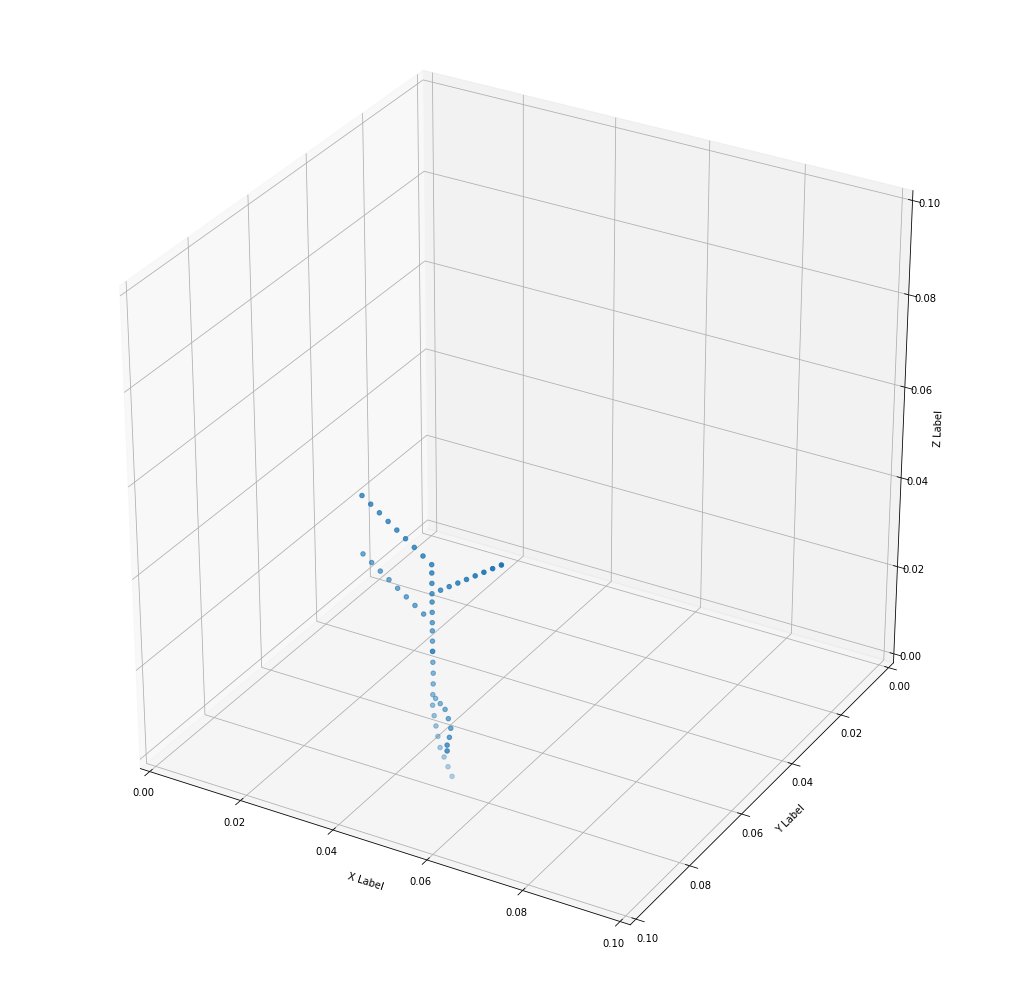

In [8]:
time=180
plant1 = CPlantBox(name, time, name)

plt.rcParams['figure.figsize'] = [18, 18]
nodes_cor = python_nodes(plant1) 





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=nodes_cor.T[3]
y=nodes_cor.T[4]
z=nodes_cor.T[5]



#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')


ax.scatter(x, y, z)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 0.1)
ax.set_ylim3d(0.1,0)
ax.set_zlim3d(0,0.1)
plt.show()

In [5]:
# Create graph
nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
rseg = seg2a(plant.getSegments(15)) # root system segments
sseg = seg2a(plant.getSegments(4)) # strm system segments
lseg = v2ai(plant.getNodesOrganType())


plant_ana = pb.SegmentAnalyser(plant) 

nodes = vv2a(plant.getNodes())/100 # convert from cm to m 
node_connection = seg2a(plant.getSegments(15)) # plant segments
#sseg = seg2a(plant.getSegments(4)) #
node_organtype = v2ai(plant.getNodesOrganType())


nodes_with_organtype = np.column_stack([node_connection, node_organtype]) #make the node has organtype, to know the source sink relation

node_connection1, node_connection2 = np.split(node_connection.T,2)

node_connection1 = np.row_stack([node_connection1, node_organtype])
node_connection2 = np.row_stack([node_connection2, node_organtype])

nodes_organtype = np.column_stack([node_connection1,node_connection2])
_, indices = np.unique(nodes_organtype.T[:,0], return_index=True)
nodes_organtype = nodes_organtype.T[indices,:]
nodes_cor = np.column_stack([nodes_organtype, nodes])


#print(nodes_organtype)
#print(node_connection2)
#print(nodes_with_organtype)   
print(node_connection)

unq, unq_idx, unq_cnt = np.unique(node_connection, return_inverse=True, return_counts=True)
#print(unq) 

#print(unq_cnt) 

#print(len(nodes))
#print(len(unq))
 
#print(len(unq_cnt))
#print(len(node_connection))

#type = v2a(plant.getScalar(15,"subtype"))
#otype = v2a(plant.getScalar(15,"organtype"))
#print(otype)
#print(len(otype))


nodes_organtype = np.column_stack((nodes_organtype,unq_cnt ))
nodes_organtype.astype(np.int_)

node_connection.astype(np.int_)
print(len(node_connection))
print(len(nodes_organtype))
print(nodes_organtype)
print(node_connection)



stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)|(nodes_organtype[:,1]== 4)][:,0]
index_stem= list(range(1, len(stem_nodes)+1))
for i in range(len(stem_nodes)):
    index_stem[i] = np.where( node_connection[:,1] == stem_nodes[i])

for i in range(len(index_stem)-1):
    node_connection[index_stem[i+1][0][0]]=node_connection[index_stem[i+1][0][0]][::-1]
node_connection
index_stem

[[ 0  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]
 [20 21]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12 13]
 [ 1 22]
 [22 23]
 [23 24]
 [24 33]
 [33 34]
 [34 35]
 [35 44]
 [44 45]
 [45 46]
 [24 25]
 [25 26]
 [26 27]
 [27 28]
 [28 29]
 [29 30]
 [30 31]
 [31 32]
 [35 36]
 [36 37]
 [37 38]
 [38 39]
 [39 40]
 [40 41]
 [41 42]
 [42 43]
 [46 47]
 [47 48]
 [48 49]
 [49 50]
 [50 51]
 [51 52]
 [52 53]
 [53 54]]
53
55
[[ 0  2  1]
 [ 1  4  1]
 [ 2  2  2]
 [ 3  2  2]
 [ 4  2  2]
 [ 5  2  3]
 [ 6  2  2]
 [ 7  2  2]
 [ 8  2  2]
 [ 9  2  2]
 [10  2  2]
 [11  2  2]
 [12  2  2]
 [13  2  1]
 [14  2  2]
 [15  2  2]
 [16  2  2]
 [17  2  2]
 [18  2  2]
 [19  2  2]
 [20  2  2]
 [21  2  1]
 [22  4  2]
 [23  4  2]
 [24  4  3]
 [25  8  2]
 [26  8  2]
 [27  8  2]
 [28  8  2]
 [29  8  2]
 [30  8  2]
 [31  8  2]
 [32  8  1]
 [33  4  2]
 [34  4  2]
 [35  4  3]
 [36  8  2]
 [37  8  2]
 [38  8  2]
 [39  8  2]
 [40  8  2]
 [41  8  2]
 [42  8  2]


[(array([], dtype=int64),),
 (array([20]),),
 (array([21]),),
 (array([22]),),
 (array([29]),),
 (array([30]),),
 (array([31]),),
 (array([32]),),
 (array([33]),),
 (array([34]),),
 (array([35]),),
 (array([36]),),
 (array([23]),),
 (array([24]),),
 (array([25]),),
 (array([37]),),
 (array([38]),),
 (array([39]),),
 (array([40]),),
 (array([41]),),
 (array([42]),),
 (array([43]),),
 (array([44]),),
 (array([26]),),
 (array([27]),),
 (array([28]),),
 (array([45]),),
 (array([46]),),
 (array([47]),),
 (array([48]),),
 (array([49]),),
 (array([50]),),
 (array([51]),),
 (array([52]),)]

NameError: name 'N1L_node' is not defined

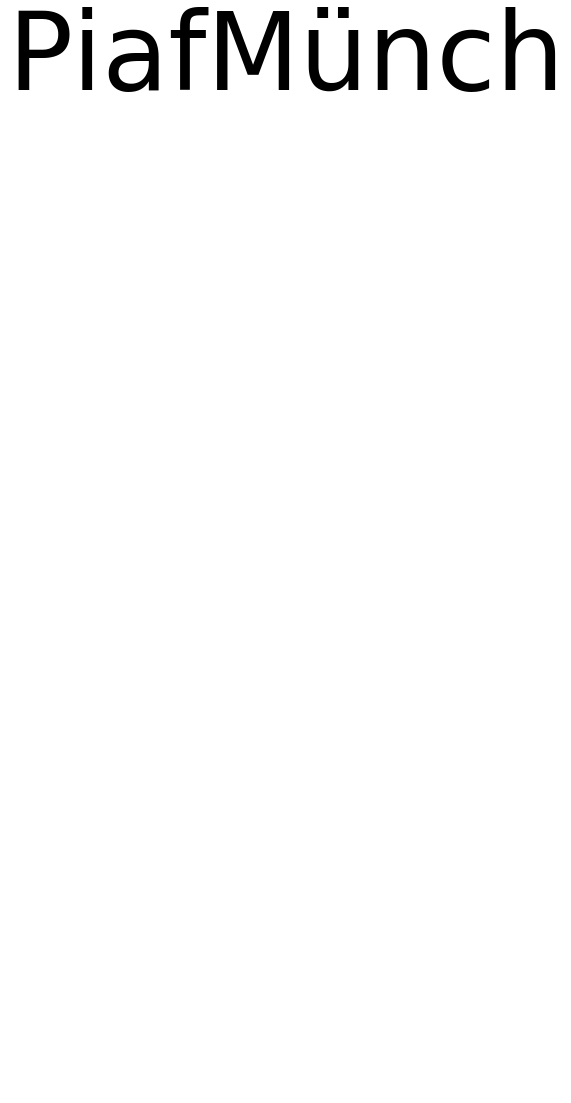

In [6]:

nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [20, 20]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




fig = plt.figure()

ax = fig.add_subplot(122, projection='3d')
plt.rcParams.update({'font.size': 90})
plt.title('PiafMünch')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100

# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
ax.grid(False)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    


for i in range(len(nodes_cor)):
    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
            markersize=20, color=so_si_color(i), alpha=1)
    #ax.scatter(cor_x[i], cor_y[i],cor_z[i], s=100, marker = organ_marker(node_connection[i,0]) ,edgecolors= organ_color3(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-8.8,0)

#ax.elev = 89.9
#ax.azim = 270.1
ax.dist = 6.0
#ax.view_init(0, 90)
ax.view_init(0, 90)
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)



ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 90})
plt.title('CPlantBox$\u2192$ ')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=0.9, linewidth=12)

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-8.8,0)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
plt.rcParams.update({'font.size': 40})
root_patch = mpatches.Patch(color='orange', label='Root')
# seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='Leaf')
plt.legend(handles=[leaf_patch,stem_patch,  root_patch],bbox_to_anchor=(0.5, 0.3), loc=2, borderaxespad=0.)
ax.view_init(0, 90)
plt.show()


fig.savefig("{}.svg".format('CPlantBox_to_PiafMunch'), bbox_inches='tight')

In [7]:
N1R_node
print(N1R_c_nd)
print(N1R_conn)
node_connection

NameError: name 'N1R_node' is not defined

In [7]:
# file-output.py



Nt = len(nodes)-1
Nc = len(node_connection)

#condition = ==0
#print(nodes_organtype[:,0])
nodes_organtype[1,2] =2
nodes_organtype[1,1] =1
node_connection[0,0] =1

N1L_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & ((nodes_organtype[:,1] ==8)|(nodes_organtype[:,1] ==4)  ) & (nodes_organtype[:,2] ==1 )]

N1L_c_nd = list(range(1, len(N1L_node)+1))
N1L_conn = list(range(1, len(N1L_node)+1))
for i in range(len(N1L_node)):
    N1L_c_nd[i] = node_connection[(node_connection[:,0] == N1L_node[i][0])]
    N1L_conn[i] = np.where( node_connection[:,1] == N1L_c_nd[i][0,1])[0]


N1R_node = nodes_organtype[(nodes_organtype[:,0] >2 ) & (nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )]
N1R_c_nd = list(range(1, len(N1R_node)+1))
N1R_conn = list(range(1, len(N1R_node)+1))
for i in range(len(N1R_node)):
    N1R_c_nd[i] = node_connection[(node_connection[:,1] == N1R_node[i][0])]
    N1R_conn[i] = np.where( node_connection[:,1] == N1R_c_nd[i][0,1])[0]
N1R_r_abs = 1e-025

N2_node = nodes_organtype[ (nodes_organtype[:,2] ==2 )]

# #print(N2_node)
# N2_c_nd_1 = list(range(1, len(N2_node)+1))
# N2_conn_1 = list(range(1, len(N2_node)+1))
# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]
#     else:
#         N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
#         N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]

# #temp= N2_c_nd_1[0]
# #temp=temp[::-1] 
# #print(temp )
# N2_c_nd_2 = list(range(1, len(N2_node)+1))
# N2_conn_2 = list(range(1, len(N2_node)+1))

# for i in range(len(N2_node)):
#     if N2_node[i,1] == 2 or N2_node[i,1] == 1:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
#     else:
#         N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
# #N2_c_nd_2[0] = np.array([temp]) 
# #print(N2_c_nd_2)
# for i in range(len(N2_node)):
#     N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][0])[0]

# N2_conn_2[0]=[0-(np.where( node_connection[:,0] == 1))[0][1]-2]


################## Nodes With 2 Connections #########################
N2_c_nd_1 = list(range(1, len(N2_node)+1))
N2_conn_1 = list(range(1, len(N2_node)+1))
for i in range(len(N2_node)):
    N2_c_nd_1[i] = node_connection[(node_connection[:,0] == N2_node[i,0])]
    N2_conn_1[i] = np.where( node_connection[:,0] == N2_c_nd_1[i][0,0])[0]


#temp= N2_c_nd_1[0]
#temp=temp[::-1] 
#print(temp )

N2_c_nd_2 = list(range(1, len(N2_node)+1))
N2_conn_2 = list(range(1, len(N2_node)+1))

for i in range(len(N2_node)):
    N2_c_nd_2[i] = node_connection[(node_connection[:,1] == N2_node[i,0])]
    N2_conn_2[i] = np.where( node_connection[:,1] == N2_c_nd_2[i][0][1])[0]

    

################## Nodes With 3 Connections #########################
N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
print(N3_node)

N3_c_nd_1 = list(range(1, len(N3_node)+1))
N3_conn_1 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_1[i] = 0-np.where( node_connection[:,0] == N3_c_nd_1[i])[0][0]-1
    else:
        N3_c_nd_1[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_1[i] = np.where( node_connection[:,1] == N3_c_nd_1[i])[0][0]+1

N3_c_nd_2 = list(range(1, len(N3_node)+1))
N3_conn_2 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][0][1]
        N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i])[0][0]+1
    else:
        N3_c_nd_2[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][0][0]
        N3_conn_2[i] = 0-np.where( node_connection[:,0] == N3_c_nd_2[i])[0][0]-1

N3_c_nd_3 = list(range(1, len(N3_node)+1))
N3_conn_3 = list(range(1, len(N3_node)+1))
for i in range(len(N3_node)):
    if N3_node[i,1] == 2 or N2_node[i,1] == 1:
        N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])][1][1]
        N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i])[0][0]+1
    else:
        N3_c_nd_3[i] = node_connection[(node_connection[:,1] == N3_node[i,0])][1][0]
        N3_conn_3[i] = 0-np.where( node_connection[:,0] == N3_c_nd_3[i])[0][0]-1
# for i in range(len(N3_node)):
#     print(N3_c_nd_3[i][1,1])
#for i in range(len(N3_node)):
#    print(N3_conn_3[i][0]+1)
# N3_node = nodes_organtype[ (nodes_organtype[:,2] ==3 )]
# #print(N3_node)

# N3_c_nd_1 = list(range(1, len(N3_node)+1))
# N3_conn_1 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_1[i] = node_connection[(node_connection[:,1] == N3_node[i,0])]
#     N3_conn_1[i] = np.where( node_connection[:,0] == N3_c_nd_1[i][0,0])[0]

# #print(len(N3_c_nd_1))
# #print(len(N3_conn_1))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_1[i][0,0])
# #for i in range(len(N3_node)):
# #    print(N3_conn_1[i][0]+1)
    
    
# N3_c_nd_2 = list(range(1, len(N3_node)+1))
# N3_conn_2 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_2[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_2[i] = np.where( node_connection[:,1] == N3_c_nd_2[i][0,1])[0]

# #print(len(N3_c_nd_2))
# #print(len(N3_conn_2))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_2[i][0,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_2[i][0]+1)
    
# N3_c_nd_3 = list(range(1, len(N3_node)+1))
# N3_conn_3 = list(range(1, len(N3_node)+1))
# for i in range(len(N3_node)):
#     N3_c_nd_3[i] = node_connection[(node_connection[:,0] == N3_node[i,0])]
#     N3_conn_3[i] = np.where( node_connection[:,1] == N3_c_nd_3[i][1,1])[0]

# #print(N3_c_nd_3)
# #print(len(N3_conn_3))
# #for i in range(len(N3_node)):
# #    print(N3_c_nd_3[i][1,1])
# #for i in range(len(N3_node)):
# #    print(N3_conn_3[i][0]+1)

N4_node = nodes_organtype[ (nodes_organtype[:,2] ==4 )]
#print(N4_node)

N4_c_nd_1 = list(range(1, len(N4_node)+1))
N4_conn_1 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_1[i] = node_connection[(node_connection[:,0] == N4_node[i,0])][0][1]
    N4_conn_1[i] = np.where( node_connection[:,1] == N4_c_nd_1[i])[0][0]+1

print(N4_c_nd_1)
print(N4_conn_1)
#for i in range(len(N4_node)):
#    print(N4_c_nd_1[i])
#for i in range(len(N4_node)):
#    print(N4_conn_1[i][0]+1)
    
    
N4_c_nd_2 = list(range(1, len(N4_node)+1))
N4_conn_2 = list(range(1, len(N4_node)+1))
N4_conn_3 = list(range(1, len(N4_node)+1))
N4_conn_4 = list(range(1, len(N4_node)+1))
for i in range(len(N4_node)):
    N4_c_nd_2[i] = node_connection[(node_connection[:,1] == N4_node[i,0])]
    N4_conn_2[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][0][0])[0]
    N4_conn_3[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][1][0])[0]
    N4_conn_4[i] = np.where( node_connection[:,0] == N4_c_nd_2[i][2][0])[0]

# print(N4_c_nd_2[0][0][1])
# print(N4_c_nd_2[0][1][1])    
# print(N4_c_nd_2[0][2][1]) 

# print(N4_c_nd_2[0][0][0])
# print(N4_c_nd_2) 
# print(N4_conn_2) 
# print(N4_conn_3) 
# print(N4_conn_4) 










#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters
kML = np.zeros(len(nodes_organtype))
vML = np.zeros(len(nodes_organtype))
kMU = np.zeros(len(nodes_organtype))
vMU = np.zeros(len(nodes_organtype))
kMParMb = np.zeros(len(nodes_organtype))
vMParMb = np.zeros(len(nodes_organtype))
kM = np.zeros(len(nodes_organtype))
Vmax = np.zeros(len(nodes_organtype))
C_targ = np.zeros(len(nodes_organtype))
kHyd = np.zeros(len(nodes_organtype))
k1 = np.zeros(len(nodes_organtype))
k2 = np.zeros(len(nodes_organtype))
k3 = np.zeros(len(nodes_organtype))
StructC = np.zeros(len(nodes_organtype))
vol_ST = np.zeros(len(nodes_organtype))
volPhlApo = np.zeros(len(nodes_organtype))
volParApo = np.zeros(len(nodes_organtype))
k_Lockhart = np.zeros(len(nodes_organtype))
P_thr = np.zeros(len(nodes_organtype))
vol_Sympl_max = np.zeros(len(nodes_organtype))

r_Xyl = np.full(len(nodes_organtype), 6.944444444444445e-2) # 6.944444444444445e-8 MPa h mL-1
r_ST = np.full(len(nodes_organtype), 14050.3/200)  #MPa h mL-1
r_Trsv = np.full(len(nodes_organtype), 100)
r_PhlMb = np.full(len(nodes_organtype), 135.785)
r_ParMb = np.full(len(nodes_organtype), 1e+025)
r_Apo = np.full(len(nodes_organtype), 1e+025)
r_Sympl = np.full(len(nodes_organtype), 1e+025)




for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        kML[i]     =  1e-100
        vML[i]        = 0.000143136*0.5 # 6.4031395909090895e-06#  0.000143136     #different in source, sink or connection of piafmunch2
        kMU[i]        = 10e-100     #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 10
        Vmax[i]       = 5e-5
        C_targ[i]     = 0.17      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 0      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018
    elif nodes_organtype[i,0]>0 and nodes_organtype[i,1]==2 and nodes_organtype[i,2]==1:   #all the sinks  
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        =   1e+99      #different in source, sink or connection of piafmunch2
        vMU[i]        = 2.82627e+95 # 1.191855954263808e+97      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 10
        Vmax[i]       = 50
        C_targ[i]     =     0.1     #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018        
    elif nodes_organtype[i,2]!=1:
        kML[i]     =  1e-100
        vML[i]        = 0      #different in source, sink or connection of piafmunch2
        kMU[i]        = 1e-100      #different in source, sink or connection of piafmunch2
        vMU[i]        = 0      #different in source, sink or connection of piafmunch2
        kMParMb[i]    = 1
        vMParMb[i]    = 0
        kM[i]         = 10           #1e-100
        Vmax[i]       = 1e-5       # 0 default
        C_targ[i]     = 0.1      #different in source, sink or connection of piafmunch2
        kHyd[i]       = 0
        k1[i]         = 0
        k2[i]         = 0
        k3[i]         = 0
        StructC[i]    = 1      #different in source, sink or connection of piafmunch2
        vol_ST[i]     = 8.83573e-05
        volPhlApo[i]  = 0.1
        volParApo[i]  = 0.1
        k_Lockhart[i] = 0
        P_thr[i]      = 1
        vol_Sympl_max[i] = 0.00018



#'******** INITIAL VALUES *********\n'
#initialization of the parameters
Q_ST = np.full(len(nodes_organtype), 0)
Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Starch = np.full(len(nodes_organtype), 1)
Q_PhlApo = np.full(len(nodes_organtype), 4.4e-006)
Q_ParApo = np.full(len(nodes_organtype), 4.4e-006)
Tr_Q_ST = np.full(len(nodes_organtype), 0)
Tr_Q_Sympl = np.full(len(nodes_organtype), 4.4e-006)
Tr_Starch = np.full(len(nodes_organtype), 1)
Tr_Q_PhlApo = np.full(len(nodes_organtype), 0)
Tr_Q_ParApo = np.full(len(nodes_organtype), 0)
vol_Sympl = np.full(len(nodes_organtype), 8.83573e-005)

#******** SIMULATION SOLVING PARAMETERS *********


#'******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n'
#initialization of the parameters

Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_ST_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_Sympl_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Starch_Abs = np.full(len(nodes_organtype), 1e-007)
Tr_Q_PhlApo_Abs = np.full(len(nodes_organtype), 8.83573e-012)
Tr_Q_ParApo_Abs = np.full(len(nodes_organtype), 1e-007)
vol_Sympl_Abs = np.full(len(nodes_organtype), 8.83573e-012)



for i in range(len(nodes_organtype)): #given different value based on whether it is source, sink or connection
    if (nodes_organtype[i,1] == 8 or nodes_organtype[i,1] == 4) and nodes_organtype[i,2] == 1: #all the sources       
        Q_ST_Abs[i] =  1e-015
        Q_Sympl_Abs[i] =  1e-015
        Starch_Abs[i] =  1e-012
        Q_PhlApo_Abs[i] =  1e-015
        Q_ParApo_Abs[i] =  1e-015
        Tr_Q_ST_Abs[i] =  1e-012
        Tr_Q_Sympl_Abs[i] =  1e-012
        Tr_Starch_Abs[i] =  1e-012
        Tr_Q_PhlApo_Abs[i] =  1e-015
        Tr_Q_ParApo_Abs[i] =  1e-015
        vol_Sympl_Abs[i] = 1e-012












f = open('PiafMunch2_PMA1.ini','w')
f.write('******** DESCRIPTION OF ARCHITECTURE *********\n\n')

f.write("Total number of Nodes : {0} = {1}\n".format('Nt', Nt))
f.write("number of Internode Connections : {0} = {1}\n\n".format('Nc', Nc))

f.write("Nodes Of Connectivity Order 1, Transpiring Leaf Ends : {0} = {1}\n".format('N1L', len(N1L_node)))
f.write("{:s}  {:s}  {:s}\n".format('node#','c.node','conn.#'))
for i in range(len(N1L_node)):
    f.write("{:d}  {:d}  {:d}\n\n".format(N1L_node[i][0],N1L_c_nd[i][0,1],(N1L_conn[i][0]+1)))





f.write("Nodes Of Connectivity Order 1, Absorbing Root Ends : {0} = {1}\n\n".format('N1R', len(N1R_node)))
f.write("{:s}  {:s}  {:s}  {:s}\n".format('node#','c.node','conn.#','r_abs'))
for i in range(len(N1R_node)):
    f.write("{:d}  {:d}  {:d} {:e}\n\n".format(N1R_node[i][0], N1R_c_nd[i][0,0],0- N1R_conn[i][0]-1, 1e-025))

f.write('Nodes Of Connectivity Order 2 :  {0} = {1}\n\n' .format('N2', len(N2_node) ))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2'))
for i in range(len(N2_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} \n".format(N2_node[i][0],N2_c_nd_1[i][0,1],N2_conn_1[i][0]+1,N2_c_nd_2[i][0,0],0 -N2_conn_2[i][0]-1))    
f.write('\n')

f.write("Nodes Of Connectivity Order 3 :  {0} = {1}\n".format('N3', np.count_nonzero(unq_cnt == 3)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3'))
for i in range(len(N3_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d}\n".format(N3_node[i][0],N3_c_nd_1[i],N3_conn_1[i],N3_c_nd_2[i],N3_conn_2[i],N3_c_nd_3[i],N3_conn_3[i]))    
f.write('\n')




f.write("Nodes Of Connectivity Order 4 :  {0} = {1}\n\n".format('N4', np.count_nonzero(unq_cnt == 4)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4'))

for i in range(len(N4_node)):
    f.write("{:d}  {:d}  {:d} {:d} {:d} {:d} {:d} {:d} {:d}\n".format(N4_node[i][0],N4_c_nd_1[i],N4_conn_1[i],N4_c_nd_2[i][0][0],0-N4_conn_2[i][0]-1,N4_c_nd_2[i][1][0],0-N4_conn_3[i][0]-1,N4_c_nd_2[i][2][0],0-N4_conn_4[i][0]-1))    
f.write('\n')



f.write("Nodes Of Connectivity Order 5 :  {0} = {1}\n\n".format('N5', np.count_nonzero(unq_cnt == 5)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5'))
f.write("Nodes Of Connectivity Order 6 :  {0} = {1}\n".format('N6', np.count_nonzero(unq_cnt == 6)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6'))
f.write("Nodes Of Connectivity Order 7 :  {0} = {1}\n".format('N7', np.count_nonzero(unq_cnt == 7)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7'))
f.write("Nodes Of Connectivity Order 8 :  {0} = {1}\n".format('N8', np.count_nonzero(unq_cnt == 8)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n\n".format('node#','c.nd.1','conn.1','c.nd.2','conn.2','c.nd.3','conn.3','c.nd.4','conn.4','c.nd.5','conn.5','c.nd.6','conn.6','c.nd.7','conn.7','c.nd.8','conn.8'))

f.write('******** WATER FLUX - RELATED PARAMETERS *********\n\n')
f.write("{:s}  {:s}  {:s} \n".format('T\xb0 K','visco=f(C)','NonLin.Psi+NonZeroSugarVol.'))
f.write("{:s}  {:s}  {:s} \n".format('293','true','true'))

f.write('InterNode Connections -- Axial Resistances (MPa h / ml) : Nc= {}\n' .format(len(node_connection)))
f.write("{:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','upfl.node','dnfl.node','r_Xyl','r_ST' ))
for i in range(len(node_connection)):
    f.write("{:d}  {:d}  {:d} {:e} {:e}\n".format(i+1,node_connection[i,0],node_connection[i,1],r_Xyl[i],r_ST[i]))
f.write('\n')

f.write('Individual Node : Lateral Resistances (MPa h / ml)\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','r_Trsv','r_PhlMb','r_ParMb','r_Apo', 'r_Sympl' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}\n".format(nodes_organtype[i+1][0],r_Trsv[i],r_PhlMb[i],r_ParMb[i],r_Apo[i],r_Sympl[i]))
f.write('\n')


f.write('******** CARBON Lateral FLUX - RELATED PARAMETERS *********\n')    
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s}  {:s} \n".format('node#','kML(M)','vML(mmol/h)','kMU(M)','vMU(mmol/h)', 'kMParMb(M)','vMParMb(mmol/h)','kM(M)','Vmax(M/h)','C_targ(M)','kHyd(h-1)','k1(h-1)','k2','k3(h-1)','StructC','vol_ST(ml)','volPhlApo,ml','volParApo,ml','k_Lockhart','P_thr(MPa)','vol_Sympl_max,ml' ))    
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e}\n"
    .format(nodes_organtype[i+1][0],kML[i+1], vML[i+1], kMU[i+1], vMU[i+1], kMParMb[i+1], vMParMb[i+1], kM[i+1], Vmax[i+1], C_targ[i+1], kHyd[i+1], 
    k1[i+1], k2[i+1], k3[i+1], StructC[i+1], vol_ST[i+1], volPhlApo[i+1], volParApo[i+1], k_Lockhart[i+1], P_thr[i+1], vol_Sympl_max[i+1]))
f.write('\n')



f.write('******** INITIAL VALUES  *********\n')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST[i+1],Q_Sympl[i+1],Starch[i+1],Q_PhlApo[i+1],Q_ParApo[i+1], 
                    Tr_Q_ST[i+1],Tr_Q_Sympl[i+1],Tr_Starch[i+1],Tr_Q_PhlApo[i+1],Tr_Q_ParApo[i+1],vol_Sympl[i+1]))
f.write('\n')    
    
f.write('******** SIMULATION SOLVING PARAMETERS *********\n')
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('StartTime','EndTime','OutputStep', 'TracerHalfLife','Rel_Tol'))
f.write('{:s}  {:s}  {:s}   {:s}  {:s}\n'.format('0', '100', '0.166667', '0.33967', '1e-007'))
f.write('\n')     

f.write('***Abs_Tols for individual  nodes ***')
f.write("{:s}  {:s}  {:s}  {:s}  {:s}  {:s} {:s}  {:s}  {:s}  {:s}  {:s}  {:s}\n".format('node#','Q.ST(mmol)','Q.Sympl(mmol)','Starch','Q.PhlApo(mmol)', 'Q.ParApo(mmol)',
                                            'Tr.Q.ST(mmol)','Tr.Q.Sympl(mmol)','Tr.Starch','Tr.Q.PhlApo(mmol)', 'Tr.Q.ParApo(mmol)','vol_Sympl(ml)' ))
for i in range(len(nodes_organtype)-1):
    f.write("{:d}  {:e}  {:e} {:e} {:e} {:e}  {:e}  {:e} {:e} {:e} {:e} {:e}\n"
            .format(nodes_organtype[i+1][0], Q_ST_Abs[i+1],Q_Sympl_Abs[i+1],Starch_Abs[i+1],Q_PhlApo_Abs[i+1],Q_ParApo_Abs[i+1], 
                    Tr_Q_ST_Abs[i+1],Tr_Q_Sympl_Abs[i+1],Tr_Starch_Abs[i+1],Tr_Q_PhlApo_Abs[i+1],Tr_Q_ParApo_Abs[i+1],vol_Sympl_Abs[i+1]))
f.write('\n')     
    
f.write('******** OUTPUT SETTINGS : INDIVIDUAL NODE - LATERAL FLUXES-RELATED VARIABLES *********\n')    
f.write('Nodes selected for plotting  : nsp = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
    
f.write('individual-Node-related variables selected for plotting : nvp = 1\n')    
f.write('C_ST (mmol / ml)\n')        
#f.write('JS_PhlMb (mmol / h)\n')        
#f.write('JW_Trsv (ml / h)\n')        

   
f.write('Nodes selected for saving  : nss = {:d}\n' .format((len(nodes_organtype))-1 ))    
for i in range(len(nodes_organtype)-1):
    f.write('{:d}\n'.format(nodes_organtype[i+1][0]))
f.write('\n')    


f.write('individual-Node-related variables selected for saving : nvs = 34\n')    
f.write('''
C_ApoUpflow (mmol / ml)
C_ParApo (mmol / ml)
C_PhlApo (mmol / ml)
C_ST (mmol / ml)
C_Sympl (mmol / ml)
C_SymplUpflow (mmol / ml)
JS_Apo (mmol / h)
JS_ParMb (mmol / h)
JS_PhlMb (mmol / h)
JS_Sympl (mmol / h)
JW_Apo (ml / h)
JW_ParMb (ml / h)
JW_Sympl (ml / h)
JW_Trsv (ml / h)
P_PhlApo (MPa)
P_ST (MPa)
P_ST_dot (MPa / h)
P_Sympl (MPa)
P_Sympl_dot (MPa / h)
P_Xyl (MPa)
PsiSoil (MPa)
Psi_ParApo (MPa)
Psi_PhlApo (MPa)
Psi_ST (MPa)
Q_PhlApo (mmol)
Q_PhlApo_dot (mmol / h)
Q_Sympl_dot (mmol / h)
Transpirat (ml / h)
vol_Sympl (ml)
vol_Sympl_dot (ml / h)
StarchSyn (mmol eq. Glu / h)
Starch (mmol eq. Glu)
Q_ST (mmol)
Q_ParApo (mmol)

''')

f.write('******** OUTPUT SETTINGS : INTERNODE CONNECTION - AXIAL FLUXES-RELATED VARIABLES *********\n')  
f.write('node-to-node Fluxes selected for plotting  : fsp = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for plotting : fvp = 1\n')    
#f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')        
      
 
f.write('node-to-node Fluxes selected for saving  : fss = {} \n' .format(len(node_connection)))
for i in range(len(node_connection)):
    f.write("{:d}\n".format((i+1)))
f.write('\n')

f.write('node-to-node-Fluxes-related variables selected for saving : fvs = 4\n')    
f.write('JS_ST (mmol / h)\n')        
f.write('JW_ST (ml / h)\n')  
f.write('C_Upflow (mmol / ml)\n')
f.write('JW_Xyl (ml / h)\n')  

print('out put successful')




f.close()

[[ 5  2  3]
 [24  4  3]
 [35  4  3]]
[]
[]
out put successful


In [357]:
# np.where(node_connection[:,0] == 4)[0][0]
# np.where(node_connection[:,0] == 12)[0][0]
# np.where(node_connection[:,0] == 20)[0][0]

2

In [87]:

now = datetime.datetime.now()
piaf_munch_p_name = "PMA"
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe PiafMunch2_PMA1.ini -noGUI -q')
os.system('mv /mnt/c/CPlantBox/python/PiafMunch2_PMA1_2019-{:02}-{:02}*output.txt  ./{}_output.txt'.format(now.month, now.day, piaf_munch_p_name ,i) )


256

/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


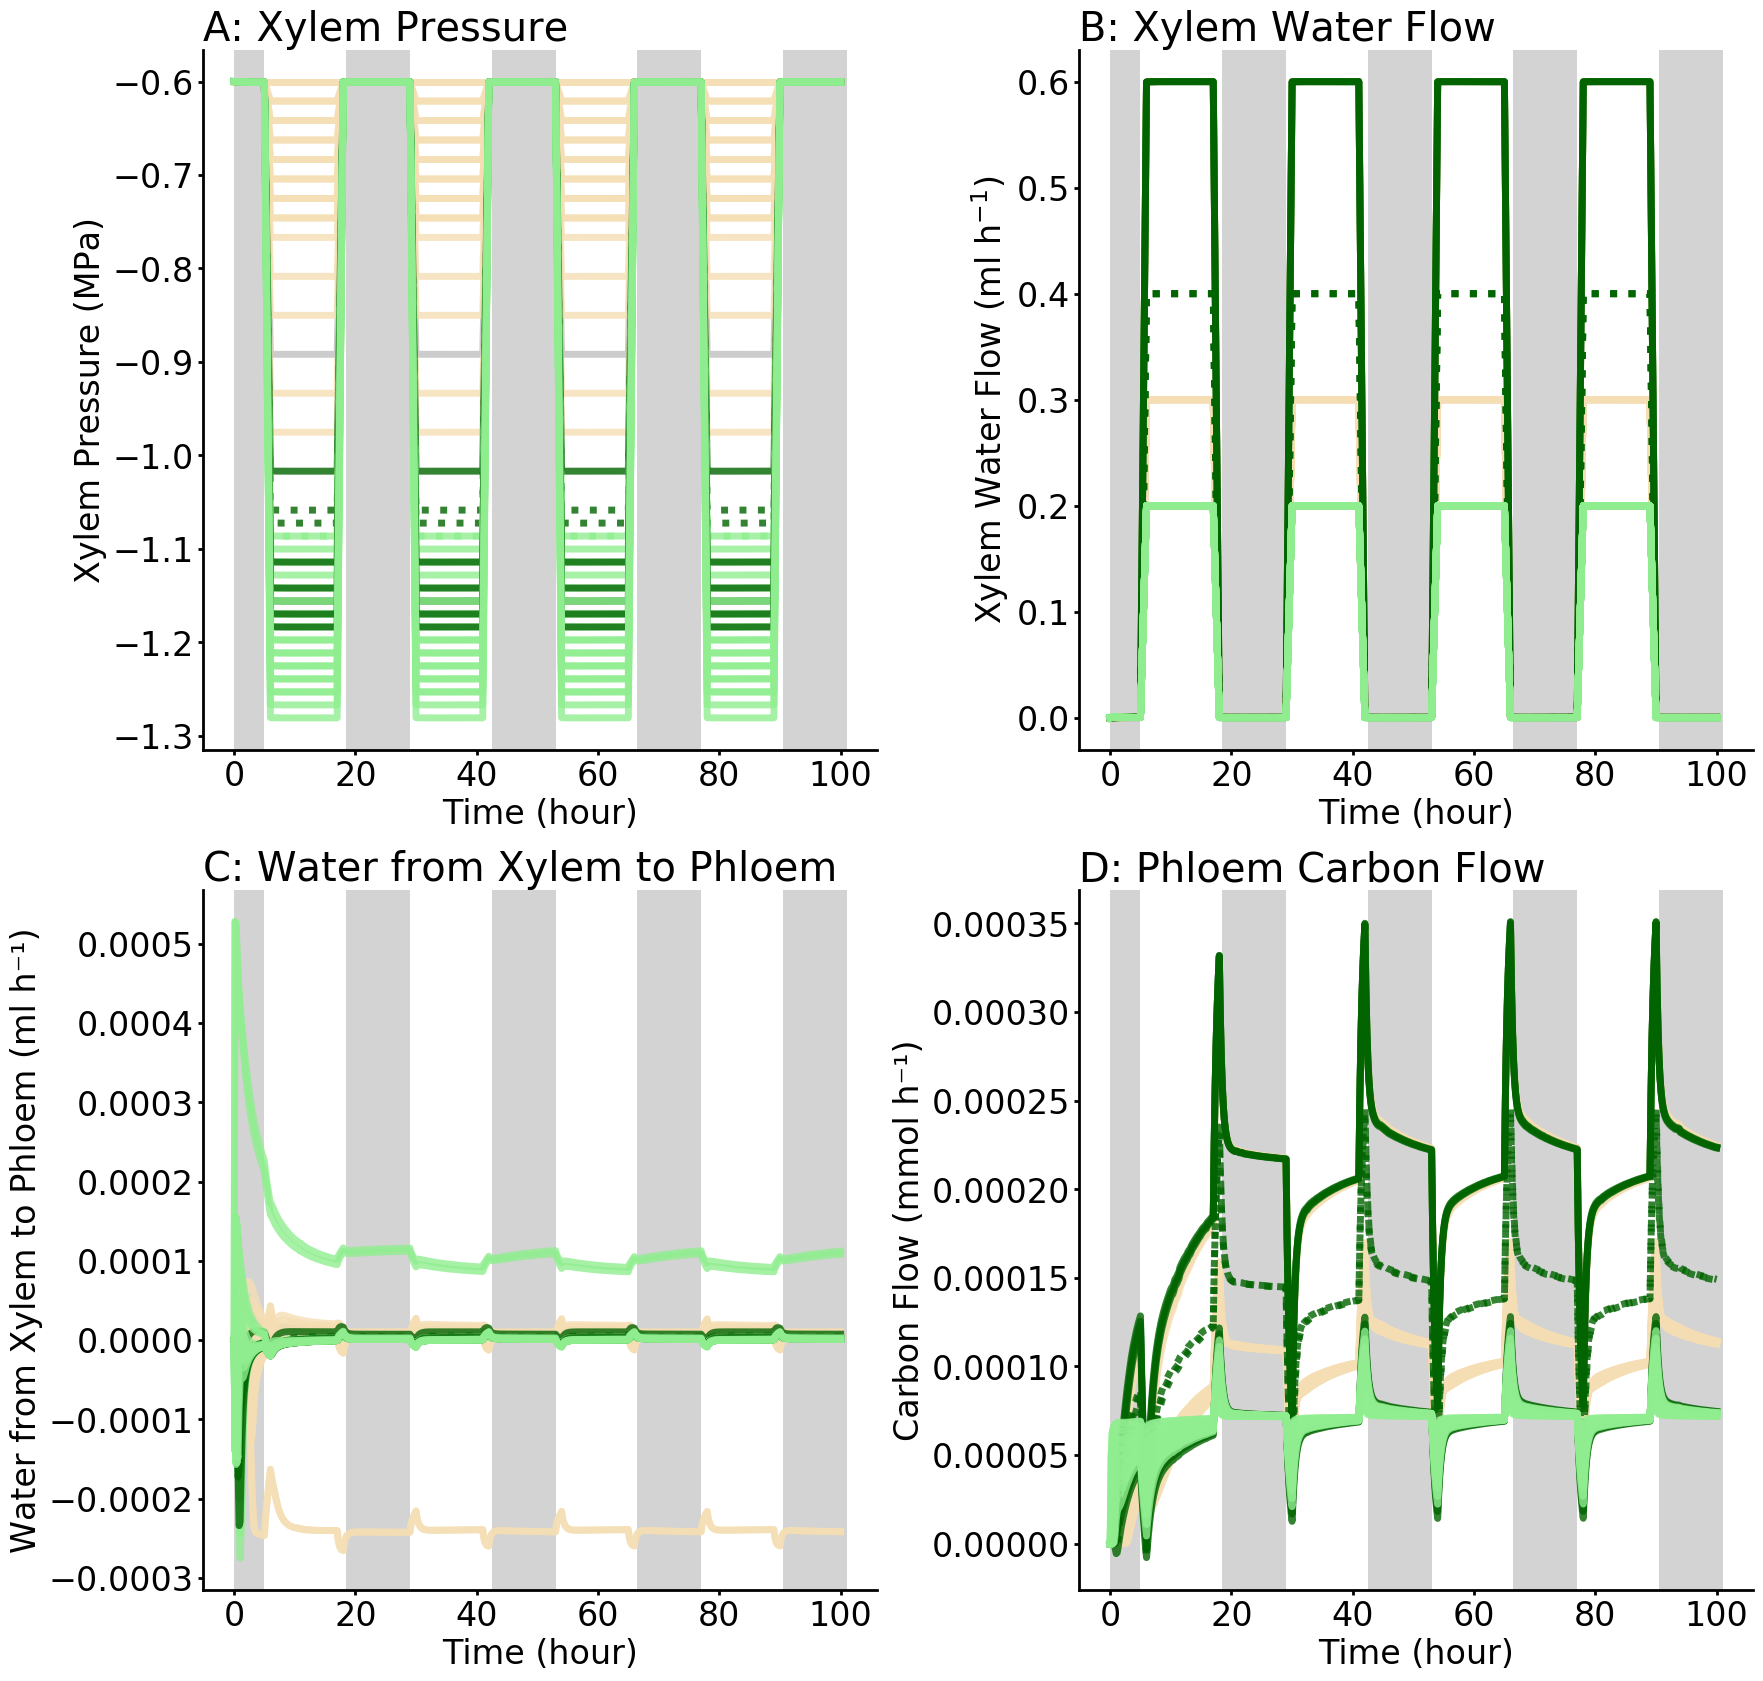

In [66]:
path = 'PMA_output.txt'
path2 = 'PMA_output.txt'
output = pd.read_table(path2,sep='\t',header=1)

##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])

plt.style.use('default')

output2=output

lable_size=16
title_size =24

def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem between two leaves')
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18.5+24*i,29+24*i,facecolor='lightgrey',zorder=0)

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)




#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)

#plt.ylim((-0.001, 0.001))  


def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'darkgreen'
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 


    
def organ_color_n(int):
    if nodes_organtype[int,1] == 8: #int is source 
        return 'lightgreen'
    elif nodes_organtype[int,1] == 2: #int is sink
        return 'wheat'
    elif nodes_organtype[int,1] == 4:
        return 'darkgreen'
    else:
        return 'silver'    

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'    
    
time = np.array(output.iloc[:, 0])

x = np.array(output.iloc[:, 0])
i=37


ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')



plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("A: Xylem Pressure".format(i ,output.columns[n_begin]), color='black' ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color_n(i),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)


green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')

add_day_night()









ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')


plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("B: Xylem Water Flow".format(i ,output2.columns[n_begin]),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in JW_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)


green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')


add_day_night()



ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'

    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 

plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in range(len(np.transpose(JW_Trsv))-1):
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8, ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



    
stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
add_day_night()
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in range(len(np.transpose(JS_ST))-1):
        ax.plot(x,[pt[i] for pt in JS_ST], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8, ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))





#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
add_day_night()













plt.show()
s =output2.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.png".format(s), bbox_inches='tight')




In [ ]:
import datetime
import pandas as pd
import matplotlib.lines as mlines
now = datetime.datetime.now()
piaf_munch_p_name = "PMA_2_hetero_soil"
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe PiafMunch2_PMA1.ini -noGUI -q')
os.system('mv /mnt/c/CPlantBox/python/PiafMunch2_PMA1_2019-{:02}-{:02}*output.txt  ./{}_output.txt'.format(now.month, now.day, piaf_munch_p_name ,i) )
path = 'PMA_2_hetero_soil_output.txt'

#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 

time = np.array(output.iloc[:, 0])

plt.rcParams['figure.figsize'] = [24, 12]
i=37
f = plt.figure()
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*34-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))

def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

def organ_color1(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'None'

def zorder(int):    
    if int == 49: #int is source 
        return 11.
    elif int == 10: #int is source 
        return 11.
    elif int == 22:
        return 11.
    else:
        return 0.
    
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in stem_nodes:
        return 's'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    else:
        return 'None'
    
for i in range(41):
    plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 18})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Water Flow between 22th and 23th node (Stem)')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Water Flow between 10th and 11th node (Root)')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Water Flow between 49th and 50th node (Leaf)')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Leaf')




plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle],bbox_to_anchor=(0.62, 0.27), loc=2, borderaxespad=0.)

plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.pdf".format(s), bbox_inches='tight')



In [ ]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 30})
import numpy as np


def line_style(int): #set line style in the plot figure
    if  30<int<40 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'

f = plt.figure()
ax = plt.subplot(111)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*30+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)
plt.ylabel('Carbon Flow in Phloem (mmol h⁻¹)', **hfont)
#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
add_day_night()
plt.title('B: Phloem Carbon Flow with Diurnal Transpiration \n and Heterogeneous Soil Water Potential')  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5, ls = line_style(node_connection[i,0]),zorder=zorder(i))
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5, ls = line_style(node_connection[i,0]),zorder=zorder(i))



    
stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
plt.legend(handles=[leaf_line,stem_line, root_line],bbox_to_anchor=(0.19, 0.3), ncol=1, loc=2, borderaxespad=0.)

#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 20})
#plt.ylim((-0.001, 0.001))  
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')

In [55]:
plt.style.use('default')
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18.5+24*i,29+24*i,facecolor='lightgrey',zorder=0)
def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'wheat'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'darkgreen'

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'  
one_root =[6,7,8,9,10,11,12]
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
time = np.array(output.iloc[:, 0])

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 30})
i=37
f = plt.figure()
ax = plt.subplot(111)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*34-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.rcParams.update({'font.size': 30})
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("A: PXylem Water Flow with Diurnal Transpiration".format(i ,output.columns[n_begin]))
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
add_day_night()
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,ls = line_style(node_connection[i,0]),zorder=0)
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,ls = line_style(node_connection[i,0]),zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 30})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')




plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.2), loc=2, borderaxespad=0., prop={'size': 22} )
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})

plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.pdf".format(s), bbox_inches='tight')


/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

read_table is deprecated, use read_csv instead.



FileNotFoundError: [Errno 2] File b'PMA_diurnal_hetero_output.txt' does not exist: b'PMA_diurnal_hetero_output.txt'

In [12]:
path = 'PMA_output.txt'
output = pd.read_table(path,sep='\t',header=1)

##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])





/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


In [27]:
#JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]]
np.where(node_connection[:,0] == 1)[0][0]

0

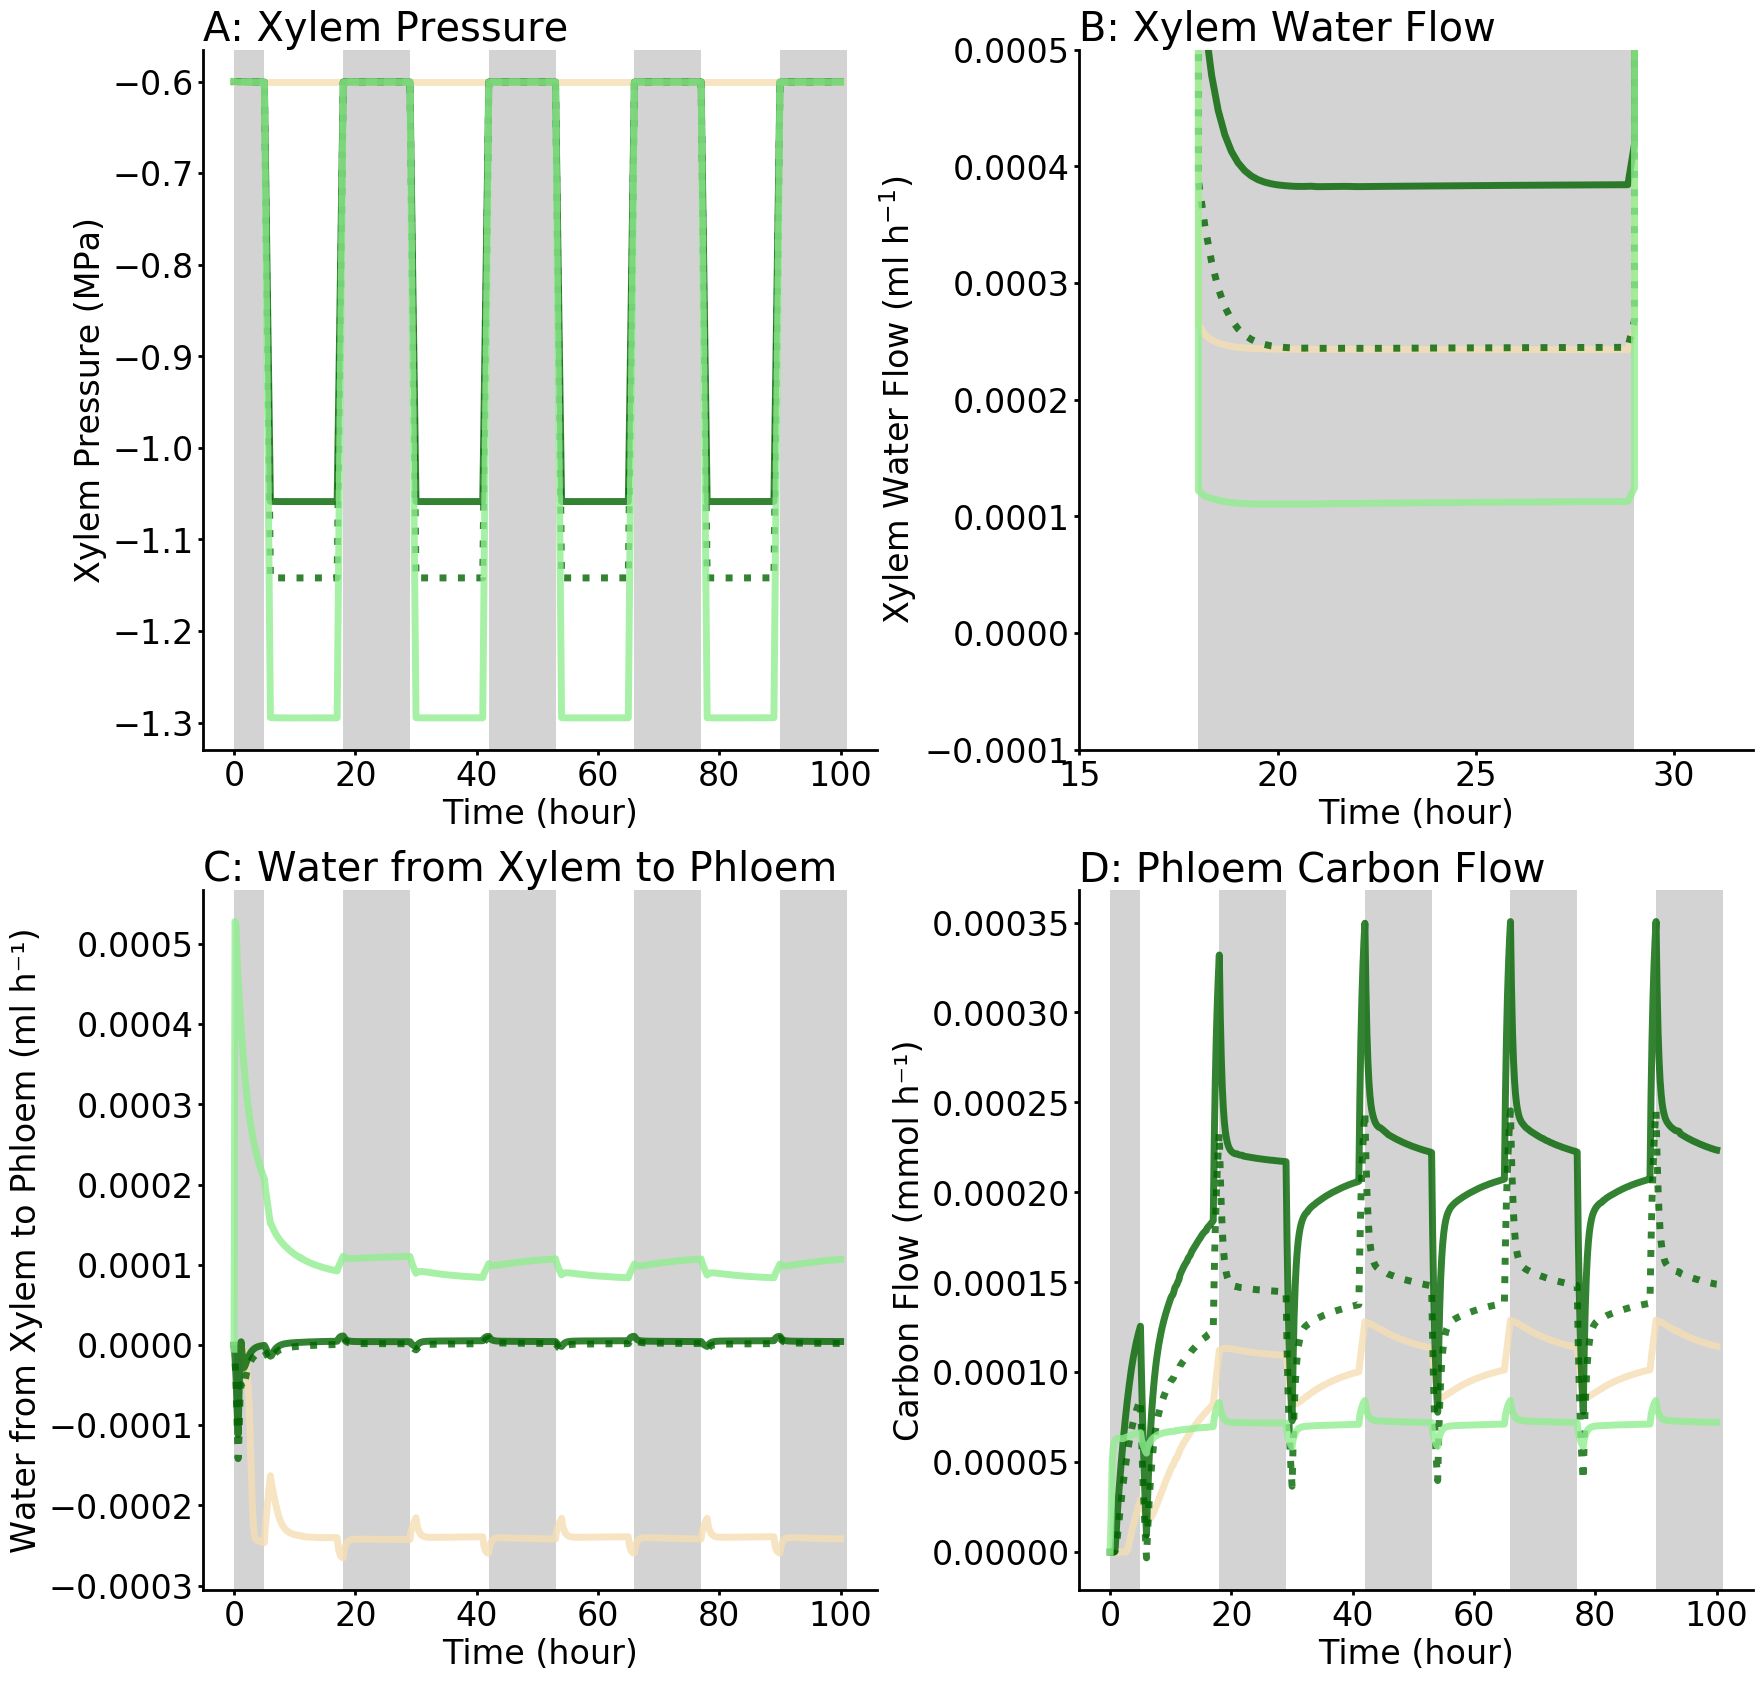

In [69]:
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        
plt.style.use('default')
x=np.array(output.iloc[:,0])
lable_size=16
title_size =24

def line_style(int): #set line style in the plot figure
    if  i ==34 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem\n between\n two\n leaves')


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 24})
import numpy as np
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 

all_marker_1 =[20, 23, 34, 53]
    
def organ_color(int):
    if i == 53: #int is source 
        return 'lightgreen'
    elif i == 20: #int is sink
        return 'wheat'
    elif i == 23 or i == 34:
        return 'darkgreen'
    else:
        return 'None'    

def organ_color_n(int):
    if i == 53: #int is source 
        return 'lightgreen'
    elif i == 20: #int is sink
        return 'wheat'
    elif i == 23 or i == 34:
        return 'darkgreen'
    else:
        return 'None'       
time = np.array(output.iloc[:, 0])

ax = plt.subplot(221)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Pressure (MPa)", color='black')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("A: Xylem Pressure".format(i ,output.columns[n_begin]), color='black' ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_marker_1:
    ax.plot(x,[pt[i] for pt in P_Xyl], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
add_day_night()








ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
plt.title("B: Xylem Water Flow".format(i ,output.columns[n_begin]),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_marker_1:
    ax.plot(x,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
plt.ylim((-0.0001, 0.0005))
plt.xlim((15, 32))
add_day_night()


ax = plt.subplot(223)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
plt.xlabel("Time (hour)", **hfont)
plt.ylabel('Water from Xylem to Phloem (ml h⁻¹)', color='black')
plt.title('C: Water from Xylem to Phloem', color='black', loc="left")  
for i in all_marker_1:
        ax.plot(x,[pt[i] for pt in JW_Trsv], linewidth=5,
                c=organ_color_n(i),alpha=0.8, ls = line_style(i))
add_day_night()


ax = plt.subplot(224)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)


plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)', color='black')
 
plt.title('D: Phloem Carbon Flow', color='black',loc="left")  
for i in all_marker_1:
    ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5
                ,c=organ_color(i),alpha=0.8,zorder=0, ls = line_style(i))
add_day_night()



plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural_homogeneous{}.png".format(s), bbox_inches='tight', dpi=600)



In [ ]:
ax = plt.subplot(222)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')


plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("B: Xylem Water Flow".format(i ,output2.columns[n_begin]),loc="left")
ax.set_ylim(top=0.001)
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in JW_Xyl], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.8,zorder=0, ls = line_style(node_connection[i,0]))
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)


green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')


add_day_night()

plt.legend(handles=[leaf_line, stem_line, stem_line1, root_line],bbox_to_anchor=(0, 0.9), loc=2, borderaxespad=0., prop={'size': 18} )


plt.show()
s =output2.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.png".format(s), bbox_inches='tight')

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(27,36):
    

    f = plt.figure()
    f.subplots_adjust(hspace=0.5)

    #n_begin = (len(node_connection)+1)*i+1
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    ax = plt.subplot(111)
    ax.tick_params(width=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
    #ax = f.gca(projection='3d')
    
    plt.rcParams.update({'font.size': 24})
    plt.xlabel("Time (hour)")
    #plt.ylabel('Phloem pressure Flow (ml h$^{-1}$)', color='tomato')
    #plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
    #plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    s =output.columns[n_begin]
    s = s.replace('/', '')
    plt.title('C: phloem pressure {}'.format(s), color='tomato',loc="right")
    #plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
    for i in range(len(node_connection)-1):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(i),alpha=0.5,zorder=0.5, ls = line_style(node_connection[i,0]))

    #plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    #plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 24})


    add_day_night()


    root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                              markersize=30, label='Root')
    plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
    #plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})

    plt.show()


In [ ]:
output.iloc[:,0]

In [ ]:
for i in range(16,28):
    

    f = plt.figure()
    f.subplots_adjust(hspace=0.5)

    n_begin = (len(node_connection)+1)*i+1
   # n_begin = (len(node_connection))*i-22
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    time= np.array(output.iloc[:,0])
    x = np.array(time)
    y = np.array(var_all)
    ax = plt.subplot(111)
    ax.tick_params(width=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
    #ax = f.gca(projection='3d')
    
    plt.rcParams.update({'font.size': 24})
    plt.xlabel("Time (hour)")
    #plt.ylabel('Phloem pressure Flow (ml h$^{-1}$)', color='tomato')
    #plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
    #plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    s =output.columns[n_begin]
    s = s.replace('/', '')
    plt.title(' {}'.format(s), color='tomato',loc="right")
    #plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
    for i in range(len(node_connection)-1):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(i),alpha=0.5,zorder=0.5, ls = line_style(node_connection[i,0]))

    #plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    #plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 24})


    add_day_night()


    root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                              markersize=30, label='wheat')
    plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
    #plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})

    plt.show()


In [ ]:
output.columns[(len(node_connection)+1)*34+1]

In [ ]:
for k in node_connection[,1]:
    print(k)

In [13]:
path = 'PMA_het_root_output.txt'
output = pd.read_table(path,sep='\t',header=1)

x = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])





/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


In [ ]:
for i in range(18,27):
    

    f = plt.figure()
    f.subplots_adjust(hspace=0.5)

    n_begin = (len(node_connection)+1)*i+1
   # n_begin = (len(node_connection))*i-22
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output.iloc[:,n_begin:n_end])
    print(output2.iloc[0,n_begin:n_begin+1])
    x = np.array(time)
    y = np.array(var_all)
    ax = plt.subplot(111)
    ax.tick_params(width=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
    #ax = f.gca(projection='3d')
    
    plt.rcParams.update({'font.size': 24})
    plt.xlabel("Time (hour)")
    #plt.ylabel('Phloem pressure Flow (ml h$^{-1}$)', color='tomato')
    #plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
    #plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    s =output.columns[n_begin]
    s = s.replace('/', '')
    plt.title(' {}'.format(s), color='tomato',loc="right")
    #plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
    for k in range(0,len(node_connection)):
        ax.plot(x,[pt[k] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[k,0])
                    ,alpha=0.5,zorder=0.5, ls = line_style(node_connection[k,0]))

    #plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    #plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 24})


    add_day_night()


    root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                              markersize=30, label='Root')
    plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
    #plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})

    plt.show()


In [ ]:
len(node_connection)
n_begin = (len(node_connection)+1)*4+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
output.iloc[:,n_begin:n_end+1]

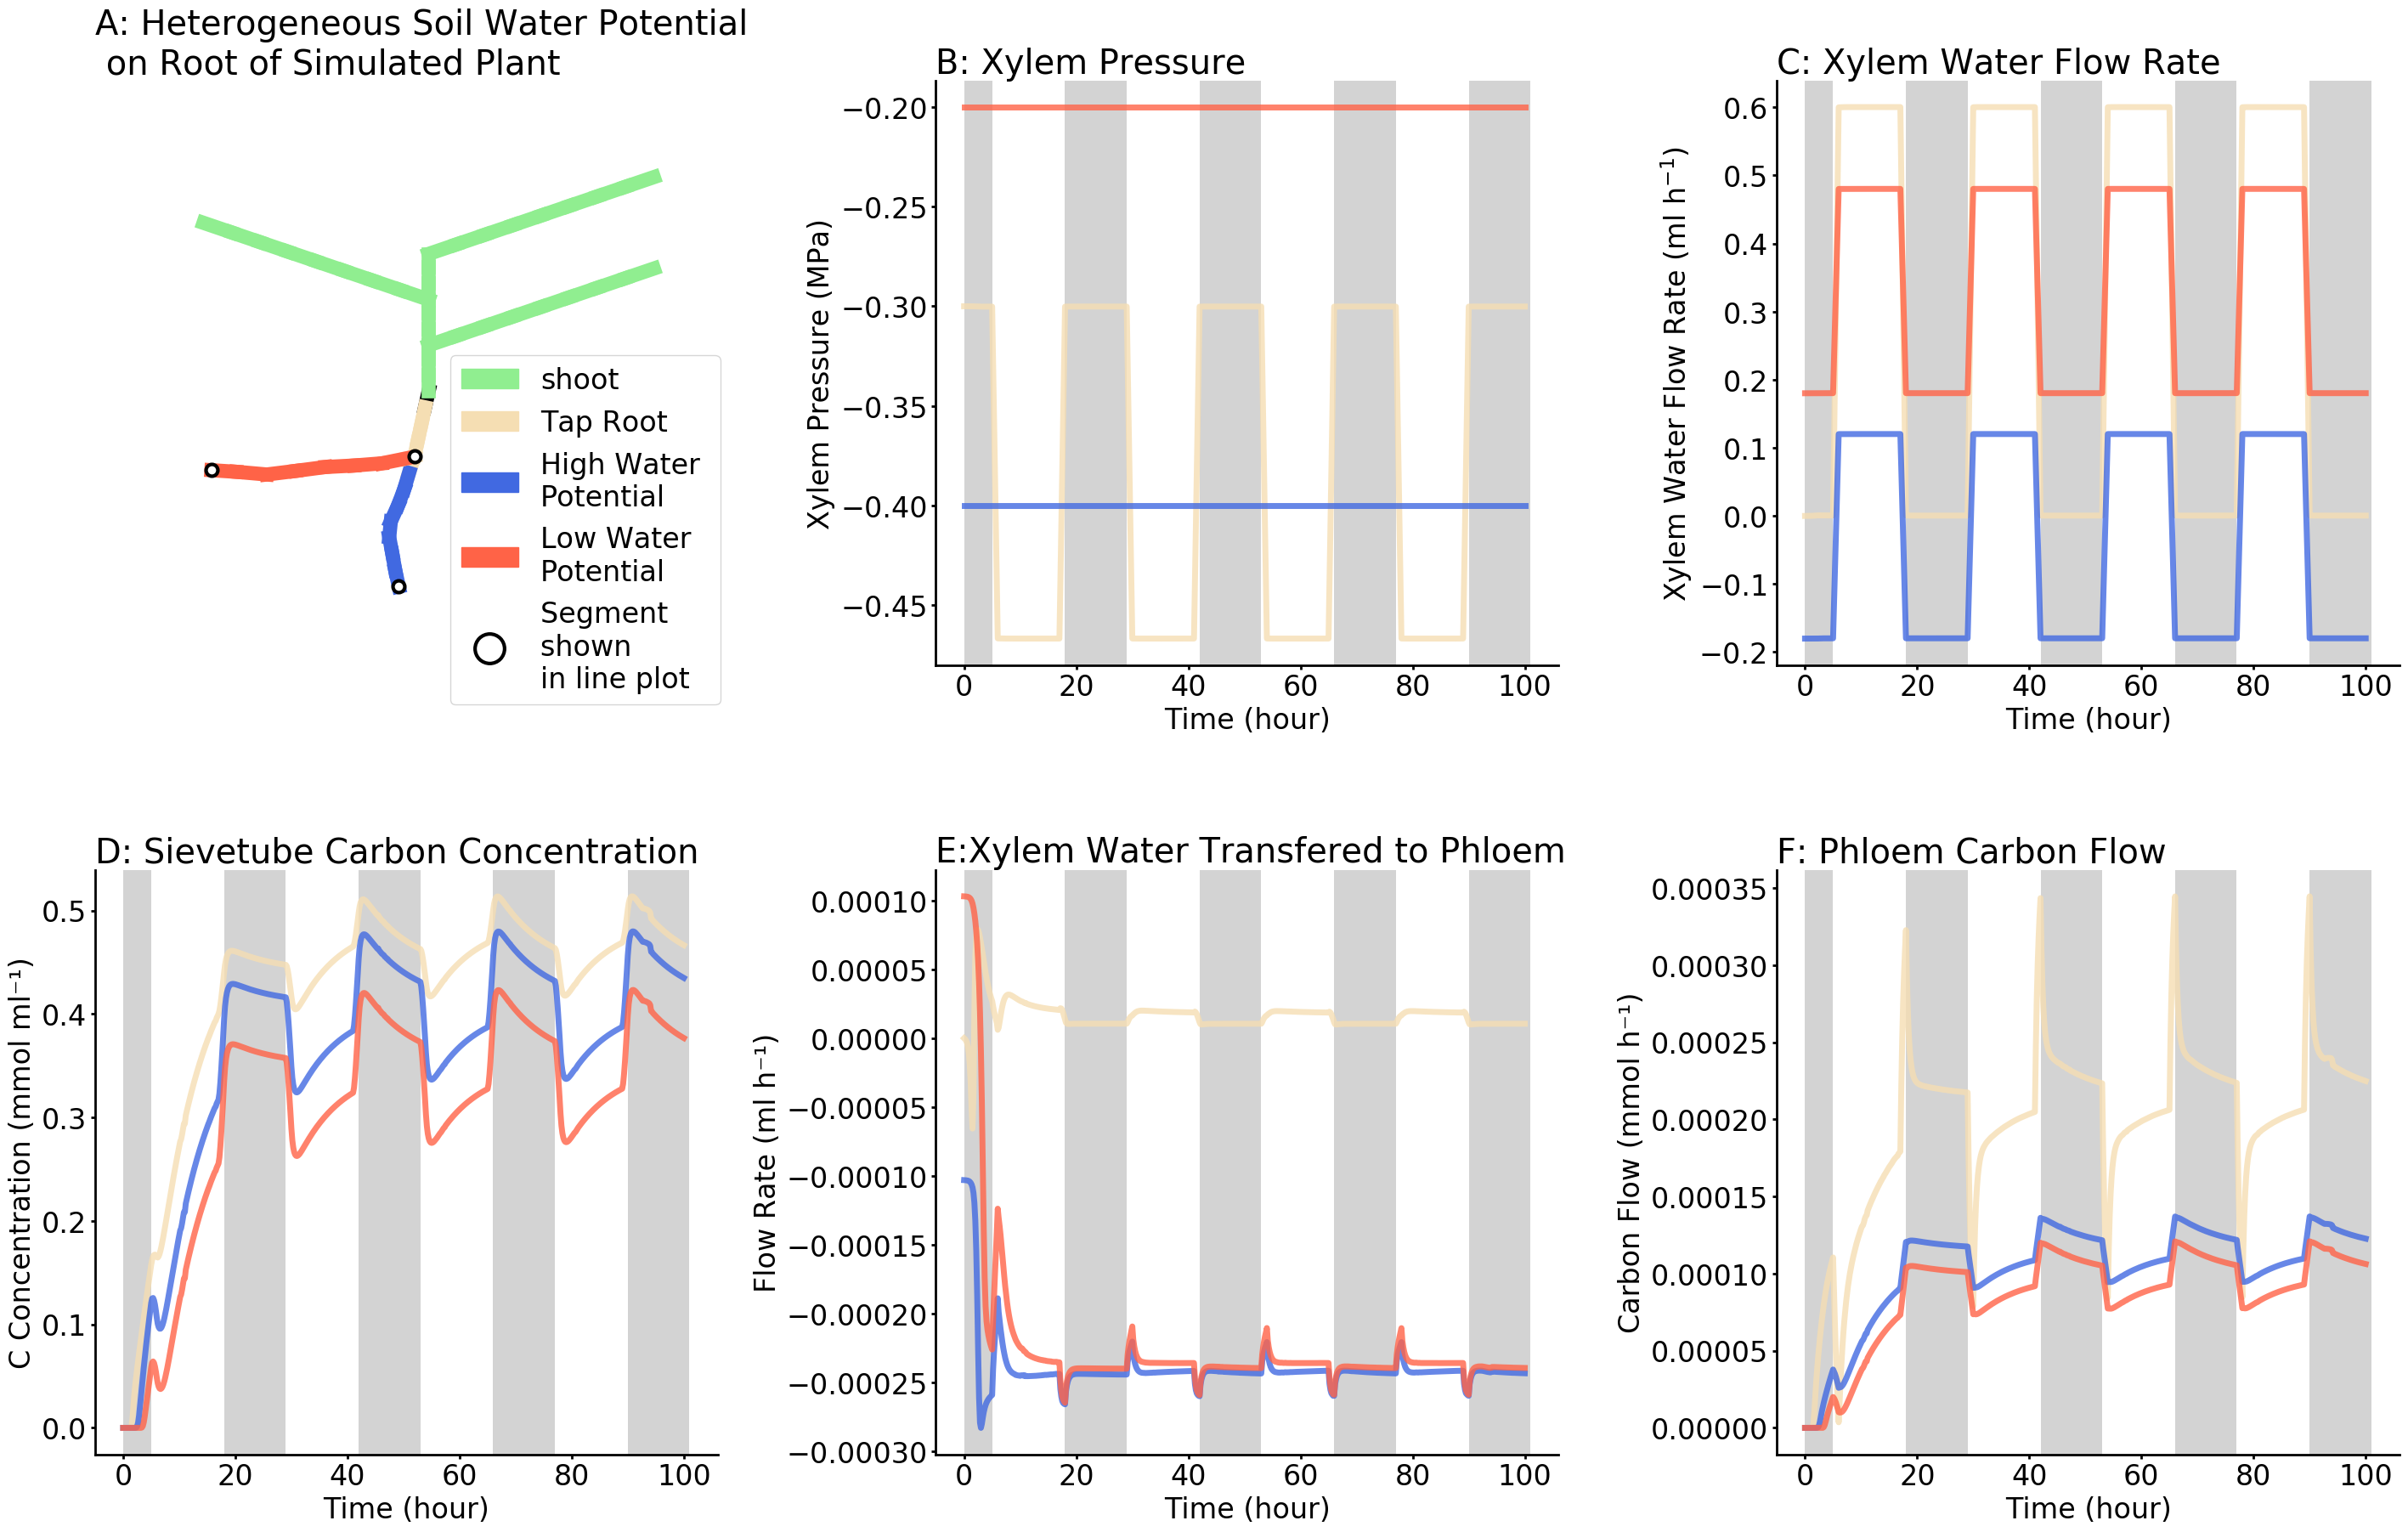

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
def zorder(i):
    return 0
    
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'

ouput = output
#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
high_root =[6,7,8,9,10,11,12]
root1 =[4]
high_root1 =[6]
high_root2 =[11]
high_root3 =[12]
high_root4 =[13]
h_r_c=[19]
l_r_c=[11]
low_root =[14,15,16,17,18,19,20]
low_root1 =[14]
low_root2 =[19]
low_root3 =[20]
low_root4 =[21]
all_mark = [4,12,20]

time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in low_root3: #int is sink
        return 'tomato'
    elif int in high_root3: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
    
x= np.array(output.iloc[:,0])
def organ_color_c(int):
    
    if int in np.where(node_connection[:,0] == 13)[0]: #int is sink
        return 'orange'
    elif int in np.where(node_connection[:,0] == 21)[0]: #int is sink
        return 'blue'
    elif int in np.where(node_connection[:,0] == 4)[0]: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    elif int in leaf_nodes: #int is source 
        return "None"#'lightgreen'
    else:
        return "None"#'black'    

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [35, 21]



f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)






ax = plt.subplot(232)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Xylem Pressure (MPa)')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
s =output.columns[n_begin]
s = s.replace('/', '')
plt.title('B: Xylem Pressure'.format(s),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x,P_Xyl.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=0.5, ls = line_style(node_connection[i,0]))
# ax.set_ylim(bottom=-0.001)

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=3, borderaxespad=0.)

add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(233)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow Rate (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow Rate".format(i ,output.columns[n_begin]) ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=0.8, ls = line_style(node_connection[i,0]))
    

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()

# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)

# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.0, 0.5), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0., prop={'size': 30})








ax = plt.subplot(234)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})

plt.ylabel('C Concentration (mmol ml⁻¹)'.format(s))

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Sievetube Carbon Concentration'.format(s),loc="left")  
for i in all_mark:
        ax.plot(x,C_ST.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=4, borderaxespad=0.)



ax = plt.subplot(235)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Rate (ml h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'royalblue'
    elif int in N1R_node[:,0]: #int is sink
        return 'tomato'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E:Xylem Water Transfered to Phloem'.format(s),loc="left")  
for i in all_mark:
        ax.plot(x,JW_Trsv.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



    
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)
add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
























ax = plt.subplot(236)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
y=JS_ST
plt.title('F: Phloem Carbon Flow', loc="left")  
for i in all_mark:
        ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')


ax = plt.subplot(231, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Soil Water Potential\n on Root of Simulated Plant',loc="left")
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):
    if int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    elif int in high_root2: #int is sink
        return 'tomato'
    elif int in low_root2: #int is sink
        return 'royalblue'
    elif int in high_root: #int is sink
        return 'tomato'
    elif int in low_root: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "lightgreen"#'darkgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in root1: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
    
    
for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x_c[node_connection[:,0][i]]][0],[x_c[node_connection[:,1][i]]][0]]), 
              np.array([[y_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,1][i]]][0]]), 
              np.array([[z_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-")
    if i == 5 or i== 21 or i == 13:
        ax.scatter(x_c[i], 
                y_c[i], 
                z_c[i], alpha=1, c="white", edgecolors="black", linewidth='3',  s=100) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='wheat', label='Tap Root')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='shoot')
h_r_patch = mpatches.Patch(color='royalblue', label='High Water \nPotential')
l_r_patch = mpatches.Patch(color='tomato', label='Low Water \nPotential')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water \nPotential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment \nshown \nin line plot')
plt.rcParams.update({'font.size':24})
plt.legend(handles=[leaf_patch,  root_patch, 
                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(0.57, 0.53), loc=2, borderaxespad=0.)
ax.view_init(0, 270)



#s =output2.columns[n_begin]
#s = s.replace('/', '')
f.savefig("diural_root.pdf", bbox_inches='tight')


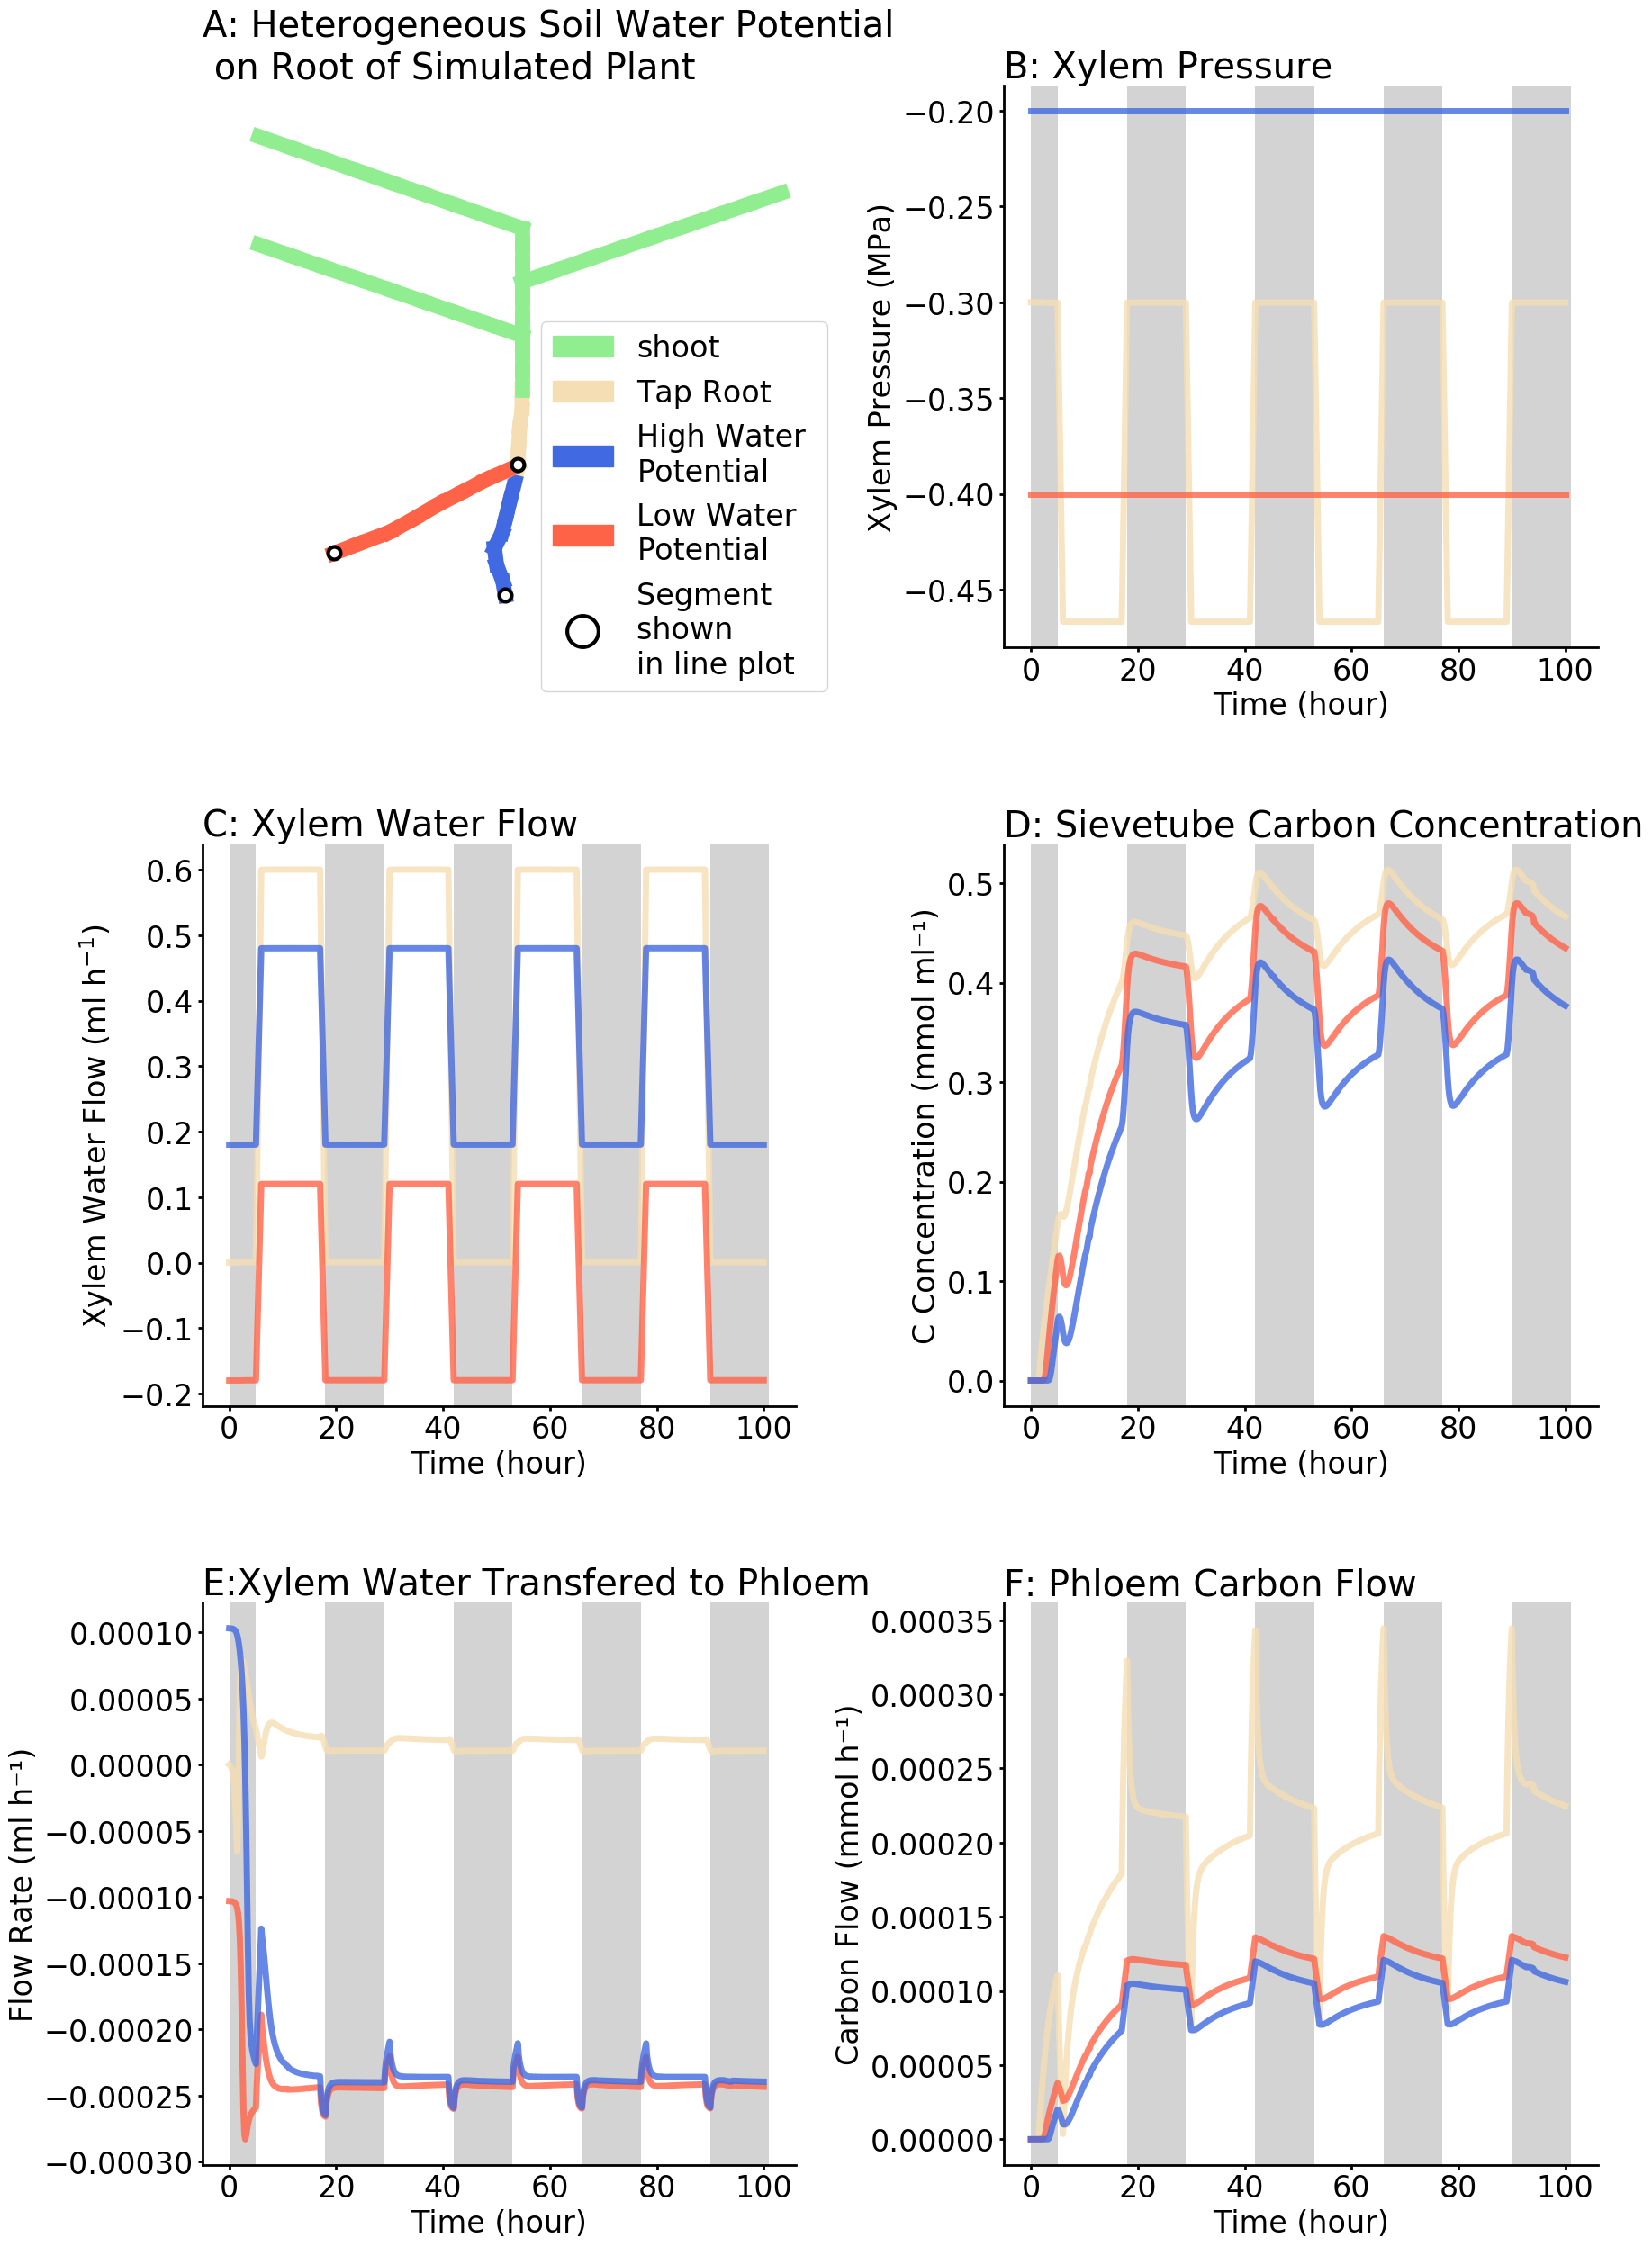

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
def zorder(i):
    return 0
x = np.array(output.iloc[:,0])    
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'

ouput = output
#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
high_root =[6,7,8,9,10,11,12]
root1 =[4]
high_root1 =[6]
high_root2 =[11]
high_root3 =[12]
high_root4 =[13]
h_r_c=[19]
l_r_c=[11]
low_root =[14,15,16,17,18,19,20]
low_root1 =[14]
low_root2 =[19]
low_root3 =[20]
low_root4 =[21]
all_mark = [4,12,20]

time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in high_root3: #int is sink
        return 'tomato'
    elif int in low_root3: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
    

def organ_color_c(int):
    
    if int in np.where(node_connection[:,0] == 12)[0]: #int is sink
        return 'orange'
    elif int in np.where(node_connection[:,0] == 20)[0]: #int is sink
        return 'blue'
    elif int in np.where(node_connection[:,0] == 4)[0]: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    elif int in leaf_nodes: #int is source 
        return "None"#'lightgreen'
    else:
        return "None"#'black'    

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 30]



f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)






ax = plt.subplot(322)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Xylem Pressure (MPa)')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
s =output.columns[n_begin]
s = s.replace('/', '')
plt.title('B: Xylem Pressure'.format(s),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x,P_Xyl.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=0.5, ls = line_style(node_connection[i,0]))
# ax.set_ylim(bottom=-0.001)

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=3, borderaxespad=0.)

add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(323)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow".format(i ,output.columns[n_begin]) ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=0.8, ls = line_style(node_connection[i,0]))
    

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()

# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)

# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.0, 0.5), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0., prop={'size': 30})








ax = plt.subplot(324)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})

plt.ylabel('C Concentration (mmol ml⁻¹)'.format(s))

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Sievetube Carbon Concentration'.format(s),loc="left")  
for i in all_mark:
        ax.plot(x,C_ST.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=4, borderaxespad=0.)



ax = plt.subplot(325)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Rate (ml h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'royalblue'
    elif int in N1R_node[:,0]: #int is sink
        return 'tomato'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E:Xylem Water Transfered to Phloem'.format(s),loc="left")  
for i in all_mark:
        ax.plot(x,JW_Trsv.T[i], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



    
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)
add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
























ax = plt.subplot(326)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
y=JS_ST
plt.title('F: Phloem Carbon Flow', loc="left")  
for i in all_mark:
        ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(i),alpha=0.8,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')


ax = plt.subplot(321, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Soil Water Potential\n on Root of Simulated Plant',loc="left")
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):
    if int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    elif int in high_root2: #int is sink
        return 'tomato'
    elif int in low_root2: #int is sink
        return 'royalblue'
    elif int in high_root: #int is sink
        return 'tomato'
    elif int in low_root: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "lightgreen"#'darkgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in root1: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
    
    
for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x_c[node_connection[:,0][i]]][0],[x_c[node_connection[:,1][i]]][0]]), 
              np.array([[y_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,1][i]]][0]]), 
              np.array([[z_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-")
    if i == 5 or i== 21 or i == 13:
        ax.scatter(x_c[i], 
                y_c[i], 
                z_c[i], alpha=1, c="white", edgecolors="black", linewidth='3',  s=100) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='wheat', label='Tap Root')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='shoot')
h_r_patch = mpatches.Patch(color='royalblue', label='High Water \nPotential')
l_r_patch = mpatches.Patch(color='tomato', label='Low Water \nPotential')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water \nPotential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment \nshown \nin line plot')
plt.rcParams.update({'font.size':24})
plt.legend(handles=[leaf_patch,  root_patch, 
                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(0.57, 0.58), loc=2, borderaxespad=0.)
ax.view_init(0, 85)



#s =output2.columns[n_begin]
#s = s.replace('/', '')
f.savefig("diural_root.jpg", bbox_inches='tight', ppi = 600)


In [193]:
JW_Xyl[5]

array([ 1.08734e-04,  5.82413e-05,  2.58622e-05,  6.04939e-06,
       -2.32482e-06, -9.40022e-06, -1.40864e-05, -1.72008e-05,
       -1.92868e-05, -2.07085e-05, -2.17137e-05, -2.24779e-05,
       -2.32482e-06, -9.40022e-06, -1.40864e-05, -1.72008e-05,
       -1.92868e-05, -2.07085e-05, -2.17137e-05, -2.24779e-05,
        1.84671e-04,  2.88043e-04,  3.95266e-04, -1.53387e-04,
        5.25463e-05,  2.51666e-04, -1.72650e-04,  6.57150e-05,
        2.99753e-04,  6.09122e-04,  6.36985e-04,  6.39928e-04,
        6.30614e-04,  6.15175e-04,  5.92414e-04,  5.49983e-04,
        4.38502e-04,  5.35273e-04,  5.91562e-04,  6.10511e-04,
        6.10964e-04,  6.01969e-04,  5.83742e-04,  5.44740e-04,
        4.36112e-04,  4.62678e-04,  5.47382e-04,  5.81937e-04,
        5.91834e-04,  5.89074e-04,  5.75248e-04,  5.39589e-04])

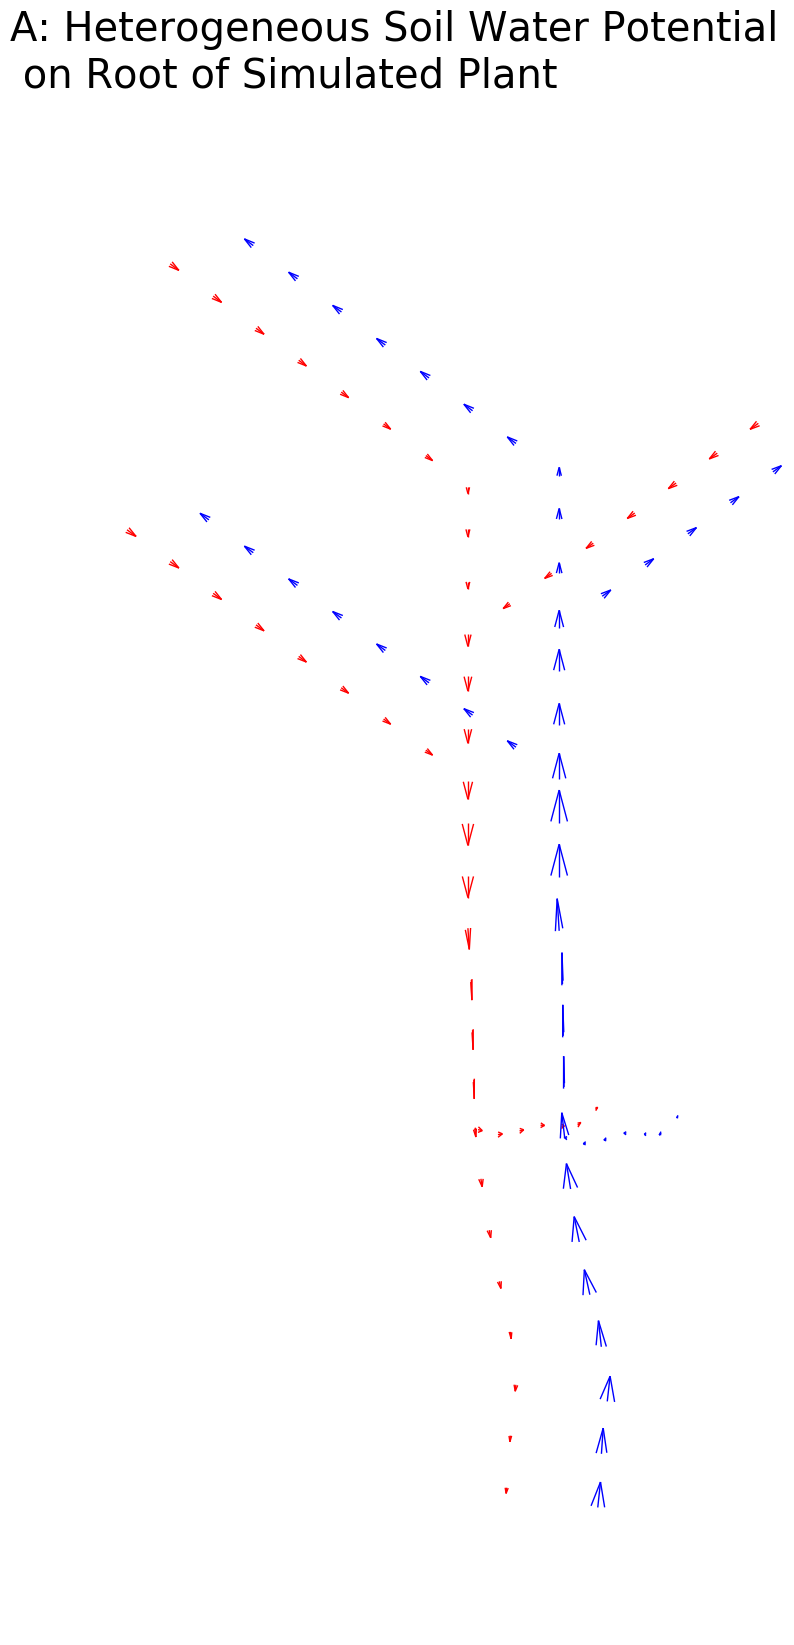

In [92]:
plt.rcParams['figure.figsize'] = [10, 20]
f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)


ax = plt.subplot(111, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Soil Water Potential\n on Root of Simulated Plant',loc="left")
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):
    if int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    elif int in high_root2: #int is sink
        return 'tomato'
    elif int in low_root2: #int is sink
        return 'royalblue'
    elif int in high_root: #int is sink
        return 'tomato'
    elif int in low_root: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'wheat'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "lightgreen"#'darkgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in root1: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
quiver_x=np.zeros(len(node_connection))
quiver_y=np.zeros(len(node_connection))
quiver_z=np.zeros(len(node_connection))
for i in range(0,len(node_connection)):
    quiver_x[i] = [x_c[node_connection[:,1][i]]][0]- [x_c[node_connection[:,0][i]]][0]
    quiver_y[i] = [y_c[node_connection[:,1][i]]][0]- [y_c[node_connection[:,0][i]]][0]
    quiver_z[i] = [z_c[node_connection[:,1][i]]][0]- [z_c[node_connection[:,0][i]]][0]

w_x=x_c-0.3
w_y=y_c-0.3
w_z=z_c
        
wq_x=np.zeros(len(node_connection))
wq_y=np.zeros(len(node_connection))
wq_z=np.zeros(len(node_connection))
for i in range(0,len(node_connection)):
    wq_x[i] = [w_x[node_connection[:,1][i]]][0]- [w_x[node_connection[:,0][i]]][0]
    wq_y[i] = [w_y[node_connection[:,1][i]]][0]- [w_y[node_connection[:,0][i]]][0]
    wq_z[i] = [w_z[node_connection[:,1][i]]][0]- [w_z[node_connection[:,0][i]]][0]
    
# trq_x=np.zeros(len(node_connection))
# trq_y=np.zeros(len(node_connection))
# trq_z=np.zeros(len(node_connection))
# for i in range(0,len(node_connection)):
#     trq_z[i]= x_c[i] - w_x
#def arrow_length(i):
    
# for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
for i in range(0,len(node_connection)-1):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.quiver( [x_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,0][i]]][0],
              quiver_x[i], quiver_y[i], quiver_z[i],
                color='red', alpha=1, length=JS_ST[60][i]*3000,arrow_length_ratio = 1,lw=1)
    ax.quiver( [w_x[node_connection[:,0][i]]][0],[w_y[node_connection[:,0][i]]][0],[w_z[node_connection[:,0][i]]][0],
              wq_x[i], wq_y[i], wq_z[i],
                color='blue', alpha=1, length=-JW_Xyl[60][i],arrow_length_ratio = 1,lw=1)

# for i in range(0,len(node_connection)):
#     if i== 21 or i == 13:
#         ax.quiver([x_c[i],y_c[i],z_c[i], 0.3, 0.3, 0, color='blue', alpha=1, length=-JW_Trsv[25][i]*3000,arrow_length_ratio = 1)

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 7.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='wheat', label='Tap Root')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='shoot')
h_r_patch = mpatches.Patch(color='royalblue', label='High Water \nPotential')
l_r_patch = mpatches.Patch(color='tomato', label='Low Water \nPotential')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water \nPotential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment \nshown \nin line plot')
plt.rcParams.update({'font.size':24})
#plt.legend(handles=[leaf_patch,  root_patch, 
#                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(0.57, 0.58), loc=2, borderaxespad=0.)
ax.view_init(0, 80)



#s =output2.columns[n_begin]
#s = s.replace('/', '')
f.savefig("diural_root.pdf", bbox_inches='tight')

In [ ]:
at Nr. 1729 we can find Q_ST (mmol)[ 1]

In [124]:
for i in [13, 15,19, 23 ]:
    

    f = plt.figure()
    f.subplots_adjust(hspace=0.5)

    n_begin = (len(node_connection)+1)*i+1
   # n_begin = (len(node_connection))*i-22
    n_end = n_begin +(len(node_connection)-1)
    var_all = np.array(output2.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    ax = plt.subplot(111)
    ax.tick_params(width=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2)
    #ax = f.gca(projection='3d')
    
    plt.rcParams.update({'font.size': 24})
    plt.xlabel("Time (hour)")
    #plt.ylabel('Phloem pressure Flow (ml h$^{-1}$)', color='tomato')
    #plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
    #plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    s =output.columns[n_begin]
    s = s.replace('/', '')
    plt.title(' {}'.format(s), color='tomato',loc="right")
    #plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
    for i in range(len(node_connection)-1):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(i),alpha=0.5,zorder=0.5, ls = line_style(node_connection[i,0]))

    #plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    #plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 24})


    add_day_night()


    root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                              markersize=30, label='Tap root')
    plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
    #plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})

    plt.show()


NameError: name 'output2' is not defined

<Figure size 1000x2000 with 0 Axes>

In [ ]:
P_Xyl.T[52]

In [8]:
path = 'PMA_leaf_output.txt'
output = pd.read_table(path,sep='\t',header=1)

x = np.array(output.iloc[:,0])
##################### Segment Values ##################### 

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Trsv (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Trsv = np.array(output.iloc[:,n_begin:n_end])

# water exchange between xylem and phloem from output of PiafMunch
n_begin = output.columns.get_loc("JW_Apo (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
JW_Apo = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in xylem from output of PiafMunch
n_begin = output.columns.get_loc("P_Xyl (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Hydraulic pressure in sievetubes from output of PiafMunch
n_begin = output.columns.get_loc("P_ST (MPa)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
P_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("Q_ST (mmol)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
Q_ST = np.array(output.iloc[:,n_begin:n_end])

# Carbon content in the segment from output of PiafMunch
n_begin = output.columns.get_loc("C_ST (mmol / ml)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)+1
print('the end is',output.columns[n_end])
C_ST = np.array(output.iloc[:,n_begin:n_end])

##################### Connection Values ##################### 

# Xylem water flow JW_Xyl from output of PiafMunch
n_begin = output.columns.get_loc("JW_Xyl (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_Xyl = np.array(output.iloc[:,n_begin:n_end])

# Phloem water flow JW_ST from output of PiafMunch
n_begin = output.columns.get_loc("JW_ST (ml / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JW_ST = np.array(output.iloc[:,n_begin:n_end])


# Phloem carbon flow JS_ST from output of PiafMunch
n_begin = output.columns.get_loc("JS_ST (mmol / h)[{first: >{width}}]".format(first='1', width=len(str(len(node_connection)))))
print('at Nr.',n_begin, 'we can find',output.columns[n_begin])
n_end = n_begin + len(node_connection)-1
print('the end is',output.columns[n_end])
JS_ST = np.array(output.iloc[:,n_begin:n_end])





/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

read_table is deprecated, use read_csv instead.



at Nr. 703 we can find JW_Trsv (ml / h)[ 1]
the end is P_PhlApo (MPa)[ 1]
at Nr. 541 we can find JW_Apo (ml / h)[ 1]
the end is JW_ParMb (ml / h)[ 1]
at Nr. 1027 we can find P_Xyl (MPa)[ 1]
the end is PsiSoil (MPa)[ 1]
at Nr. 811 we can find P_ST (MPa)[ 1]
the end is P_ST_dot (MPa / h)[ 1]
at Nr. 1729 we can find Q_ST (mmol)[ 1]
the end is Q_ParApo (mmol)[ 1]
at Nr. 163 we can find C_ST (mmol / ml)[ 1]
the end is C_Sympl (mmol / ml)[ 1]
at Nr. 1996 we can find JW_Xyl (ml / h)[ 1]
the end is JW_Xyl (ml / h)[53] 
at Nr. 1890 we can find JW_ST (ml / h)[ 1]
the end is JW_ST (ml / h)[53]
at Nr. 1837 we can find JS_ST (mmol / h)[ 1]
the end is JS_ST (mmol / h)[53]


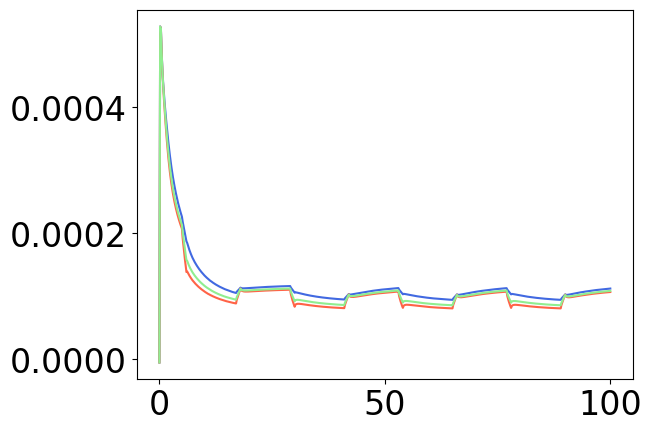

In [284]:
plt.plot(x,JW_Trsv.T[31],c=organ_color(31))
plt.plot(x,JW_Trsv.T[53],c=organ_color(53))
plt.plot(x,JW_Trsv.T[42],c=organ_color(42))

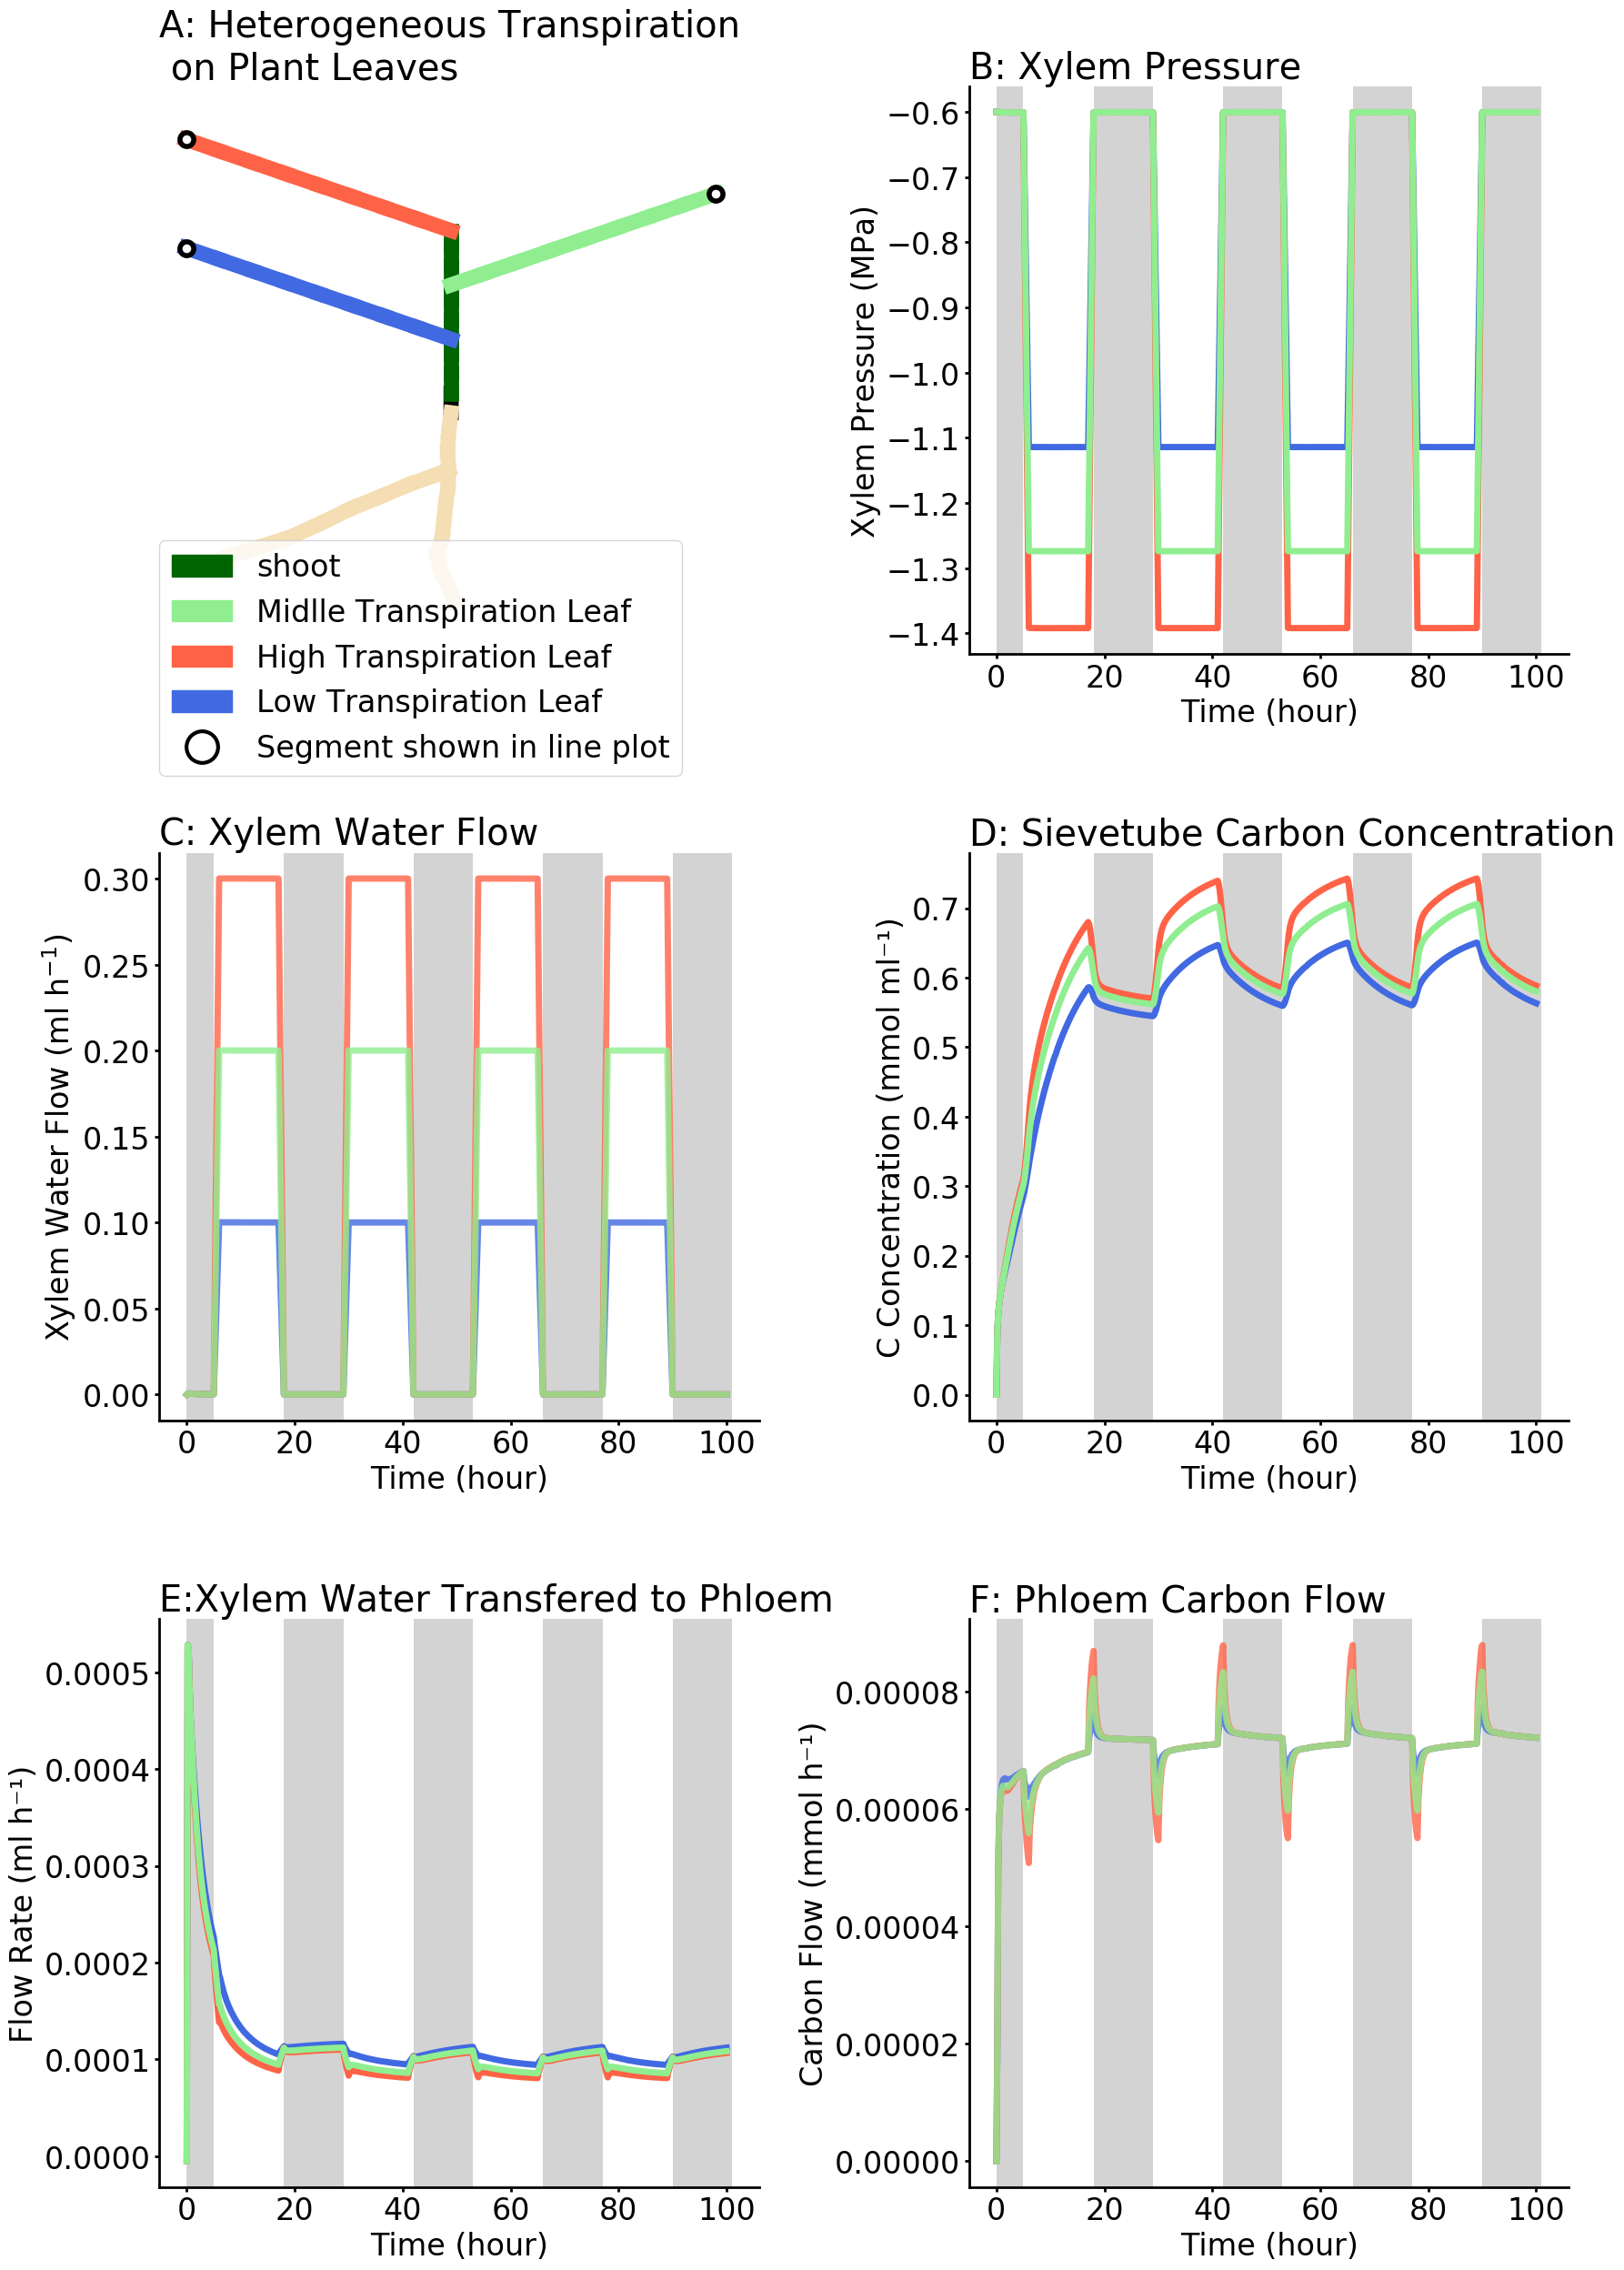

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return '-'
    else: #
        return '-'


#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
high_leaf =[47,48,49,50,51,52,53,54]
leaf1 =[42]
high_leaf1 =[51]
high_leaf2 =[52]
high_leaf3 =[53]
high_leaf4 =[54]
h_l_c=[19]
l_l_c=[11]
low_leaf =[25,26,27,28,29,30,31,32]
low_leaf1 =[29]
low_leaf2 =[30]
low_leaf3 =[31]
low_leaf4 =[32]
all_mark = [31,53,42]
time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in root_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in high_leaf3: #int is sink
        return 'tomato'
    elif int in low_leaf3: #int is sink
        return 'royalblue'
    elif int == 46: #int is sink
        return 'darkgreen'
    elif int in leaf1: #int is sink
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
  
    

#pd.read_table(path,sep='\t')


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 30]

import numpy as np


f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)





ax = plt.subplot(322)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Xylem Pressure (MPa)')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
s =output.columns[n_begin]
s = s.replace('/', '')
plt.title('B: Xylem Pressure'.format(s),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
ax.plot(x,P_Xyl.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,P_Xyl.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,P_Xyl.T[42],c=organ_color(42),linewidth=5)
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)

add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(323)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow".format(i ,output.columns[n_begin]) ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x ,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,c=organ_color(i),alpha=0.8,zorder=0.8)
    

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()

# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)



ax = plt.subplot(324)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})

plt.ylabel('C Concentration (mmol ml⁻¹)'.format(s))

    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Sievetube Carbon Concentration'.format(s),loc="left")  
ax.plot(x,C_ST.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,C_ST.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,C_ST.T[42],c=organ_color(42),linewidth=5)

add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=4, borderaxespad=0.)



ax = plt.subplot(325)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Rate (ml h⁻¹)')


    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E:Xylem Water Transfered to Phloem'.format(s),loc="left")  
ax.plot(x,JW_Trsv.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,JW_Trsv.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,JW_Trsv.T[42],c=organ_color(42),linewidth=5)



    
# plt.legend(handles=[ root_patch,                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)
add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
























ax = plt.subplot(326)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
y=JS_ST
plt.title('F: Phloem Carbon Flow', loc="left")  
for i in all_mark:
        ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5 ,c=organ_color(i),alpha=0.8)
        
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')

#pd.read_table(path,sep='\t')

plt.rcParams.update({'font.size': 24})
i=37

ax = plt.subplot(321, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Transpiration\n on Plant Leaves',loc="left")
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):

    if int in high_leaf: #int is sink
        return 'tomato'
    
    elif int in low_leaf: #int is sink
        return 'royalblue'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes or int ==46:
        return "darkgreen"#'darkgreen'
    elif int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in all_mark: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
    
    
for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x_c[node_connection[:,0][i]]][0],[x_c[node_connection[:,1][i]]][0]]), 
              np.array([[y_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,1][i]]][0]]), 
              np.array([[z_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-", zorder=0)
for i in range(0,len(node_connection)+1):
    if i == 31 or i== 42 or i == 53:
        ax.scatter(x_c[i+1], 
                y_c[i+1], 
                z_c[i+1], alpha=1, c="white", edgecolors="black", linewidth='4',  s=120,zorder=1) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='lightgreen', label='Midlle Transpiration Leaf')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='darkgreen', label='shoot')
h_r_patch = mpatches.Patch(color='tomato', label='High Transpiration Leaf')
l_r_patch = mpatches.Patch(color='royalblue', label='Low Transpiration Leaf')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water Potential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment shown in line plot')
plt.rcParams.update({'font.size':24})
plt.legend(handles=[leaf_patch,  root_patch, 
                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(-0, 0.2), loc=2, borderaxespad=0.)
ax.view_init(0, 90)




f.savefig("diural_leaf.jpg", bbox_inches='tight')



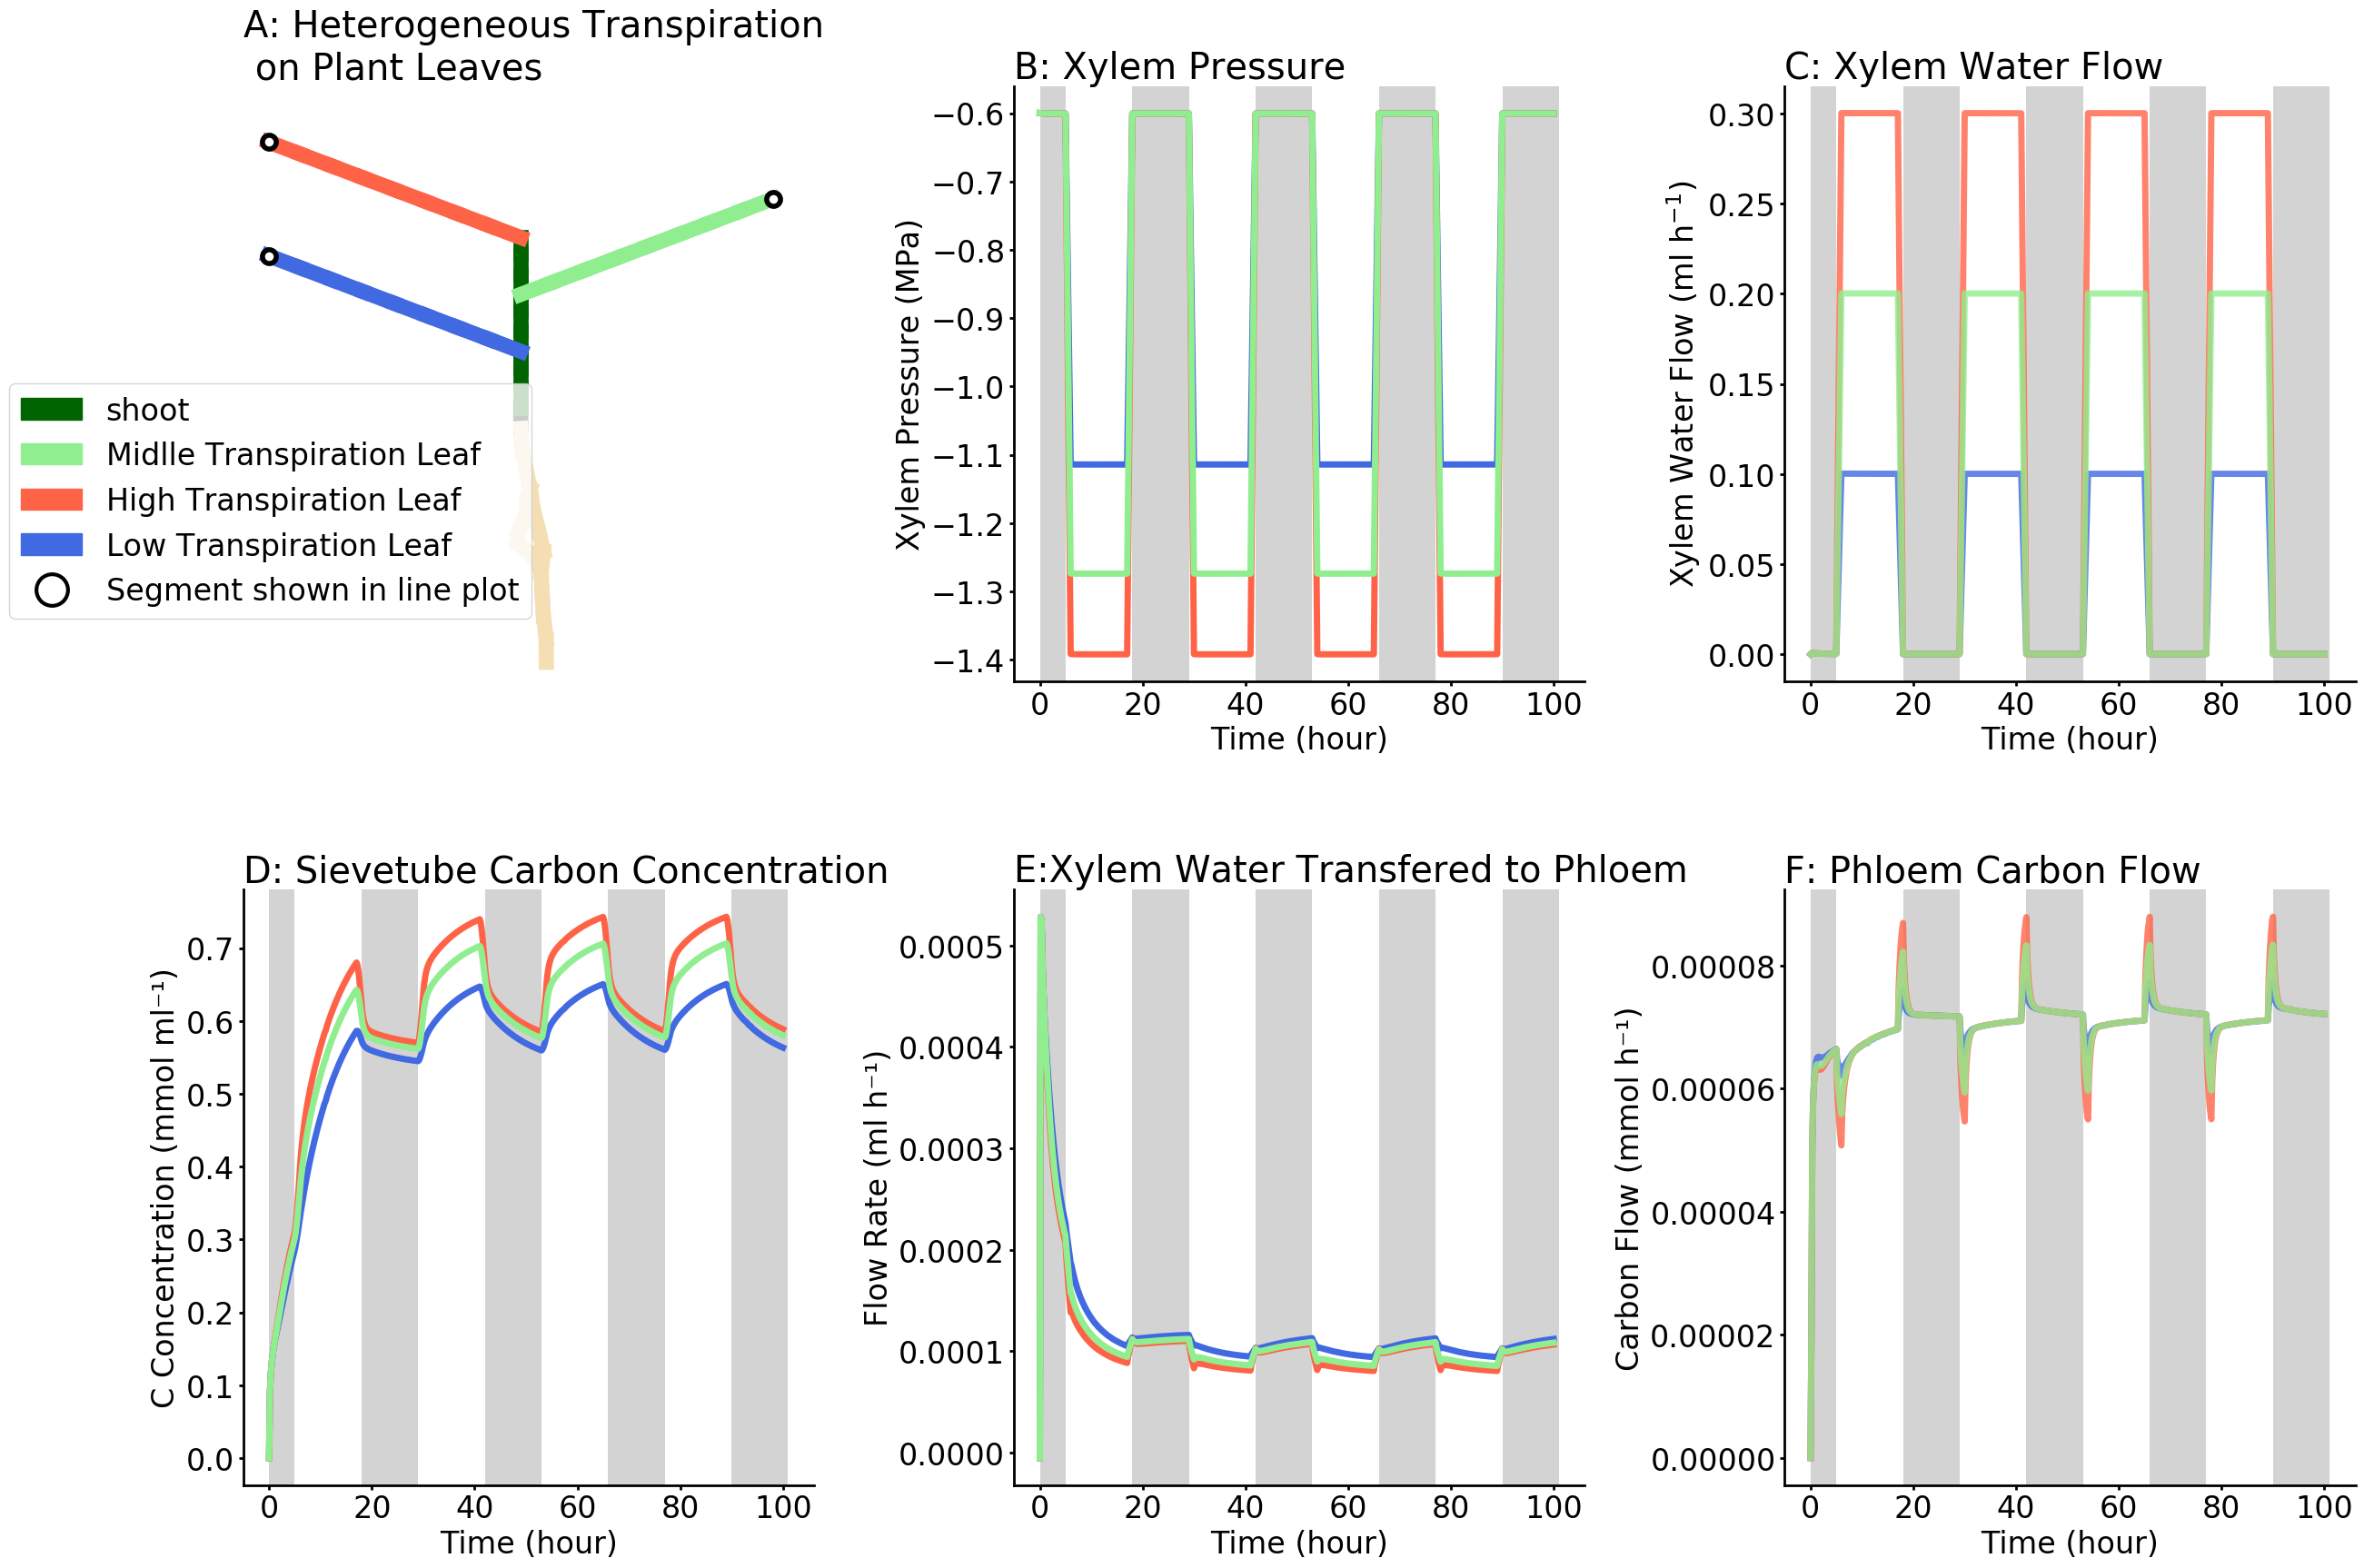

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  32<int<36 : #int is a small part of main stem which are shown in dashed line 
        return '-'
    else: #
        return '-'


#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
high_leaf =[47,48,49,50,51,52,53,54]
leaf1 =[42]
high_leaf1 =[51]
high_leaf2 =[52]
high_leaf3 =[53]
high_leaf4 =[54]
h_l_c=[19]
l_l_c=[11]
low_leaf =[25,26,27,28,29,30,31,32]
low_leaf1 =[29]
low_leaf2 =[30]
low_leaf3 =[31]
low_leaf4 =[32]
all_mark = [31,53,42]
time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in root_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in high_leaf3: #int is sink
        return 'tomato'
    elif int in low_leaf3: #int is sink
        return 'royalblue'
    elif int in leaf1: #int is sink
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
  
    

#pd.read_table(path,sep='\t')


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [30, 20]

import numpy as np


f = plt.figure()
f.subplots_adjust(hspace=0.35)
f.subplots_adjust(wspace=0.35)



ax = plt.subplot(231, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Heterogeneous Transpiration\n on Plant Leaves',loc="left")
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):

    if int in high_leaf: #int is sink
        return 'tomato'
    
    elif int in low_leaf: #int is sink
        return 'royalblue'
    elif int in stem_nodes or int ==46:
        return "darkgreen"#'darkgreen'
    elif int in leaf1: #int is sink
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "darkgreen"#'darkgreen'
    elif int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    else:
        return "black"#'black'
    
def organ_marker3d(int):
    if int in all_mark: #int is source 
        return "o"#'lightgreen'
    else:
        return "None"#'black'
    
    
for i in range(0,len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x_c[node_connection[:,0][i]]][0],[x_c[node_connection[:,1][i]]][0]]), 
              np.array([[y_c[node_connection[:,0][i]]][0],[y_c[node_connection[:,1][i]]][0]]), 
              np.array([[z_c[node_connection[:,0][i]]][0],[z_c[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-", zorder=0)
for i in range(0,len(node_connection)+1):
    if i == 31 or i== 42 or i == 53:
        ax.scatter(x_c[i+1], 
                y_c[i+1], 
                z_c[i+1], alpha=1, c="white", edgecolors="black", linewidth='4',  s=120,zorder=1) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='lightgreen', label='Midlle Transpiration Leaf')
#root_patch1 = mpatches.Patch(color='tomato', label='Tap Root in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
#stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='darkgreen', label='shoot')
h_r_patch = mpatches.Patch(color='tomato', label='High Transpiration Leaf')
l_r_patch = mpatches.Patch(color='royalblue', label='Low Transpiration Leaf')
l_r_patch1 = mpatches.Patch(color='blue', label='Low Water Potential Root Segment \nin Line Plot')
h_r_patch1 = mpatches.Patch(color='orange', label='High Water Potential Root Segment \nin Line Plot')
line_chart = mlines.Line2D([], [], color='white', marker='o', linestyle='-', markeredgewidth = 3, markeredgecolor = 'black',
                          markersize=25, label='Segment shown in line plot')
plt.rcParams.update({'font.size':24})
plt.legend(handles=[leaf_patch,  root_patch, 
                    h_r_patch, l_r_patch, line_chart],bbox_to_anchor=(-0.41, 0.5), loc=2, borderaxespad=0.)
ax.view_init(0, 90)

ax = plt.subplot(232)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Xylem Pressure (MPa)')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
s =output.columns[n_begin]
s = s.replace('/', '')
plt.title('B: Xylem Pressure'.format(s),loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
ax.plot(x,P_Xyl.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,P_Xyl.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,P_Xyl.T[42],c=organ_color(42),linewidth=5)
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)

add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(233)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)")
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow".format(i ,output.columns[n_begin]) ,loc="left")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in all_mark:
    ax.plot(x ,JW_Xyl.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5,c=organ_color(i),alpha=0.8,zorder=0.8)
    

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()

# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)



ax = plt.subplot(234)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})

plt.ylabel('C Concentration (mmol ml⁻¹)'.format(s))

    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Sievetube Carbon Concentration'.format(s),loc="left")  
ax.plot(x,C_ST.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,C_ST.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,C_ST.T[42],c=organ_color(42),linewidth=5)

add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch], loc=4, borderaxespad=0.)



ax = plt.subplot(235)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Rate (ml h⁻¹)')


    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E:Xylem Water Transfered to Phloem'.format(s),loc="left")  
ax.plot(x,JW_Trsv.T[31],c=organ_color(31),linewidth=5)
ax.plot(x,JW_Trsv.T[53],c=organ_color(53),linewidth=5)
ax.plot(x,JW_Trsv.T[42],c=organ_color(42),linewidth=5)



    
# plt.legend(handles=[ root_patch,                     h_r_patch, l_r_patch], loc=2, borderaxespad=0.)
add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
























ax = plt.subplot(236)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 
y=JS_ST
plt.title('F: Phloem Carbon Flow', loc="left")  
for i in all_mark:
        ax.plot(x,JS_ST.T[np.where(node_connection[:,0] == i)[0][0]], linewidth=5 ,c=organ_color(i),alpha=0.8)
        
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
# plt.legend(handles=[ root_patch, 
#                     h_r_patch, l_r_patch] ,loc=1, borderaxespad=0.)
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')

#pd.read_table(path,sep='\t')

plt.rcParams.update({'font.size': 24})
i=37






f.savefig("diural_leaf.png", bbox_inches='tight')



In [379]:
node_connection[53,0]

IndexError: index 53 is out of bounds for axis 0 with size 53

In [ ]:
N1R_node
print(N1R_c_nd)
print(N1R_conn)
node_connection

In [ ]:
i=37


ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection)+1)*15+1#15 is the pressure in ST
n_end = n_begin +(len(node_connection))
s =output.columns[n_begin]
print(s)

In [ ]:
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  30<int<40 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return "None"#'lightgreen'
    elif int in high_root2: #int is sink
        return 'orange'
    elif int in low_root2: #int is sink
        return 'blue'
    elif int in root1: #int is sink
        return 'red'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in stem_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
    
path = 'PMA_diurnal_hetero_output.txt'   
#path = 'PMA_output.txt'
#path = 'PMA_output.txt'

#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [10, 50]

import numpy as np


f = plt.figure()
f.subplots_adjust(hspace=0.3)
ax = plt.subplot(412)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*30+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)', color='tomato')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)


def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 

plt.title('B: Phloem Carbon Flow with Diurnal Transpiration \n and Heterogeneous Soil Water Potential', color='tomato', loc="right")  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
k=70
plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)


    
stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

plt.legend(handles=[leaf_line,stem_line, high_root_line, low_root_line],bbox_to_anchor=(0.2, 0.23), ncol=1, loc=2, borderaxespad=0., prop={'size': 18})

#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)

#plt.ylim((-0.001, 0.001))  



   



i=37

ax = plt.subplot(411)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*34-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)", color='royalblue')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("A: Xylem Water Flow with Diurnal Transpiration \n and Heterogeneous Soil Water Potential".format(i ,output.columns[n_begin]), color='royalblue' ,loc="right")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0, ls = line_style(node_connection[i,0]))

plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')




plt.legend(handles=[leaf_line, stem_line, high_root_line, low_root_line],bbox_to_anchor=(0.2, 0.75), loc=2, borderaxespad=0., prop={'size': 18} )
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0., prop={'size': 30})

plt.style.use('default')
#path = 'PMA_output.txt'
#pd.read_table(path,sep='\t')
output2 = pd.read_table(path,sep='\t',header=1)




plt.rcParams.update({'font.size': 24})
i=37

ax = plt.subplot(413)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*33-22 # previously -22
n_end = n_begin +(len(node_connection))
var_all = np.array(output2.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)", color='royalblue')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("C: Xylem Water Flow with Diurnal Transpiration".format(i ,output2.columns[n_begin]), color='royalblue',loc="right")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0, ls = line_style(node_connection[i,0]))

plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='22nd node')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='10th node')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', markeredgewidth = 1, markeredgecolor = 'black', linestyle='-',
                          markersize=16, label='49th node')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=16, label='Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=16, label='Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=16, label='Leaf')




plt.legend(handles=[leaf_line, stem_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.8), loc=2, borderaxespad=0., prop={'size': 24} )
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})





ax = plt.subplot(414)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*30+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output2.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Carbon Flow (mmol h⁻¹)', color='tomato')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('D: Phloem Carbon Flow with Diurnal Transpiration', color='tomato',loc="right")  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



    
stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')

#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
plt.legend(handles=[leaf_line,stem_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
















plt.show()
s =output2.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.pdf".format(s), bbox_inches='tight')



In [ ]:
np.transpose(y)[0]

In [ ]:
import matplotlib.transforms as mtransforms
import numpy as np
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 30})


def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18.5+24*i,29+24*i,facecolor='lightgrey',zorder=0)
   
    

f = plt.figure()
ax = plt.subplot(111)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*30+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)
plt.ylabel('Carbon Flow in Phloem (mmol h⁻¹)', **hfont)
#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'silver'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('Phloem Carbon Flow with Diurnal Transpiration')  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
        
add_day_night()
stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
root_line = mlines.Line2D([], [], color='wheat', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
plt.legend(handles=[leaf_line,stem_line, root_line],bbox_to_anchor=(0.19, 0.3), ncol=1, loc=2, borderaxespad=0.)

#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 20})
#plt.ylim((-0.001, 0.001))  
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')

In [ ]:
# 250 μmol m−2 s−1 at bench height 800 μmol m−2 s−1  Partial phenotypic reversion of ABA-deficient flacca tomato (Solanum lycopersicum) scions by a wild-type rootstock: normalizing shoot ethylene relations promotes leaf area but does not diminish whole plant transpiration rate 
#transpiration rate (from mmol/hour to umol/s to mg/s)
0.6 # mmol/hour
0.6 *1000 /3600 #0.17 umol/s
# assume it is in square meter
#gram per square meter per second (P) g m−2 s−1
#cubic meter per square meter per m3 m−2 s−1
# assume the plant have 75 cm^2 = 1/75/1e-6 m^2


0.17/1/75/1e-6 



In [ ]:
# unit conversion for xylem flow speed and transpiration rate

# xylem flow mg/s to ml/hour
0.4 #mg/s in literature 
0.4 /1e3*3600 # ml per hour




0.17*180 # 30.6 #assume all plant has 50 to 100 square cm^2

# xylem resistance https://www.ncbi.nlm.nih.gov/pubmed/15172841
#0.005 m^3 s^-1 MPa^-1 to # MPa h mL-1
1/(0.004*3600*1e6)


# other hydraulic conductivity unit: 
# hydraulic conductivity (units “m2 s^-1 Pa^-1  !!!probably a mistake!!!   Symbols, SI Units and Physical Quantities within the Scope of Sap Flow Studies
# hydraulic conductance (unit “m s-1 Pa-1”) 
# because  Jv is the volume flux density (unit ”m3 m-2 s-1”)

# cm3 d−1 ->conductance /// cm d^-1 is the conductivity Effect of Local Soil Hydraulic ConducƟ vity Drop Using a Three-Dimensional Root Water Uptake Model

#A New Simulation Framework for Soil–Root Interaction, Evaporation, Root Growth, and Solute Transport
# axial root conductance, m4 s−1 Pa−1
# radial root conductance, m s−1 Pa−1

#Leaf hydraulic conductance for a tank bromeliad: axial and radial pathways for moving and conserving water
# radial conductance; m3 m−2 MPa−1
# hydraulic conductance Kleaf (m3 mm−2 s−1 MPa−1

# Doussan et al.—Modelling of the Hydraulic Architecture of Root Systems
# root hydraulic conductivity Lp (m s−1 MPa−1) (Fiscus, 1975)





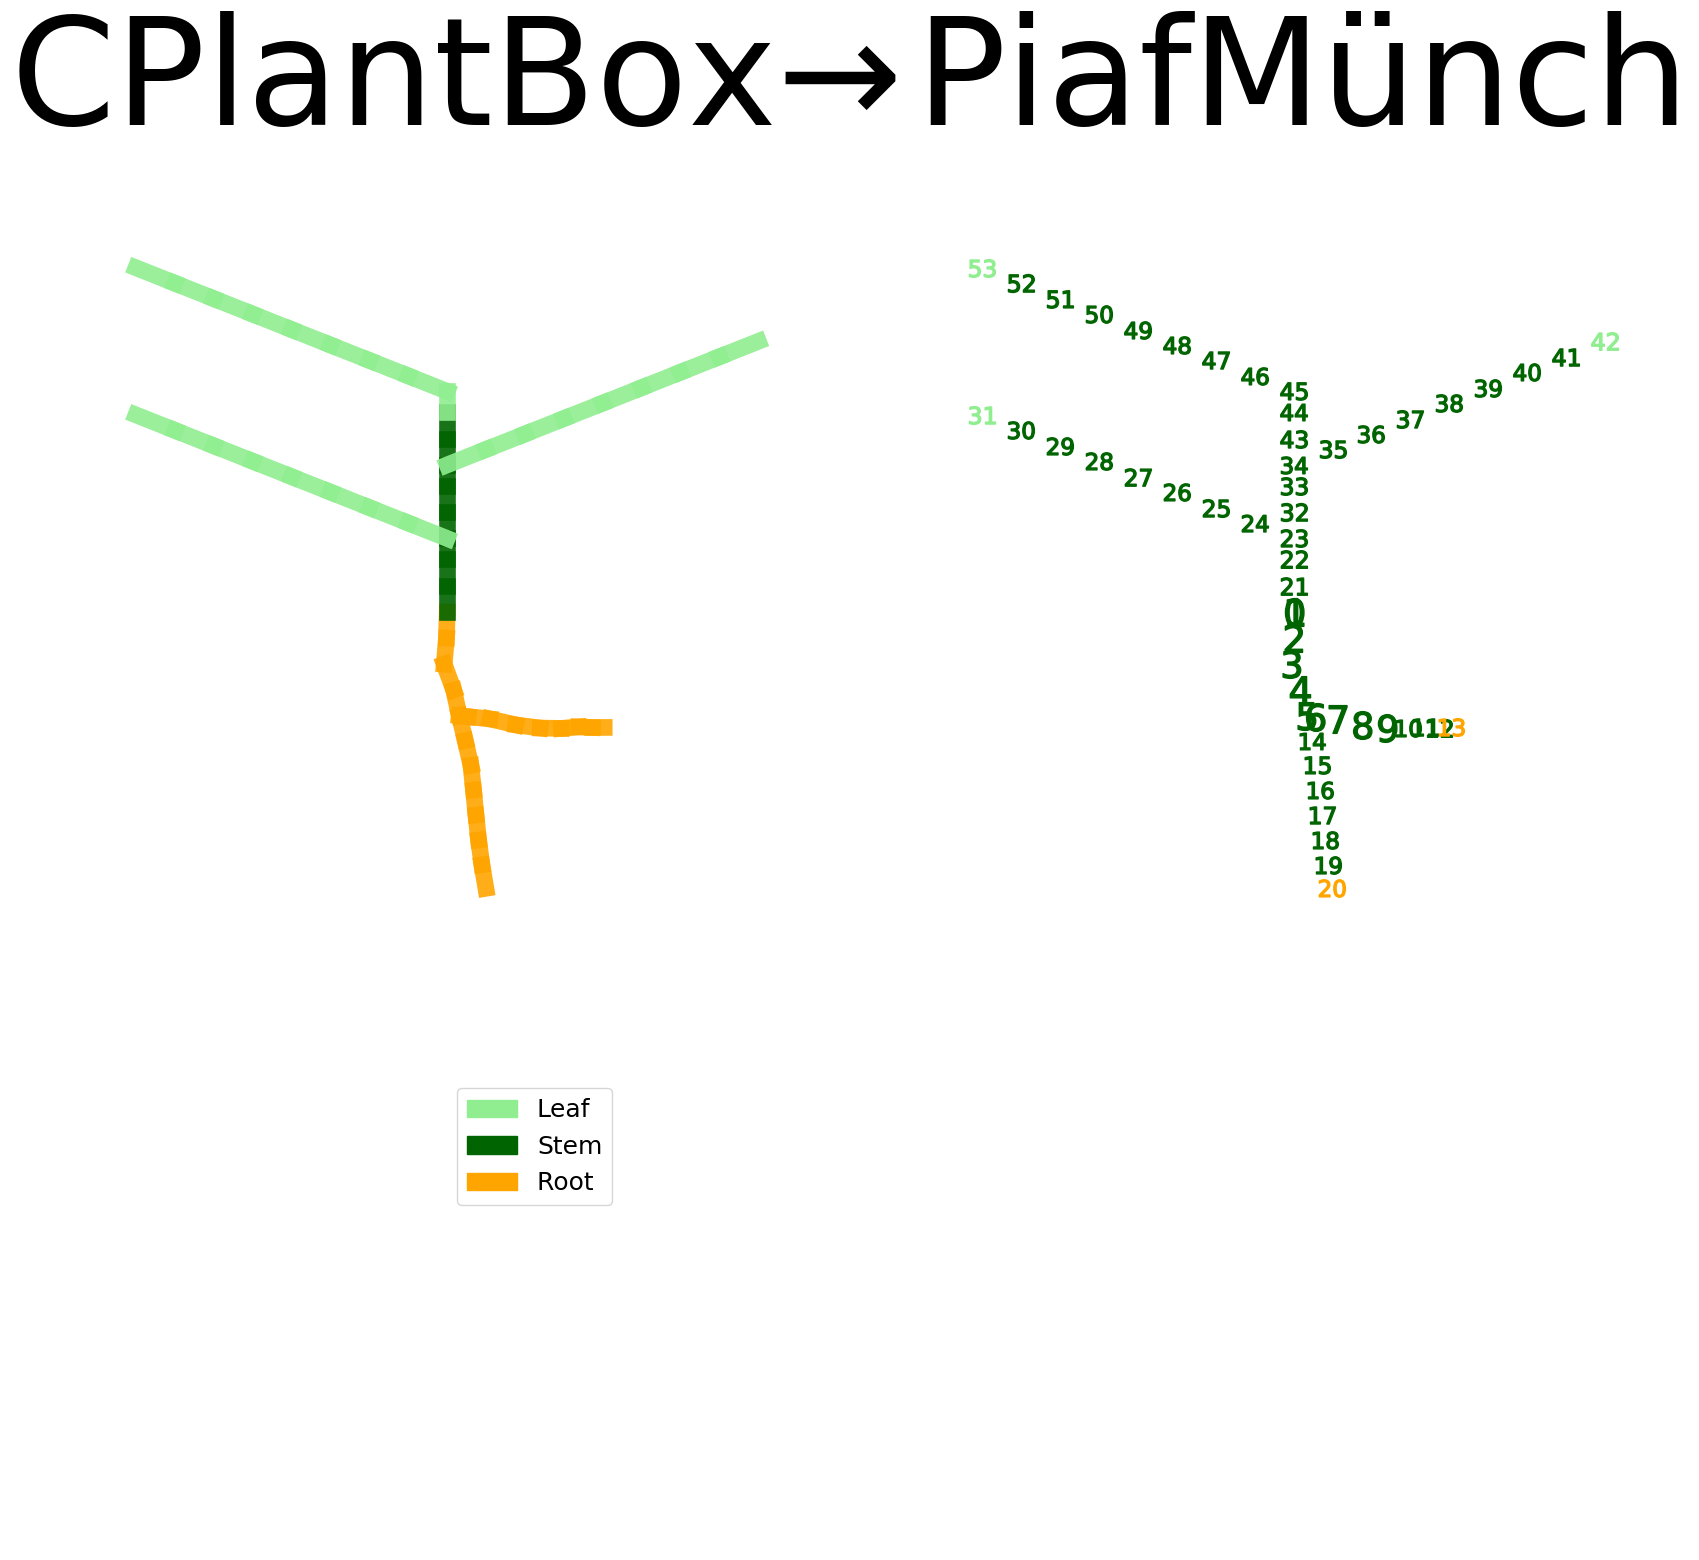

In [35]:

nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [20, 20]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




fig = plt.figure()

ax = fig.add_subplot(122, projection='3d')
plt.rcParams.update({'font.size': 90})
plt.title('PiafMünch')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100

# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
ax.grid(False)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    


for i in range(len(nodes_cor)):
    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(i),
            markersize=20, color=so_si_color(i), alpha=1)
    #ax.scatter(cor_x[i], cor_y[i],cor_z[i], s=100, marker = organ_marker(node_connection[i,0]) ,edgecolors= organ_color3(i))

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-8.8,0)

#ax.elev = 89.9
#ax.azim = 270.1
ax.dist = 6.0
#ax.view_init(0, 90)
ax.view_init(0, 90)
stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)



ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 90})
plt.title('CPlantBox$\u2192$ ')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=0.9, linewidth=12)

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-8.8,0)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
plt.rcParams.update({'font.size': 40})
root_patch = mpatches.Patch(color='orange', label='Root')
# seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='Leaf')
plt.legend(handles=[leaf_patch,stem_patch,  root_patch],bbox_to_anchor=(0.5, 0.3), loc=2, borderaxespad=0.)
ax.view_init(0, 90)
plt.show()


fig.savefig("{}.svg".format('CPlantBox_to_PiafMunch'), bbox_inches='tight')

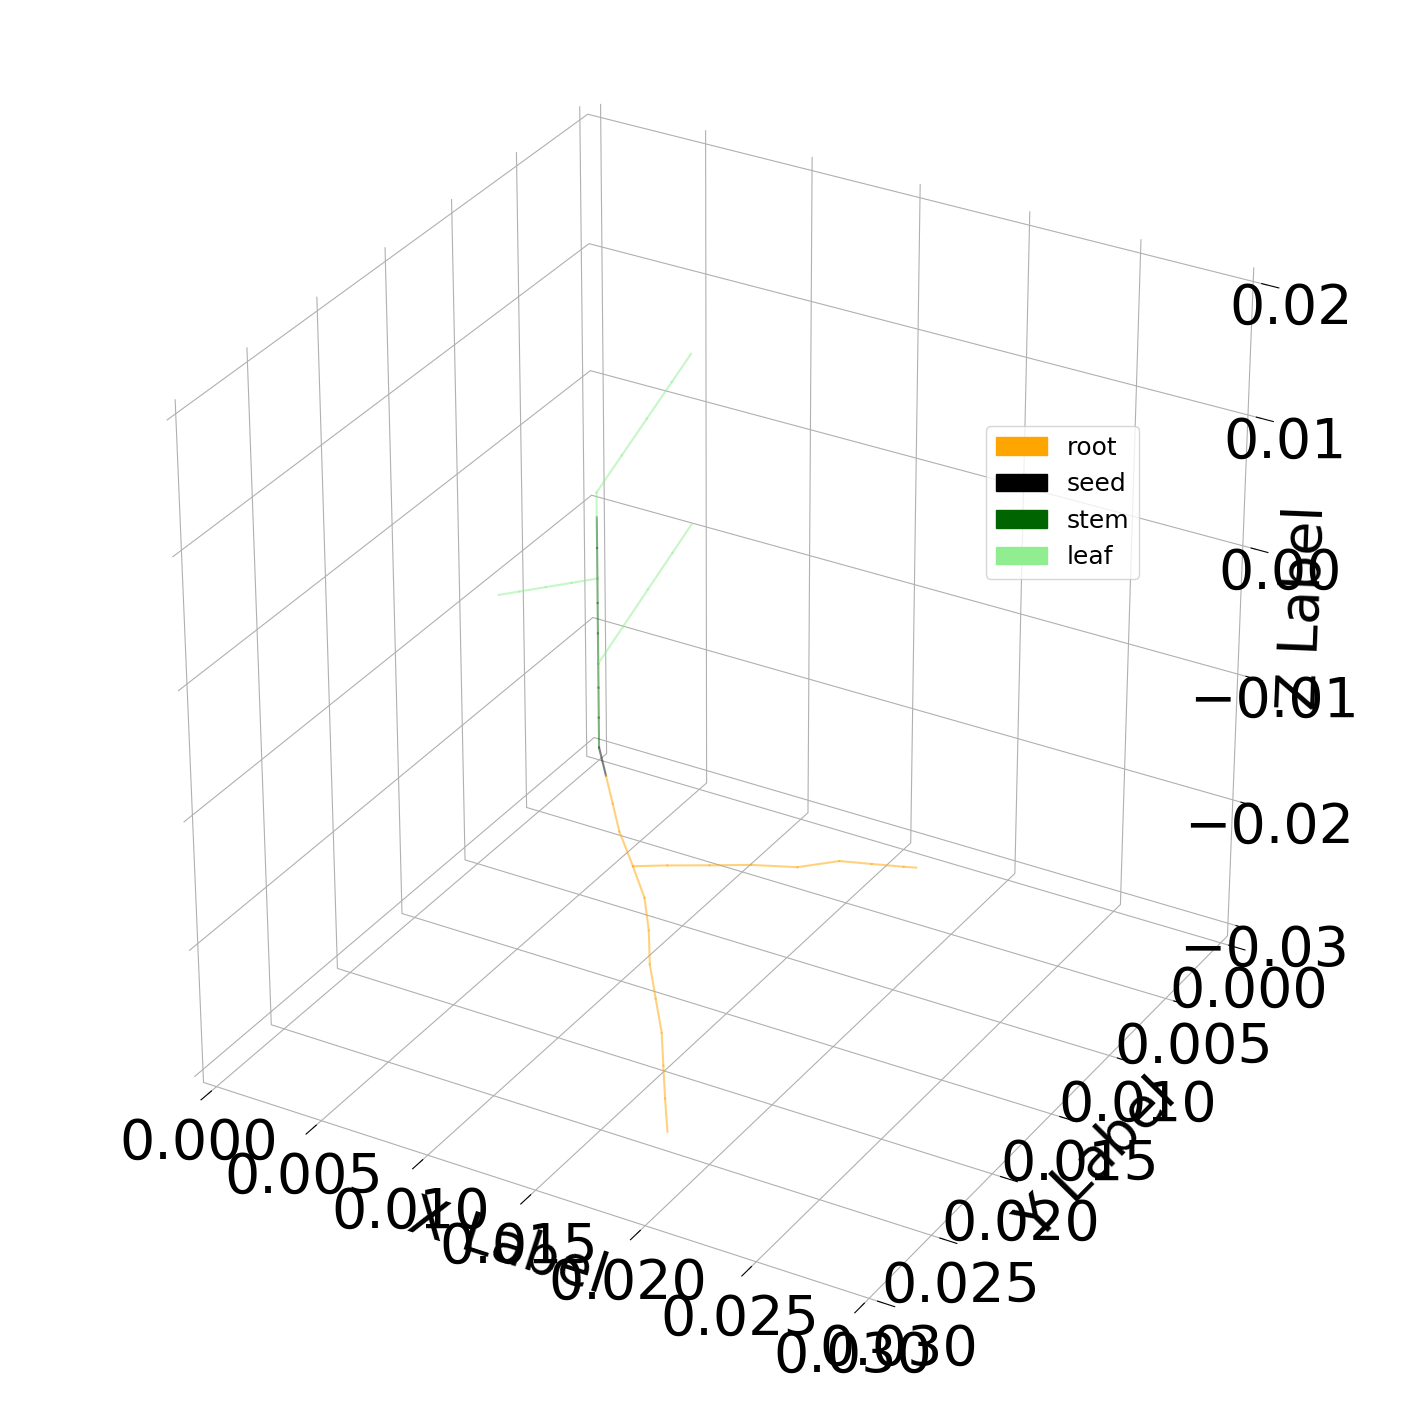

In [49]:
plt.rcParams['figure.figsize'] = [18, 18]

import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
#(nodes_organtype[:,1]== 8)|
#print(stem_nodes)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =nodes[:,0]
y =nodes[:,1]
z =nodes[:,2]
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('w')
#ax.yaxis.pane.set_edgecolor('w')
#ax.zaxis.pane.set_edgecolor('w')

#ax.set_xticks([]) 
#ax.set_yticks([]) 
#ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    organ= ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), color=organ_color(node_connection[i,0]), alpha=0.5)
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

#ax.dist = 5.0
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim3d(0, 0.03)
ax.set_ylim3d(0.03 ,0)
ax.set_zlim3d(-0.03,0.02)

root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[root_patch, seed_patch,stem_patch,leaf_patch],bbox_to_anchor=(0.7, 0.7), loc=2, borderaxespad=0.)
plt.show()
fig.savefig("{}.pdf".format('organtype_structure'), bbox_inches='tight')

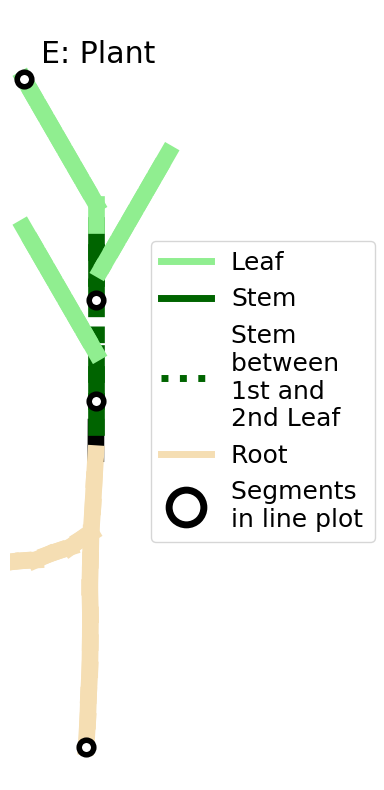

In [249]:
x_c =nodes[:,0]*100
y_c =nodes[:,1]*100
z_c =nodes[:,2]*100
import matplotlib.patches as mpatches
def line_style(int): #set line style in the plot figure
    if  32<int<37 : #int is a small part of main stem which are shown in dashed line 
        return ':'
    else: #
        return '-'
plt.rcParams['figure.figsize'] = [5, 10]
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 18})
plt.title('E: Plant')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=1, linewidth=12, ls = line_style(node_connection[i,0]))
for i in range(0,len(node_connection)+2):
    if i == 22 or i== 34 or i == 54  or i == 21:
        ax.scatter(x_c[i], 
                y_c[i], 
                z_c[i], alpha=1, c="white", edgecolors="black", linewidth='4',  s=110,zorder=1) #organ_marker3d(node_connection[i,0])

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.3, 1.1)
ax.set_ylim3d(1.6 ,0.6)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
plt.rcParams.update({'font.size': 40})
root_patch = mpatches.Patch(color='orange', label='Root')
# seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='Leaf')
#plt.legend(handles=[leaf_patch,stem_patch,  root_patch],bbox_to_anchor=(0.5, 0.3), loc=2, borderaxespad=0.)
ax.view_init(0, 90)

stem_line1 = mlines.Line2D([], [], color='darkgreen', marker='', linestyle=':', linewidth= 5,
                          markersize=30, label='Stem \nbetween \n1st and \n2nd Leaf')
marker_line = mlines.Line2D([], [], color='white', marker='o', linestyle='', linewidth= 5,
                          markersize=25, mec='black', mew = 5, label='Segments \nin line plot')
plt.legend(handles=[leaf_line, stem_line, stem_line1, root_line,marker_line],bbox_to_anchor=(0.8, 0.7), loc=2, borderaxespad=0., prop={'size': 18} )
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0., prop={'size': 30})


plt.show()

NameError: name 'high_root2' is not defined

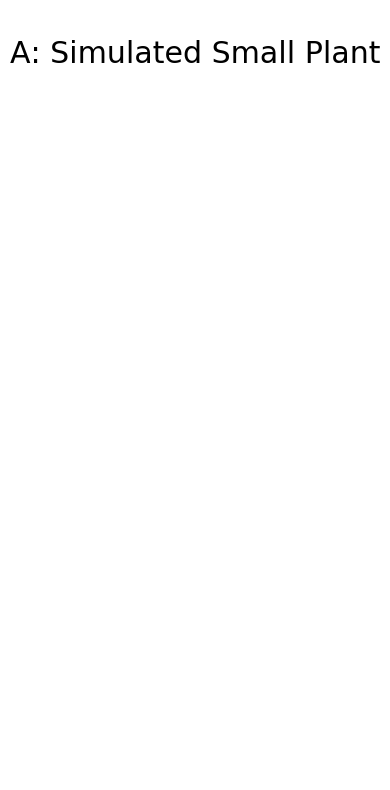

In [18]:
import matplotlib.patches as mpatches
# def line_style(int): #set line style in the plot figure
#     if  32<int<37 : #int is a small part of main stem which are shown in dashed line 
#         return ':'
#     else: #
#         return '-'
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
plt.rcParams.update({'font.size': 18})
plt.title('A: Simulated Small Plant')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color(int):
    if int in leaf_nodes: #int is source 
        return "lightgreen"#'lightgreen'
    elif int in high_root2: #int is sink
        return 'tomato'
    elif int in low_root2: #int is sink
        return 'darkblue'
    elif int in high_root: #int is sink
        return 'yellow'
    elif int in low_root: #int is sink
        return 'lightblue'
    elif int in root1: #int is sink
        return 'red'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in stem_nodes:
        return "darkgreen"#'darkgreen'
    else:
        return "black"#'black'
    

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color(node_connection[i,0]), alpha=1, linewidth=12, ls = "-")

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='wheat', label='Tap Root')
root_patch1 = mpatches.Patch(color='red', label='Tap Root in Figure')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='Stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='Leaf')
h_r_patch = mpatches.Patch(color='yellow', label='Watered Root')
l_r_patch = mpatches.Patch(color='lightblue', label='Unwatered Root')
l_r_patch1 = mpatches.Patch(color='blue', label='Unwatered Root \nin Figure')
h_r_patch1 = mpatches.Patch(color='orange', label='Watered Root \nin Figure')
plt.rcParams.update({'font.size': 18})
plt.legend(handles=[leaf_patch,stem_patch,  root_patch, root_patch1,
                    h_r_patch, h_r_patch1,l_r_patch,l_r_patch1],bbox_to_anchor=(0.63, 0.7), loc=2, borderaxespad=0.)
ax.view_init(0, 0)
plt.show()

In [255]:
len(node_connection)

53

In [ ]:
import pandas as pd
path = 'PiafMunch2_PMA1_2019-03-19_13-27-45.019_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*3+1
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[54, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
JS_ST_0_out=output.iloc[1, JS_ST_begin:JS_ST_end]
JS_ST_0_out_array = JS_ST_0_out.values
plant_ana.addUserData(a2v(JS_ST_0_out_array),"JS_ST_0")

JS_ST_1_out=output.iloc[7, JS_ST_begin:JS_ST_end]
JS_ST_1_out_array = JS_ST_1_out.values
plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_1")


JS_ST_5_out=output.iloc[30, JS_ST_begin:JS_ST_end]
JS_ST_5_out_array = JS_ST_5_out.values
plant_ana.addUserData(a2v(JS_ST_5_out_array),"JS_ST_5")

JS_ST_9_out=output.iloc[50, JS_ST_begin:JS_ST_end]
JS_ST_9_out_array = JS_ST_9_out.values
plant_ana.addUserData(a2v(JS_ST_9_out_array),"JS_ST_9")



#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("results/PMA.vtp")
#plant_ana.write("results/PMA.txt")

In [ ]:
C_ST_begin = (len(node_connection)+1)*3+1
C_ST_end = C_ST_begin +(len(node_connection))

output.iloc[100, C_ST_begin:C_ST_end]

In [ ]:
P_ST_begin = (len(node_connection)+1)*15+1
P_ST_end =P_ST_begin +(len(node_connection))

output.iloc[99, P_ST_begin:P_ST_end]

In [ ]:
### C_ST
time = np.array(output.iloc[:, 0])
n_begin = (len(node_connection)+1)*3+1
n_end = n_begin +(len(node_connection))
#print(output.iloc[2, n_begin:n_end])

var_leaf = np.array(output.iloc[:,n_begin + N1L_node[:,0]])
var_root = np.array(output.iloc[:,n_begin + N1R_node[:,0]])
var_n2 = np.array(output.iloc[:,n_begin+ N2_node[:,0]])
var_n3 = np.array(output.iloc[:,n_begin + N3_node[:,0]])
var_all = np.array(output.iloc[:,n_begin:n_end])

output.columns[n_begin]

In [ ]:
from scipy.stats import loglaplace,chi2
from labellines import labelLine, labelLines
for i in range(28,31):
    f = plt.figure()
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection))
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    labelLines(plt.gca().get_lines(), xvals=(45, 50), zorder=0)
    plt.show()
    s =output.columns[n_begin]
    s = s.replace('/', '')
    f.savefig("{}.pdf".format(s), bbox_inches='tight')

In [ ]:
len(node_connection)
output.iloc[:,n_begin:n_end]

In [ ]:
import datetime

now = datetime.datetime.now()
piaf_munch_p_name = "PMA"
os.system(' /mnt/c/prog_sct.bas/programs/C++/PIAFMunch2/projects/PIAFMunch2.exe PiafMunch2_PMA1.ini -noGUI -q')
os.system('mv /mnt/c/cpb1/python/PiafMunch2_PMA1_2019-{:02}-{:02}*output.txt  ./{}_output.txt'.format(now.month, now.day, piaf_munch_p_name ,i) )
path = 'PMA_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)



import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [12, 12]
i=37
f = plt.figure()
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*34-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))

    
for i in range(len(node_connection)):
    plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 18})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Water Flow between 22th and 23th node (Stem)')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Water Flow between 10th and 11th node (Root)')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Water Flow between 49th and 50th node (Leaf)')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Leaf')




plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle],bbox_to_anchor=(0.62, 0.27), loc=2, borderaxespad=0.)

plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}.pdf".format(s), bbox_inches='tight')



In [ ]:
i=20
n_begin = (len(node_connection))*i-33
n_end = n_begin +(len(node_connection))
output.iloc[:,n_begin:n_end]

#output.iloc[100, C_ST_begin:C_ST_end]
n_begin = C_ST_begin
n_end = C_ST_end
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))

def organ_color(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

def organ_color1(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'None'

def zorder(int):    
    if int == 49: #int is source 
        return 11.
    elif int == 10: #int is source 
        return 11.
    elif int == 22:
        return 11.
    else:
        return 0.
    
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in stem_nodes:
        return 's'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    else:
        return 'None'
    
for i in range(len(node_connection)):
    plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 18})

green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Water Flow between 22th and 23th node (Stem)')
orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Water Flow between 10th and 11th node (Root)')
lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Water Flow between 49th and 50th node (Leaf)')
star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Stem')
cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Root')
circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                          markersize=10, label='Water Flow between nodes of CPlantBox Leaf')




plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle],bbox_to_anchor=(0.62, 0.27), loc=2, borderaxespad=0.)

plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}.pdf".format(s), bbox_inches='tight')



In [ ]:
import numpy as np
node_connection= np.zeros(54)

i=20
n_begin = (len(node_connection))*i-33
n_end = n_begin +(len(node_connection))
output.iloc[:,n_begin:n_end]

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 20})
import numpy as np
i=34
f = plt.figure()
n_begin = (len(node_connection)+1)*30+1
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel('Carbon Flow in Sieve-tubes (mmol h⁻¹)')
plt.title('Carbon Flow in Sieve-tubes (mmol h⁻¹)')

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
    plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), s=200 ,
                label = '{0}'.format(node_connection[i,0])
                ,c=organ_color1(node_connection[i,0]),alpha=1)

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                          markersize=12, label='Carbon Flow between 24th and 23th node (Stem)')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                          markersize=12, label='Carbon Flow between 19th and 20th node (Root)')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                          markersize=12, label='Carbon Flow between 33th and 32th node (Leaf)')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Stem')
root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Root')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-',
                          markersize=10, label='Carbon Flow between nodes of CPlantBox Leaf')
#plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
plt.legend(handles=[leaf_carbon,stem_carbon,root_carbon, leaf_line,stem_line, root_line],bbox_to_anchor=(0.19, 0.3), loc=2, borderaxespad=0.)

#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 18})
#plt.ylim((-0.001, 0.001))  
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')

In [ ]:
output.iloc[:,n_begin:n_end]

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
i=32
f = plt.figure()
n_begin = (len(node_connection))*i-10
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title(" {:.16s} ".format(output.columns[n_begin]))

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 9})
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')


In [ ]:
import pandas as pd
path = 'PiafMunch2_PMA1_2019-03-19_10-59-51.703_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*33-2
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
for i in range(0,100):
    JS_ST_1_out=output.iloc[i, JS_ST_begin:JS_ST_end]
    JS_ST_1_out_array = JS_ST_1_out.values
    plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_{}".format(output.iloc[i, 0]))




#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("../results/PMA_JW_XYL_100.vtp")
#plant_ana.write("results/PMA.txt")



In [ ]:
import pandas as pd
path = 'PiafMunch2_PMA1_2019-03-19_11-04-30.146_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JS_ST_begin = (len(node_connection)+1)*31
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]
plant_ana.clearUserData()
for i in range(0,100):
    JS_ST_1_out=output.iloc[i, JS_ST_begin:JS_ST_end]
    JS_ST_1_out_array = JS_ST_1_out.values
    plant_ana.addUserData(a2v(JS_ST_1_out_array),"JS_ST_{}".format(output.iloc[i, 0]))




#print(len(segP[sseg.shape[0]:]))
print(len(JS_ST_1_out_array))
plant_ana.write("../results/PMA_JW_ST_100.vtp")
#plant_ana.write("results/PMA.txt")

In [ ]:
JS_ST_begin = (len(node_connection)+1)*31
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

In [ ]:
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'x'
    #elif int == 40 :
    elif int in stem_nodes:
        return '*'
    else:
        return 'None'

nodes_org = np.full((len(node_connection), 1),0)
for i in range(0,len(node_connection)):
    nodes_org[i]= nodes_organtype[node_connection[i][0]][1]
nodes_c_marker = np.full((len(node_connection), 1),'k')
for i in range(0,len(node_connection)):
    nodes_c_marker[i]= organ_marker(node_connection[i][0])
nodes_c_marker[0][0]= 'D'
nodes_c_marker.astype(str, copy = True)


In [ ]:
import pandas as pd
node_connection
#node_connection_cor
nodes_c_cor = np.full((len(node_connection), 3),0.0)
#charar = np.chararray((3, 3))

for i in range(0,len(node_connection)):
    nodes_c_cor[i] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2


b = np.zeros((nodes_organtype.shape[0],nodes_organtype.shape[1]+1)); b[:,:-1] = nodes_organtype
node_c_o = np.zeros((node_connection.shape[0],node_connection.shape[1]+5)); node_c_o[:,:-5] = node_connection

for i in range(0,len(node_connection)):
    node_c_o[i][2:5] = (nodes[node_connection[i,0]] + nodes[node_connection[i,1]])/2
#    node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][0]
    #node_c_o[i][6] = nodes_organtype[node_c_o[i][0]][1]

node_c_o = pd.DataFrame({'1st_node':node_connection[:,0],'2nd_node':node_connection[:,1],'x':node_c_o[:,2]
                        ,'y':node_c_o[:,3],'z':node_c_o[:,4], 'organ_type':nodes_org[:,0],'marker':nodes_c_marker[:,0]})
node_c_o

In [ ]:
output.iloc[100, (len(node_connection))*34-22:(len(node_connection))*35-22]

In [ ]:
output.iloc[100, JS_ST_begin:JS_ST_end]
connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JS_ST_begin:JS_ST_end] , cmap=cm.coolwarm, alpha=1, vmin=-7e12, vmax=5e12) #vmin = 0, vmax =0.0005

for j in range(len(node_connection)):
    waterflow = ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= "silver",
               c=output.iloc[i, JS_ST_begin+j:JS_ST_begin+j+1] , cmap=cm.coolwarm,  
               alpha=1, vmin=0, vmax=0.0005)

In [ ]:
output.iloc[100, JW_XYL_begin:JW_XYL_end]

In [10]:

import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [30, 15]
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection))*34-42
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[100, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for k in range(0,100):
    fig = plt.figure()
    bx = fig.add_subplot(121)
    fig.tight_layout(rect=[2,2,2,2]) 
    time = np.array(output.iloc[:, 0])
    n_begin = JW_XYL_begin
    n_end = JW_XYL_end
    #ax = f.gca(projection='3d')
    var_all = np.array(output.iloc[:,n_begin:n_end])


    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("Time (hours)")
    plt.ylabel("Water flow speed")
    plt.title("Water flow in xylem vessels")
    bx.spines['right'].set_visible(False)
    bx.spines['top'].set_visible(False)

    for i in range(len(node_connection)):
        plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
        plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
    plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    plt.text(output.iloc[k, 0]+0.2,0.55,'Time at {:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 18})

    green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                              markersize=12, label='Flow between 22th and 23th node (Stem)')
    orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                              markersize=12, label='Flow between 10th and 11th node (Root)')
    lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                              markersize=12, label='Flow between 49th and 50th node (Leaf)')
    star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Stem')
    cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Root')
    circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle], loc=4, borderaxespad=0.)
    #bbox_to_anchor=(0.1, 0.91),
    #plt.show()
    
    

    ax = fig.add_subplot(122, projection='3d')
    fig.tight_layout(rect=[0,0,0,0]) 

    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(len(node_connection)):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-0, vmax=1)
    connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JW_XYL_begin:JW_XYL_end] , cmap=cm.coolwarm, alpha=1, vmin=0, vmax=1) #vmin = 0, vmax =0.0005
    
    
    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(-0.02, 0.02)
    ax.set_ylim3d(-0.02 ,0.02)
    ax.set_zlim3d(-0.06,0.00)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Water Flow between Each Connected Nodes at Time {:.2f} (hour)'.format(output.iloc[k, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    ax.view_init(elev=10, azim=7*k)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Water Flow in Xylem (ml / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=20, label='Connection between 10th and 11th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=20, label='Connection between 22th and 23th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=20, label='Connection between 49th and 50th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=20,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=20,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=20, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0. , fontsize = 20)

    
    filename='step{:02d}.png'.format(k)
    plt.savefig(filename, dpi=150)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

read_table is deprecated, use read_csv instead.



FileNotFoundError: [Errno 2] File b'PMA_diurnal_hetero_output.txt' does not exist: b'PMA_diurnal_hetero_output.txt'

In [ ]:
#Larger text for ppt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [16, 8]
path = 'PMA_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection))*34-22
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[100, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for k in range(75,76):
    fig = plt.figure()
    bx = fig.add_subplot(121)
    fig.tight_layout(rect=[2,2,2,2]) 
    time = np.array(output.iloc[:, 0])
    n_begin = JW_XYL_begin
    n_end = JW_XYL_end
    #ax = f.gca(projection='3d')
    var_all = np.array(output.iloc[:,n_begin:n_end])


    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("Time (hours)")
    plt.ylabel("Water flow speed")
    plt.title("Water flow in xylem")
    bx.spines['right'].set_visible(False)
    bx.spines['top'].set_visible(False)

    for i in range(len(node_connection)):
        plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
        plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
    plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 18})

    green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                              markersize=12, label='22th and 23th node (Stem)')
    orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                              markersize=12, label='10th and 11th node (Root)')
    lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                              markersize=12, label='49th and 50th node (Leaf)')
    star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                              markersize=10, label='CPlantBox Stem')
    cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                              markersize=10, label='CPlantBox Root')
    circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                              markersize=10, label='CPlantBox Leaf')




    plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle], loc=4, borderaxespad=0.)
    #bbox_to_anchor=(0.1, 0.91),
    #plt.show()
    
    

    ax = fig.add_subplot(122, projection='3d')
    fig.tight_layout(rect=[0,0,0,0]) 

    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(len(node_connection)):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,edgecolors= organ_color3(j),
                   c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-0, vmax=1)
    #connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JW_XYL_begin:JW_XYL_end] , cmap=cm.coolwarm, alpha=1, vmin=0, vmax=0.7) #vmin = 0, vmax =0.0005
    
    
    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(-0.02, 0.02)
    ax.set_ylim3d(-0.02 ,0.02)
    ax.set_zlim3d(-0.06,0.00)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Water Flow at Time {:.2f} (hour)'.format(output.iloc[k, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    ax.view_init(elev=10, azim=7*k)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Water Flow in Xylem (ml / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=20, label='10th and 11th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=20, label='22th and 23th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=20, label='49th and 50th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=20,markerfacecolor='white', label='CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=20,markerfacecolor='white', label='CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=20, markerfacecolor='white',label='CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(-0.15, 0.06), loc=2, borderaxespad=0. , fontsize = 20, ncol=2)

    
    filename='step{:02d}.png'.format(k)
    plt.savefig(filename, dpi=150)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

In [8]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])
plt.rcParams['figure.figsize'] = [11, 30]
k=70
fig = plt.figure()


time = np.array(output.iloc[:, 0])
n_begin = JW_XYL_begin
n_end = JW_XYL_end
#ax = f.gca(projection='3d')
var_all = np.array(output.iloc[:,n_begin:n_end])

plt.rcParams['figure.figsize'] = [15, 15]
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection)+1)*30+1
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[100, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color2(int):
    if int == 99: #int is source 
        return 'lightgreen'
    elif int == 99: #int is source 
        return 'orange'
    elif int == 99:
        return 'darkgreen'
    else:
        return 'silver'
################ 1st FIgure #########################
#####################################################
ax = fig.add_subplot(211, projection='3d')
fig.tight_layout(rect=[0,0,0,0]) 
plt.rcParams.update({'font.size': 40})
# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((0, 0,0, 0.0))
ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
plt.rcParams.update({'font.size': 40})
# Bonus: To get rid of the grid as well:
ax.grid(False)
for j in range(len(node_connection)):
    ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=600, marker = organ_marker(node_connection[j,0]), linewidths = 0 ,edgecolors= organ_color(node_connection[j,0]),
               c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
               alpha=1, vmin=-0, vmax=1)

# connectionflow2 = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JW_XYL_begin:JW_XYL_end] , cmap=cm.coolwarm, alpha=1, vmin=0, vmax=1) #vmin = 0, vmax =0.0005
    
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


plt.rcParams.update({'font.size': 40})

#ax.set_xlabel('X axis')
#ax.set_ylabel('Y axis')
#ax.set_zlabel('Z axis')
ax.set_xlim3d(-0.012, 0.010)
ax.set_ylim3d(0.015 ,0.005)
ax.set_zlim3d(-0.088,0.000)


# ax.set_xlim3d(-1.2, 1)
# ax.set_ylim3d(1.5 ,0.5)
# ax.set_zlim3d(-4.8,0)
#plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
plt.title('Time {:.2f} (hour)'.format(output.iloc[k, 0]))

#ax.elev = 89.9
#ax.azim = 270.1
#ax.dist = 8.0
#

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)

ax.view_init(0, 90)
cbar = fig.colorbar(connectionflow2, shrink=0.5, aspect=10 )
cbar.ax.get_yaxis().labelpad = 40
#cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
cbar.ax.set_ylabel('Water Flow (ml / h)', rotation=270)
s = 40
green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', markeredgewidth = 5,marker='s', linestyle='',
                      markersize=s, label='10th')
orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', markeredgewidth = 5, marker='v', linestyle='',
                          markersize=s, label='22th')
lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', markeredgewidth = 5, marker='o', linestyle='',
                          markersize=s, label='49th')
star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                          markersize=s,markerfacecolor='white', markeredgewidth = 5, label='Stem')
cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                          markersize=s,markerfacecolor='white', markeredgewidth = 5, label='Root')
circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                          markersize=s, markerfacecolor='white', markeredgewidth = 5,label='Leaf')




#plt.legend(handles=[ star1, cross1, circle1],
#           bbox_to_anchor=(0.95, 1.04), loc=2, borderaxespad=0. , fontsize = 40)





time = np.array(output.iloc[:, 0])
n_begin = JW_XYL_begin
n_end = JW_XYL_end
#ax = f.gca(projection='3d')
var_all = np.array(output.iloc[:,n_begin:n_end])

plt.rcParams['figure.figsize'] = [15, 15]
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection))*34-42
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[100, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color2(int):
    if int == 99: #int is source 
        return 'lightgreen'
    elif int == 99: #int is source 
        return 'orange'
    elif int == 99:
        return 'darkgreen'
    else:
        return 'silver'
    
    
################ 2nd FIgure #########################
#####################################################    
ax = fig.add_subplot(212, projection='3d')
fig.tight_layout(rect=[0,0,0,0]) 
plt.rcParams.update({'font.size': 40})
# Get rid of colored axes planes
# First remove fill
#ax.set_axis_off()
# Get rid of the panes
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((0, 0,0, 0.0))
ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')


ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
plt.rcParams.update({'font.size': 40})
# Bonus: To get rid of the grid as well:
ax.grid(False)
for j in range(len(node_connection)):
    ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=600, marker = organ_marker(node_connection[j,0]), linewidths = 0 ,edgecolors= organ_color(node_connection[j,0]),
               c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
               alpha=1, vmin=-0, vmax=0.00035)
# connectionflow1 = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[k, JW_XYL_begin:JW_XYL_end] , 
#                              cmap=cm.coolwarm, alpha=1, vmin=0, vmax=0.00035) #vmin = 0, vmax =0.0005
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


plt.rcParams.update({'font.size': 40})

#ax.set_xlabel('X axis')
#ax.set_ylabel('Y axis')
#ax.set_zlabel('Z axis')
ax.set_xlim3d(-0.012, 0.010)
ax.set_ylim3d(0.015 ,0.005)
ax.set_zlim3d(-0.088,0.000)


# ax.set_xlim3d(-1.2, 1)
# ax.set_ylim3d(1.5 ,0.5)
# ax.set_zlim3d(-4.8,0)
#plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
plt.title('Time {:.2f} (hour)'.format(output.iloc[k, 0]))

#ax.elev = 89.9
#ax.azim = 270.1
#ax.dist = 8.0
#

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)

ax.view_init(0, 90)
cbar = fig.colorbar(connectionflow1, shrink=0.5, aspect=10 )
cbar.ax.get_yaxis().labelpad = 40
#cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
cbar.ax.set_ylabel('Carbon Flow (mmol / h)', rotation=270)
s = 40
green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', markeredgewidth = 5,marker='s', linestyle='',
                      markersize=s, label='10th')
orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', markeredgewidth = 5, marker='v', linestyle='',
                          markersize=s, label='22th')
lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', markeredgewidth = 5, marker='o', linestyle='',
                          markersize=s, label='49th')
star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                          markersize=s,markerfacecolor='white', markeredgewidth = 5, label='Stem')
cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                          markersize=s,markerfacecolor='white', markeredgewidth = 5, label='Root')
circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                          markersize=s, markerfacecolor='white', markeredgewidth = 5,label='Leaf')




#plt.legend(handles=[ star1, cross1, circle1],
#           bbox_to_anchor=(0.95, 1.04), loc=2, borderaxespad=0. , fontsize = 40)



filename='step{:02d}.png'.format(k)
plt.savefig(filename, dpi=150)
plt.show()

NameError: name 'JW_XYL_begin' is not defined

<Figure size 792x2160 with 0 Axes>

In [ ]:
# small  text animation for paper
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [10, 5]
path = 'PMA_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection)+1)*30+1
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[100, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for k in range(0,100):
    fig = plt.figure()
    bx = fig.add_subplot(121)
    fig.tight_layout(rect=[2,2,2,2]) 
    time = np.array(output.iloc[:, 0])
    n_begin = JW_XYL_begin
    n_end = JW_XYL_end
    #ax = f.gca(projection='3d')
    var_all = np.array(output.iloc[:,n_begin:n_end])


    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("Time (hours)")
    plt.ylabel("Carbon flow speed")
    plt.title("Carbon flow in phloem vessels")
    bx.spines['right'].set_visible(False)
    bx.spines['top'].set_visible(False)

    for i in range(len(node_connection)):
        plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
        plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
    plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    plt.text(output.iloc[k, 0]+0.2,0.00040,'Time at {:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 18})

    green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                              markersize=12, label='Flow between 22th and 23th node (Stem)')
    orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                              markersize=12, label='Flow between 10th and 11th node (Root)')
    lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                              markersize=12, label='Flow between 49th and 50th node (Leaf)')
    star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Stem')
    cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Root')
    circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                              markersize=10, label='Flow between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star,orange_cross, lgreen_circle, star, cross, circle], loc=4, borderaxespad=0.)
    #bbox_to_anchor=(0.1, 0.91),
    #plt.show()
    
    

    ax = fig.add_subplot(122, projection='3d')
    fig.tight_layout(rect=[0,0,0,0]) 

    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(len(node_connection)):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,
                   edgecolors= organ_color3(j), c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-0, vmax=0.00035)
    #connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[i, JW_XYL_begin:JW_XYL_end] , 
    #                            cmap=cm.coolwarm, alpha=1, vmin=0, vmax=0.00035) #vmin = 0, vmax =0.0005
    
    
    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(-0.02, 0.02)
    ax.set_ylim3d(-0.02 ,0.02)
    ax.set_zlim3d(-0.06,0.00)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Carbon Flow at Time {:.2f} (hour)'.format(output.iloc[k, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    ax.view_init(elev=10, azim=7*k)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Carbon Flow in Phloem (mmol / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=20, label='Connection between 10th and 11th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=20, label='Connection between 22th and 23th node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=20, label='Connection between 49th and 50th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=20,markerfacecolor='white', label='Connection between nodes of CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=20,markerfacecolor='white', label='Connection between nodes of CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=20, markerfacecolor='white',label='Connection between nodes of CPlantBox Leaf')




    plt.legend(handles=[green_star1,orange_cross1, lgreen_circle1, star1, cross1, circle1],
               bbox_to_anchor=(0.42, 0.245), loc=2, borderaxespad=0. , fontsize = 20)

    
    filename='step{:02d}.png'.format(k)
    plt.savefig(filename, dpi=150)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

In [ ]:
# large text animation for ppt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
nodes_cor = np.column_stack([nodes_organtype, nodes])

plt.rcParams['figure.figsize'] = [16, 8]
path = 'PMA_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)
JW_XYL_begin = (len(node_connection)+1)*30+1
JW_XYL_end = JW_XYL_begin +(len(node_connection))
output.iloc[:, JW_XYL_begin:JW_XYL_end]

#JS_ST_1_out=output.iloc[2, JS_ST_begin:JS_ST_end]
#JS_ST_1_out_array = JS_ST_1_out.values
def organ_marker(int):
    if int in leaf_nodes:
    #if int == 21: #int is source 
        return 'o'
    elif int in root_nodes : #int is sink
        return 'v'
    elif int == 1 : #int is sink
        return 'D'
    #elif int == 40 :
    elif int in stem_nodes:
        return 's'
    else:
        return 'None'

cor_x =nodes_c_cor[:,0]
cor_y =nodes_c_cor[:,1]
cor_z =nodes_c_cor[:,2]
cor_m = nodes_c_marker[:,0]
    
def organ_color3(int):
    if int == 49: #int is source 
        return 'lightgreen'
    elif int == 10: #int is source 
        return 'orange'
    elif int == 22:
        return 'darkgreen'
    else:
        return 'silver'

for k in range(0,100):
    fig = plt.figure()
    bx = fig.add_subplot(121)
    fig.tight_layout(rect=[2,2,2,2]) 
    time = np.array(output.iloc[:, 0])
    n_begin = JW_XYL_begin
    n_end = JW_XYL_end
    #ax = f.gca(projection='3d')
    var_all = np.array(output.iloc[:,n_begin:n_end])


    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("Time (hours)")
    plt.ylabel("Carbon flow speed")
    plt.title("Carbon flow in phloem")
    bx.spines['right'].set_visible(False)
    bx.spines['top'].set_visible(False)

    for i in range(len(node_connection)):
        plt.plot(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]),markersize=10, label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color1(node_connection[i,0]),alpha=1,zorder=zorder(i))
        plt.scatter(x,[pt[i] for pt in y], marker = organ_marker(node_connection[i,0]), label = '{0}'.format(node_connection[i,0])
                    ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
    plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
    plt.text(output.iloc[k, 0]+0.22,0.00033,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
    plt.rcParams.update({'font.size': 18})

    green_star = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-',
                              markersize=18, label='22th and 23th node (Stem)')
    orange_cross = mlines.Line2D([], [], color='orange', marker='v', linestyle='-',
                              markersize=18, label='10th and 11th node (Root)')
    lgreen_circle = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-',
                              markersize=18, label='49th and 50th node (Leaf)')
    star = mlines.Line2D([], [], color='grey', marker='s', linestyle='',
                              markersize=18, label='CPlantBox Stem')
    cross = mlines.Line2D([], [], color='grey', marker='v', linestyle='',
                              markersize=18, label='CPlantBox Root')
    circle = mlines.Line2D([], [], color='grey', marker='o', linestyle='',
                              markersize=18, label='CPlantBox Leaf')




    plt.legend(handles=[lgreen_circle, green_star,orange_cross], loc=4, borderaxespad=0.)
    #bbox_to_anchor=(0.1, 0.91),
    #plt.show()
    
    

    ax = fig.add_subplot(122, projection='3d')
    fig.tight_layout(rect=[0,0,0,0]) 

    # Get rid of colored axes planes
    # First remove fill
    #ax.set_axis_off()
    # Get rid of the panes
    #ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Get rid of the spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')


    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    for j in range(len(node_connection)):
        ax.scatter(cor_x[j], cor_y[j],cor_z[j], s=100, marker = organ_marker(node_connection[j,0]) ,
                   edgecolors= organ_color3(j), c=output.iloc[k, n_begin+j:n_begin+j+1] , cmap=cm.coolwarm,  
                   alpha=1, vmin=-0, vmax=0.00035)
   # connectionflow = ax.scatter(cor_x, cor_y, cor_z, s=100 , c=output.iloc[k, JW_XYL_begin:JW_XYL_end] , 
       #                         cmap=cm.coolwarm, alpha=1, vmin=0, vmax=0.00035) #vmin = 0, vmax =0.0005
    
    
    
    
    plt.rcParams.update({'font.size': 20})

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim3d(-0.02, 0.02)
    ax.set_ylim3d(-0.02 ,0.02)
    ax.set_zlim3d(-0.06,0.00)
    #plt.title('Carbon Flow at Time {:.2f} (Hours)'.format(output.iloc[i, 0]))
    plt.title('Carbon Flow at {:.2f} (hour)'.format(output.iloc[k, 0]))

    #ax.elev = 89.9
    #ax.azim = 270.1
    #ax.dist = 8.0
    ax.view_init(elev=10, azim=7*k)

    cbar = fig.colorbar(connectionflow, shrink=0.5, aspect=10 )
    cbar.ax.get_yaxis().labelpad = 25
    #cbar.ax.set_ylabel('Carbon Flow in Sieve Tube (mmol / h)', rotation=270)
    cbar.ax.set_ylabel('Carbon Flow in Phloem (mmol / h)', rotation=270)
    
    green_star1 = mlines.Line2D([], [],color='darkgreen', markerfacecolor='white', marker='s', linestyle='',
                          markersize=18, label='10th and 11th node')
    orange_cross1 = mlines.Line2D([], [],color='orange', markerfacecolor='white', marker='v', linestyle='',
                              markersize=18, label='22nd and 23rd node')
    lgreen_circle1 = mlines.Line2D([], [],color='lightgreen', markerfacecolor='white', marker='o', linestyle='',
                              markersize=18, label='49th and 50th node')
    star1 = mlines.Line2D([], [], color='silver', marker='s', linestyle='',
                              markersize=18,markerfacecolor='white', label='CPlantBox Stem')
    cross1 = mlines.Line2D([], [], color='silver', marker='v', linestyle='',
                              markersize=18,markerfacecolor='white', label='CPlantBox Root')
    circle1 = mlines.Line2D([], [], color='silver', marker='o', linestyle='',
                              markersize=18, markerfacecolor='white',label='CPlantBox Leaf')




    plt.legend(handles=[lgreen_circle1, green_star1 ,orange_cross1, circle1, star1, cross1],
               bbox_to_anchor=(-0.15, 0.06), loc=2, borderaxespad=0. , fontsize = 18, ncol=2)

    
    filename='step{:02d}.png'.format(k)
    plt.savefig(filename, dpi=150)
    plt.show()

# Then use image magick (this is bash, not python)
#convert -delay 80 *.png animated_chart.gif



#fig.savefig("{}.pdf".format('JW_ST'), bbox_inches='tight')


#def animate(i):
#    connectionflow.set_c(output.iloc[i, JS_ST_begin:JS_ST_end])  # update the data
#    return connectionflow


# Init only required for blitting to give a clean slate.
#def init():
#    connectionflow.set_c(output.iloc[1, JS_ST_begin:JS_ST_end])
#    return connectionflow

#ani = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
#                              interval=25, blit=True)
#plt.show()

In [ ]:
output.iloc[1, JW_XYL_begin:JW_XYL_end]

In [ ]:
JS_ST_begin = (len(node_connection))*37-7
JS_ST_end = JS_ST_begin +(len(node_connection))
output.iloc[100, JS_ST_begin:JS_ST_end]

In [ ]:
for i in range(14,16):
    n_begin = (len(node_connection)+1)*i+1
    n_end = n_begin +(len(node_connection))
    var_all = np.array(output.iloc[:,n_begin:n_end])
    x = np.array(time)
    y = np.array(var_all)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
    for i in range(len(np.transpose(y))):
        plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(nodes_organtype[i+1,0]))
    #plt.legend()
    #labelLines(plt.gca().get_lines(), xvals=(49, 50), zorder=0)
    plt.show()

In [ ]:


import pandas as pd
path = 'PiafMunch2_PMA1_output.txt'
#pd.read_table(path,sep='\t')
testoutput = pd.read_table(path,sep='\t',header=1)

plt.rcParams['figure.figsize'] = [12, 12]
import numpy as np
i=31
f = plt.figure()
time = np.array(testoutput.iloc[:, 0])
n_begin = (len(node_connection))*i-10
n_end = n_begin +(len(node_connection))
var_all = np.array(testoutput.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hours)")
plt.ylabel("{}".format(output.columns[n_begin]))
plt.title(" {:.16s} ".format(output.columns[n_begin]))

def organ_color(int):
    if int in leaf_nodes: #int is source 
        return 'lightgreen'
    elif int in root_nodes: #int is sink
        return 'orange'
    elif int in stem_nodes:
        return 'darkgreen'
    else:
        return 'black'
def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    
for i in range(len(np.transpose(y))):
    plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,0]),
    c=organ_color(node_connection[i,0]),alpha=1)
    #plt.plot(x,[pt[i] for pt in y],label = '{0}'.format(node_connection[i,1]),
    #c=so_si_color(node_connection[i,1]),alpha=1)
root_patch = mpatches.Patch(color='orange', label='root')
seed_patch = mpatches.Patch(color='black', label='seed')
stem_patch = mpatches.Patch(color='darkgreen', label='stem')
leaf_patch = mpatches.Patch(color='lightgreen', label='leaf')
plt.legend(handles=[leaf_patch,stem_patch, seed_patch, root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=2.5, alpha=1)
plt.rcParams.update({'font.size': 9})
plt.show()
s =output.columns[n_begin]
s = s.replace('/', '')
f.savefig("{}JS_STcarbonflow1.pdf".format(s), bbox_inches='tight')

In [ ]:
fig_nodes=[27,40 ,54]
fig_nodes

In [ ]:
node_connection[52,0]

In [9]:
import matplotlib.patches as mpatches
# with heterogeneous soil
plt.style.use('default')
lable_size=16
title_size =24
plt.rcParams.update({'font.size': 24})
def line_style(int): #set line style in the plot figure
    if  30<int<40 : #int is a small part of main stem which are shown in dashed line 
        return '-'
    else: #
        return '-'

#plt.rcParams['axes.facecolor'] = 'lightgrey'    
def add_day_night():
    #trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    #ax.fill_between(x, np.min(y), np.max(y), where=[ 12<x<18] , facecolor='lightgrey', alpha=1, interpolate=False,zorder=0,transform=trans)
    for i in range(0,4):
        ax.axvspan(0,5,facecolor='lightgrey', zorder=0)
        ax.axvspan(18.5+24*i,29+24*i,facecolor='lightgrey',zorder=0)
        

stem_nodes = nodes_organtype[(nodes_organtype[:,1]== 4)][:,0] 
root_nodes = nodes_organtype[(nodes_organtype[:,1]== 2)][:,0] 
leaf_nodes = nodes_organtype[(nodes_organtype[:,1]== 8)][:,0] 
low_leaf =[25,26,27,28,29,30,31,32]
middle_leaf =[36,37,38,39,40,41,42,43]
high_leaf = [47,48,49,50,51,52,53,54]

#fig_nodes=[node_connection[31,0],node_connection[41,0] ,node_connection[53,0]]



stem_node =[23]
stem_node2 =[46]
root1 =[4]
high_root1 =[6]
high_root2 =[11]
high_root3 =[12]
high_root4 =[13]
l_l_c=[31]
h_l_c=[53]
m_l_c=[42]
low_root1 =[14]
low_root2 =[19]
low_root3 =[20]
low_root4 =[21]
time = np.array(output.iloc[:, 0])    
def organ_color(int):
    if int in stem_node: #int is source 
        return "#00620f"#'lightgreen'
    #    return "None"#'lightgreen'
    elif int in stem_node2: #int is sink
        return 'None'
    elif int in h_l_c: #int is sink
        return '#ff6347'
    elif int in m_l_c: #int is sink
        return '#47ff63'
    elif int in l_l_c: #int is sink
        return '#4787ff'
    elif int in root1: #int is sink
        return 'None'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in leaf_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'
    

def organ_color_c(int):
    if int in stem_nodes : #int is source 
        return "None"#'lightgreen'
    elif int in h_l_c: #int is sink
        return 'orange'
    elif int in l_l_c: #int is sink
        return 'royalblue'
    elif int in root1: #int is sink
        return 'red'
    elif int in root_nodes: #int is sink
        return 'None'
    elif int in leaf_nodes:
        return "None"#'darkgreen'
    else:
        return "None"#'black'    
    
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output = pd.read_table(path,sep='\t',header=1)

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Comic Sans MS'}

plt.rcParams['figure.figsize'] = [20, 30]

import numpy as np


f = plt.figure()
f.subplots_adjust(hspace=0.5)




ax = plt.subplot(321, projection='3d')
plt.rcParams.update({'font.size': 24})
plt.title('A: Simulated Small Plant')
x =nodes[:,0]*100
y =nodes[:,1]*100
z =nodes[:,2]*100
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

# Bonus: To get rid of the grid as well:
#ax.grid(False)
#for i in range(len(nodes_cor)):
#    ax.plot([x[i]], [y[i]], [z[i]], marker='${}$'.format(nodes_cor[i,1]),
#            markersize=12, color='black')
def organ_color3d(int):
    if int in stem_node: #int is source 
        return "#00620f"#'lightgreen'
    elif int in stem_node2: #int is sink
        return '#00ae1a'
    elif int in stem_nodes: #int is sink
        return '#00ae1a'
    elif int in h_l_c: #int is sink
        return '#ff6347'
    elif int in m_l_c: #int is sink
        return '#47ff63'
    elif int in l_l_c: #int is sink
        return '#4787ff'
    elif int in high_leaf: #int is sink
        return '#ffa494'
    elif int in low_leaf: #int is sink
        return '#94b9ff'
    elif int in root1: #int is sink
        return 'None'
    elif int in root_nodes: #int is sink
        return 'wheat'
    elif int in m_l_c:
        return "#00fb25"#'darkgreen'
    elif int in leaf_nodes:
        return "#94ffa4"#'darkgreen'
    
    else:
        return "black"#'black'
    

for i in range(len(node_connection)):
    #xline = [x[node_connection[:,0][i]]],[x[node_connection[:,1][i]]] )
    #yline = np.array([y[node_connection[:,0][i]]],[y[node_connection[:,1][i]]] )
    #zline = np.array([z[node_connection[:,0][i]]],[z[node_connection[:,1][i]]] )
    ax.plot3D(np.array([[x[node_connection[:,0][i]]][0],[x[node_connection[:,1][i]]][0]]), 
              np.array([[y[node_connection[:,0][i]]][0],[y[node_connection[:,1][i]]][0]]), 
              np.array([[z[node_connection[:,0][i]]][0],[z[node_connection[:,1][i]]][0]]), 
              color=organ_color3d(node_connection[i,0]), alpha=1, linewidth=12, ls = "-")

    
#ax.scatter([x[715]], [y[715]], [z[715]], c='r', s=99)
#ax.scatter([x[860]], [y[860]], [z[860]], c='g', s=99)
#ax.scatter([x[627]], [y[627]], [z[627]], c='g', s=99)

ax.dist = 6.0
ax.set_xlabel('',labelpad=0)
ax.set_ylabel('',labelpad=0)
ax.set_zlabel('',labelpad=0)
ax.set_xlim3d(-1.2, 1)
ax.set_ylim3d(1.5 ,0.5)
ax.set_zlim3d(-4.8,-0.4)
#ax.xaxis.set_ticks(np.arange(0, 3, 1))
#ax.yaxis.set_ticks(np.arange(0 ,3, 1))
#ax.zaxis.set_ticks(np.arange(-3,2, 1))
root_patch = mpatches.Patch(color='wheat', label='Tap Root')
root_patch1 = mpatches.Patch(color='#00620f', label='Main Stem in Line Plot')
seed_patch = mpatches.Patch(color='black', label='Seed')
stem_patch = mpatches.Patch(color='#00ae1a', label='Stem')
leaf_patch = mpatches.Patch(color='#94ffa4', label='Middle Transpiration Leaf')
leaf_patch2 = mpatches.Patch(color='#47ff63', label='Middle Transpiration Leaf \nSegment in Line Plot')
h_r_patch = mpatches.Patch(color='#ffa494', label='High Transpiration leaf')
l_r_patch = mpatches.Patch(color='#94b9ff', label='Low Transpiration leaf')
l_r_patch1 = mpatches.Patch(color='#4787ff', label='High WaterTranspiration leaf \nSegment in Line Plot')
h_r_patch1 = mpatches.Patch(color='#ff6347', label='Low Water Transpiration leaf \nSegment in Line Plot')
plt.rcParams.update({'font.size': title_size})
plt.legend(handles=[stem_patch,  root_patch, root_patch1,leaf_patch,leaf_patch2,
                    h_r_patch, h_r_patch1,l_r_patch,l_r_patch1],bbox_to_anchor=(-0.68, 0.3), loc=2, borderaxespad=0., ncol=2)
ax.view_init(0, 90)


ax = plt.subplot(322)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection))*34-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)

plt.xlabel("Time (hour)")
plt.ylabel("Xylem Water Flow (ml h$^{-1}$)", color='royalblue')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
plt.title("B: Xylem Water Flow with Diurnal Transpiration \n and Heterogeneous Leaf Transpiration".format(i ,output.columns[n_begin]), color='royalblue' ,loc="right")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)):
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0.5, ls = line_style(node_connection[i,0]))

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.15,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
     #           ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})

stem_carbon = mlines.Line2D([], [], color='darkgreen', marker='s', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='22nd node')
root_carbon = mlines.Line2D([], [], color='orange', marker='v', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='10th node')
leaf_carbon = mlines.Line2D([], [], color='lightgreen', marker='o', linestyle='-', markeredgewidth = 1, markeredgecolor = 'black',
                          markersize=16, label='49th node')
stem_line = mlines.Line2D([], [], color='darkgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Stem')
low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Low Water Potential Lateral')
high_root_line = mlines.Line2D([], [], color='tomato', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='High Water Potential Lateral')
leaf_line = mlines.Line2D([], [], color='lightgreen', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Leaf')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
                          markersize=30, label='Tap Root')
add_day_night()



# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.0, 0.5), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.9), loc=2, borderaxespad=0., prop={'size': 30})


ax = plt.subplot(323)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection))*31-22
n_end = n_begin +(len(node_connection))
var_all = np.array(output.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)

plt.ylabel('Carbon Flow (mmol h⁻¹)', color='tomato')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)
#plt.ylim(0.000063, 0.000078) 

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
#plt.title('Phloem Carbon Flow with Constant Transpiration') 

plt.title('C: Phloem Carbon Flow with Diurnal Transpiration \n and Heterogeneous Leaf Transpiration', color='tomato', loc="right")  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))
#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.00002,0.00015,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
add_day_night()
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
plt.style.use('default')
path = 'PMA_diurnal_hetero_output.txt'
#pd.read_table(path,sep='\t')
output2 = pd.read_table(path,sep='\t',header=1)
plt.rcParams.update({'font.size': 24})
i=37

ax = plt.subplot(324)

ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
#ax = f.gca(projection='3d')
n_begin = (len(node_connection)+1)*15+1
n_end = n_begin +(len(node_connection)-1)
var_all = np.array(output2.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.rcParams.update({'font.size': 24})
plt.xlabel("Time (hour)")
plt.ylabel('Phloem Pressure (MPa)', color='tomato')
#plt.ylabel("Xylem water flow (ml h$^{-1}$)".format(output.columns[n_begin]))
#plt.title("{}th figure {} ".format(i ,output.columns[n_begin]))
s =output.columns[n_begin]
s = s.replace('/', '')
plt.title('D: Sievetube Pressure'.format(s), color='tomato',loc="center")
#plt.title("Xylem Water Flow with Constant Transpiration".format(i ,output.columns[n_begin]))
for i in range(len(node_connection)-1):
    ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0.5, ls = line_style(node_connection[i,0]))

#plt.axvline(x=output.iloc[k, 0],c='r',label="Time")
#plt.text(output.iloc[k, 0]+0.22,0.35,'{:.2f} hour'.format(output.iloc[k, 0]),rotation=90)
    #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
    #            ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=0)
#plt.legend()
#labelLines(plt.gca().get_lines(), xvals=(0, 100), zorder=0)
plt.rcParams.update({'font.size': 24})


add_day_night()


# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
#plt.legend(handles=[leaf_line, stem_line, root_line],bbox_to_anchor=(0.6, 0.8), loc=2, borderaxespad=0., prop={'size': 30})





ax = plt.subplot(325)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*31
n_end = n_begin +(len(node_connection)-1)
var_all = np.array(output2.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
plt.ylabel('Flow Speed (ml h⁻¹)', color='tomato')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('E: Phloem Solute Flow Speed'.format(s), color='tomato',loc="center")  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



    

add_day_night()
# high_root_line = mlines.Line2D([], [], color='orange', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Higher Water Potential')
# low_root_line = mlines.Line2D([], [], color='blue', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root Lower Water Potential')
#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)
# root_line = mlines.Line2D([], [], color='red', marker='', linestyle='-', linewidth= 5,
#                           markersize=30, label='Root')
#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)





ax = plt.subplot(326)
ax.tick_params(width=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
i=34

n_begin = (len(node_connection)+1)*3+1 
n_end = n_begin +(len(node_connection)-1)
var_all = np.array(output2.iloc[:,n_begin:n_end])
x = np.array(time)
y = np.array(var_all)
plt.xlabel("Time (hour)", **hfont)
plt.rcParams.update({'font.size': 24})
s =output.columns[n_begin]
s = s.replace('/', '')
plt.ylabel('C Concentration (mmol ml⁻¹)'.format(s), color='tomato')

#plt.title('Phloem Carbon Flow with Diurnal Transpiration', **hfont)

def so_si_color(int):
    if int in N1L_node[:,0]: #int is source 
        return 'lightgreen'
    elif int in N1R_node[:,0]: #int is sink
        return 'orange'
    else:
        return 'darkgreen'
    

    
s =output.columns[n_begin]
s = s.replace('/', '')    
#plt.title('Phloem Carbon Flow with Constant Transpiration')  
plt.title('F: Sievetube Carbon Concentration'.format(s), color='tomato',loc="center")  
for i in range(len(np.transpose(y))):
        ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
                ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i), ls = line_style(node_connection[i,0]))
        #ax.plot(x,[pt[i] for pt in y], linewidth=5,  label = '{0}'.format(node_connection[i,0])
        #        ,c=organ_color(node_connection[i,0]),alpha=0.5,zorder=zorder(i))



#plt.legend(handles=[ root_patch],bbox_to_anchor=(0.9, 0.7), loc=2, borderaxespad=0.)

#plt.legend(handles=[root_line, high_root_line, low_root_line],bbox_to_anchor=(0.7, 0.9), ncol=1, loc=2, borderaxespad=0.)
add_day_night()








plt.show()
s =output2.columns[n_begin]
s = s.replace('/', '')
f.savefig("diural{}.pdf".format(s), bbox_inches='tight')



/home/xr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:88: FutureWarning:

read_table is deprecated, use read_csv instead.



FileNotFoundError: [Errno 2] File b'PMA_diurnal_hetero_output.txt' does not exist: b'PMA_diurnal_hetero_output.txt'